In [1]:
import sys, os, time, shutil
from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:98% !important; }</style>"))
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
# %load_ext autoreload
# %autoreload 2
# %pdb
from tqdm import tqdm_notebook as tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
from torch.utils.data import Dataset, DataLoader, TensorDataset

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize

import omnifig as fig

import gym
import inspect
import numpy as np
import pickle

#%matplotlib tk
import matplotlib.pyplot as plt
#plt.switch_backend('Qt5Agg') #('Qt5Agg')
import omnilearn as learn
from omnilearn import models
from omnilearn import util
#from foundation.util import replicate, Cloner

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib import animation
import matplotlib as mpl
# mpl.rc('image', cmap='gray')

# import gpumap
# import umap, shap
# import umap.plot

from sklearn.decomposition import PCA
import sklearn.datasets

# import gpumap
from c3linearize import linearize, class_graph

# import project as proj
# import pointnets as ptn

%matplotlib notebook

fig.initialize()


np.set_printoptions(linewidth=120)

2021-11-24 15:21:46.434993: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /is/ei/fleeb/miniconda3/lib/python3.8/site-packages/cv2/../../lib64:/is/ei/fleeb/.mujoco/mujoco200/bin
2021-11-24 15:21:46.435009: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [1]:
import torch

In [8]:
gen = torch.Generator(None)
gen2 = torch.Generator('cuda')
gen, gen2

(<torch._C.Generator at 0x7effb7288a70>,
 <torch._C.Generator at 0x7effb7168090>)

In [62]:
gen.seed(), gen.seed()

(13437407156505195431, 4268023945169521007)

In [63]:
gen2.manual_seed(gen.seed())

In [64]:
torch.seed()

7678373270135071531

In [66]:
torch.manual_seed(1)
print(torch.randint(100, size=(3,)))
torch.Generator()
print(torch.randint(100, size=(3,)))

torch.manual_seed(1)
print(torch.randint(100, size=(3,)))

print(torch.randint(100, size=(3,)))


tensor([45, 39, 24])
tensor([68, 63, 13])
tensor([45, 39, 24])
tensor([68, 63, 13])


In [105]:
hex(-2**63), hex(2**63-1)

('-0x8000000000000000', '0x7fffffffffffffff')

In [100]:
import random
import numpy as np

In [96]:
torch.manual_seed(random.getrandbits(64))

In [101]:
random.seed(random.getrandbits(64))

ValueError: Seed must be between 0 and 2**32 - 1

In [111]:
s = torch.randint(-2**63, 2**63-1, size=())
torch.manual_seed(s)

In [76]:
torch.manual_seed(1)
print(torch.seed())
torch.manual_seed(1)
print(torch.seed())

15241946352328649716
13851745478635692793


In [124]:
cmp(-1,0)

NameError: name 'cmp' is not defined

In [125]:
import math

In [129]:
math.copysign(1, -10.3)

-1.0

In [70]:
x = torch.Generator()
y = torch.Generator()

In [71]:
x.get_state().int().sub(y.get_state().int()).abs().sum()

tensor(0)

In [122]:
ls = [1,2,3,]
itr = iter(ls)

In [121]:
for i, x in enumerate(itr):
    print(i, x)
    print(next(itr, None))

0 1
2
1 3
None


In [123]:
next(itr)
[3,4, *itr]

[3, 4, 2, 3]

In [137]:
import numpy as np
from omnilearn import util

2022-02-02 13:50:06.066174: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /is/ei/fleeb/miniconda3/lib/python3.8/site-packages/cv2/../../lib64:/is/ei/fleeb/.mujoco/mujoco200/bin
2022-02-02 13:50:06.066190: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [374]:
from scipy.optimize import linear_sum_assignment
from scipy.linalg import sqrtm
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from scipy.sparse.csgraph import dijkstra, minimum_spanning_tree
import networkx as nx
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from torch.nn import functional as F

# mat = np.array([[0.0, 2.0, 0.1], [2.0, 0.0, 2.0], [0.1, 2.0, 0.0]])
# dists = squareform(mat)


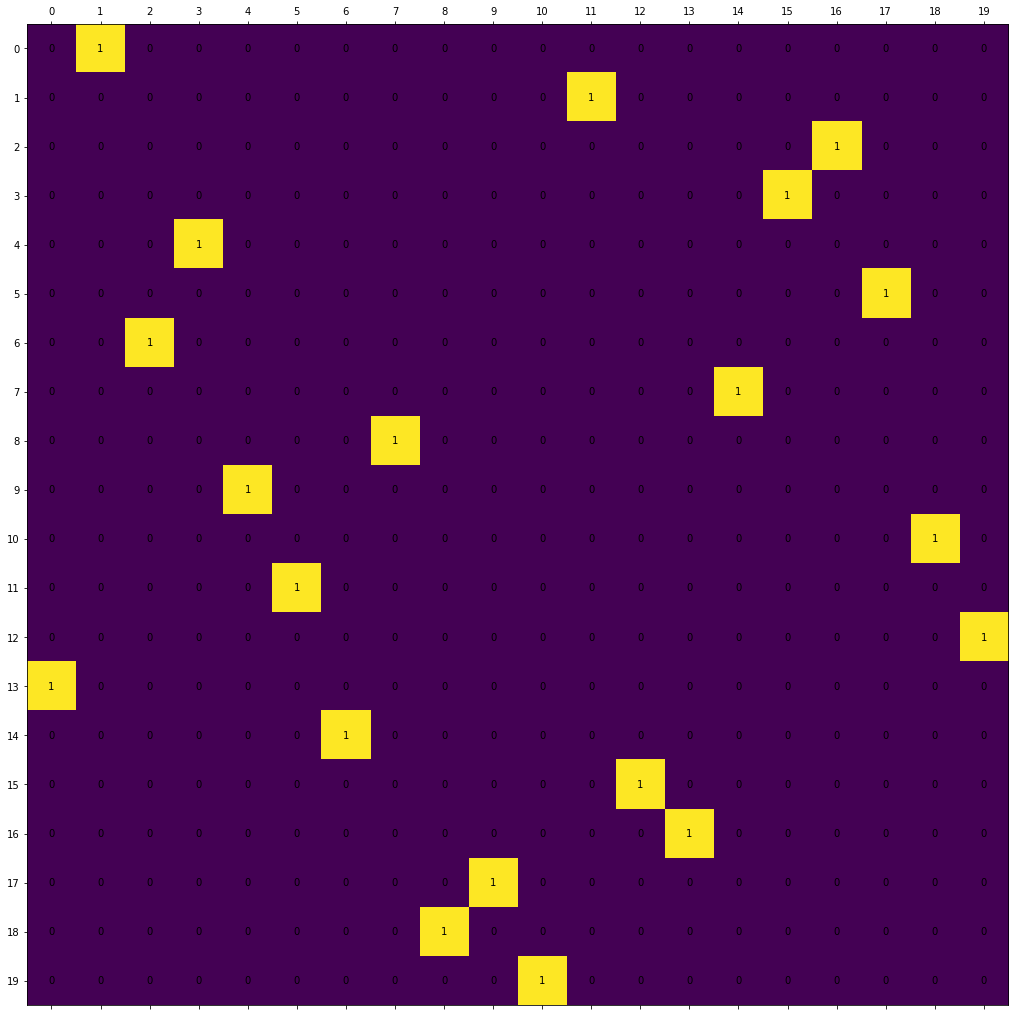

In [345]:
N = 20
order = torch.randperm(N)
P = torch.zeros(N,N)
P[torch.arange(N), order] = 1
# util.plot_mat(P, val_fmt=1);

In [346]:
order

tensor([ 1, 11, 16, 15,  3, 17,  2, 14,  7,  4, 18,  5, 19,  0,  6, 12, 13,  9,
         8, 10])

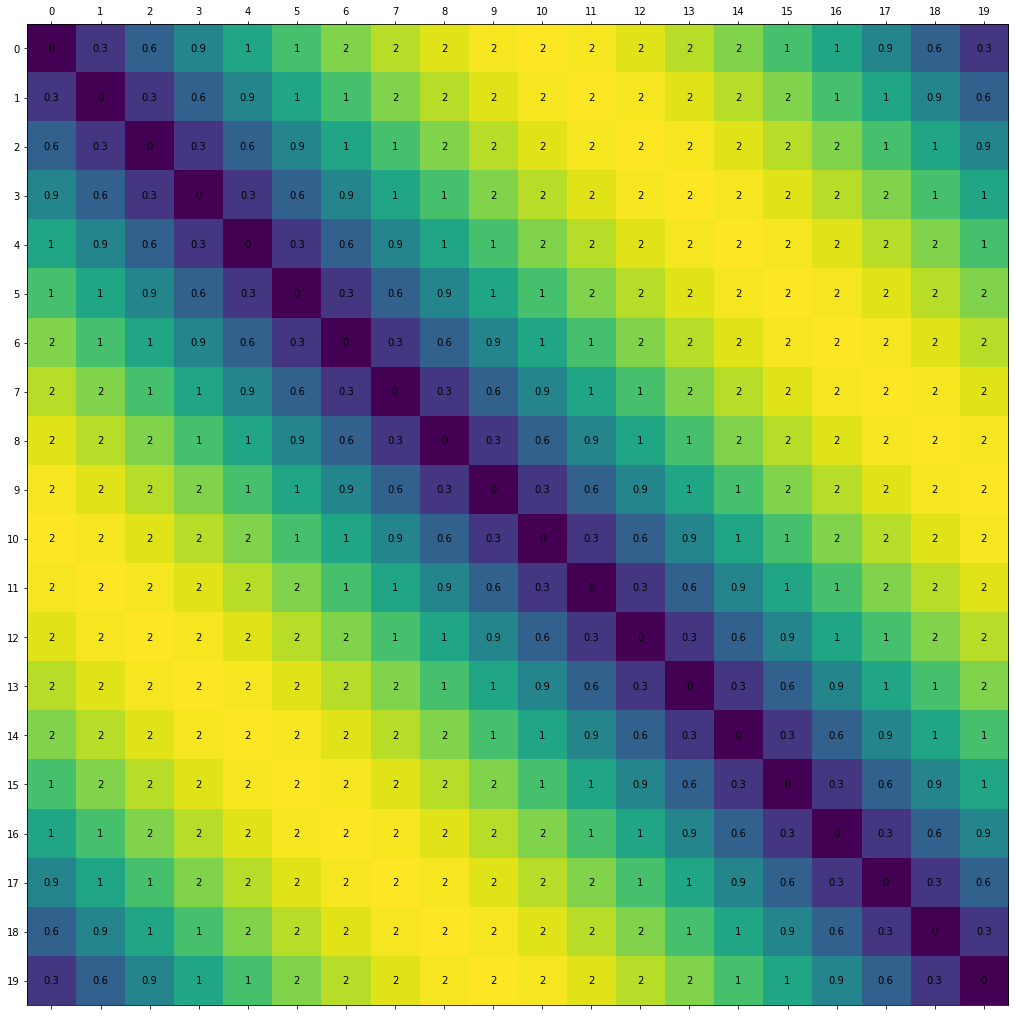

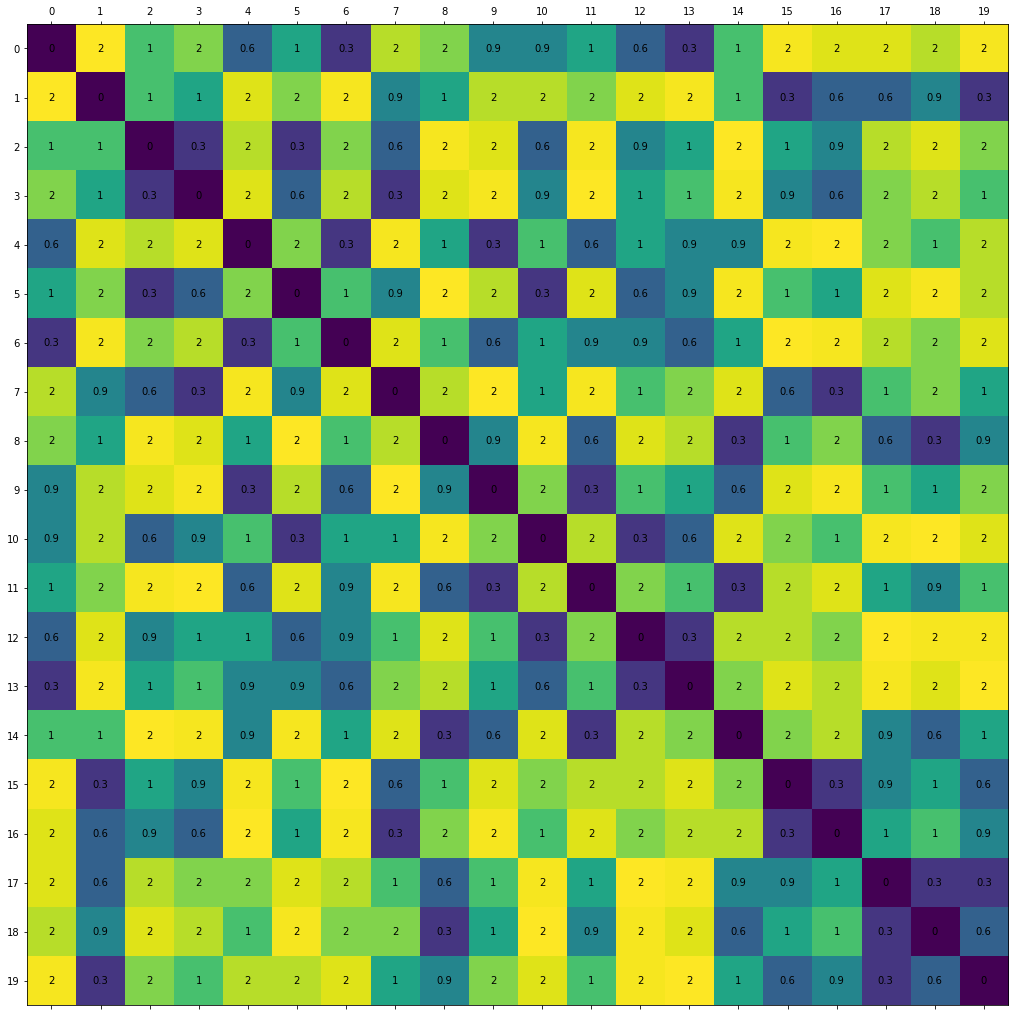

In [380]:
x = torch.arange(N).view(N,1)/N * 2 * np.pi
x = torch.cat([x.cos(), x.sin()],-1)

Mo = torch.as_tensor(squareform(F.pdist(x)))

util.plot_mat(Mo, val_fmt=1);

M = Mo[order][:, order]
util.plot_mat(M, val_fmt=1);

In [381]:
# clf = NearestNeighbors(2).fit(coords)
# G = clf.kneighbors_graph()

0.3128683269023895
tensor([15, 16,  7,  3,  2,  5, 10, 12, 13,  0,  6,  4,  9, 11, 14,  8, 18, 17,
        19,  1])


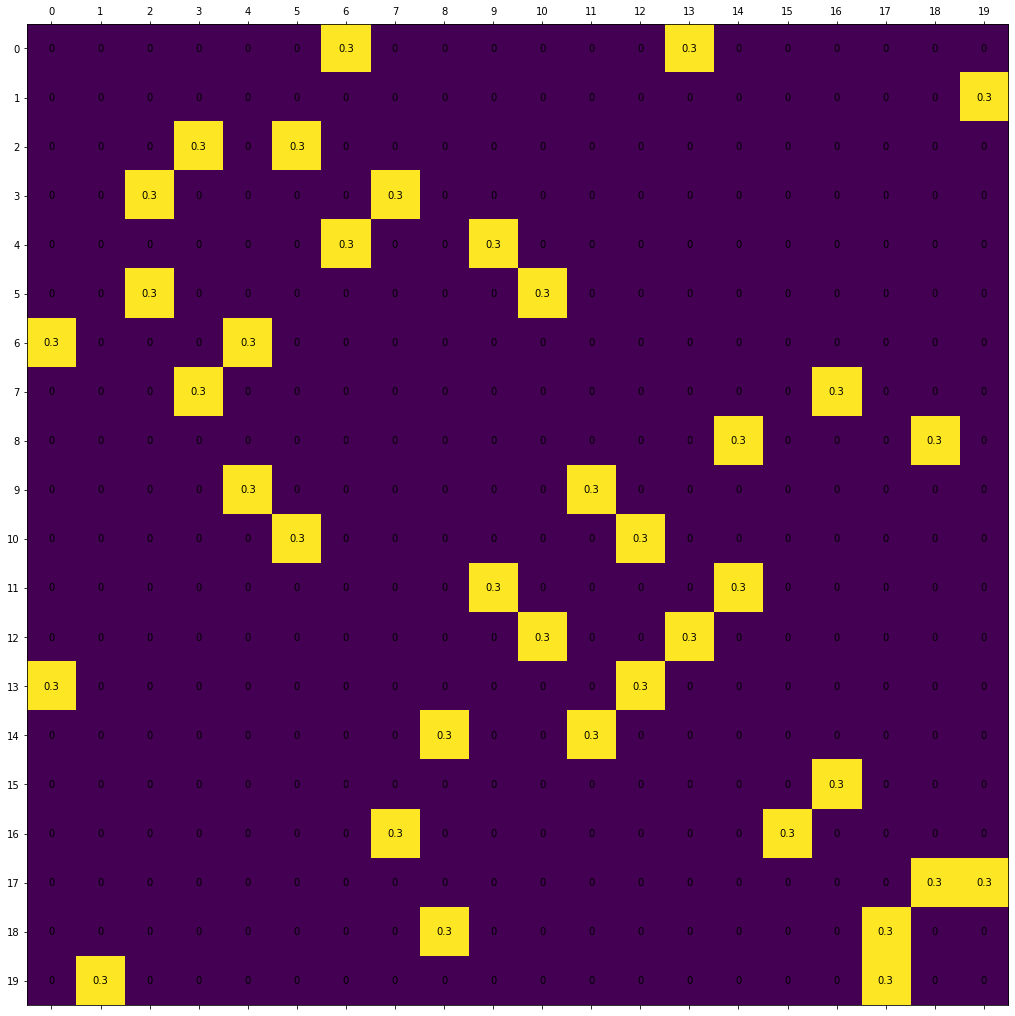

In [383]:
mst = minimum_spanning_tree(M)
S = torch.as_tensor(mst.todense()).float()
n, start = S.sum(0).add(S.sum(-1)).min(0)
print(n.item())
seq = list(nx.dfs_preorder_nodes(nx.from_scipy_sparse_matrix(mst), start.item()))
seq = torch.as_tensor(seq)
print(seq)
util.plot_mat(S + S.t(), val_fmt=1);

In [384]:
seq

tensor([15, 16,  7,  3,  2,  5, 10, 12, 13,  0,  6,  4,  9, 11, 14,  8, 18, 17,
        19,  1])

In [385]:
Pf = torch.zeros(N,N)
Pf[seq, torch.arange(N)] = 1
# util.plot_mat(Pf, val_fmt=1);

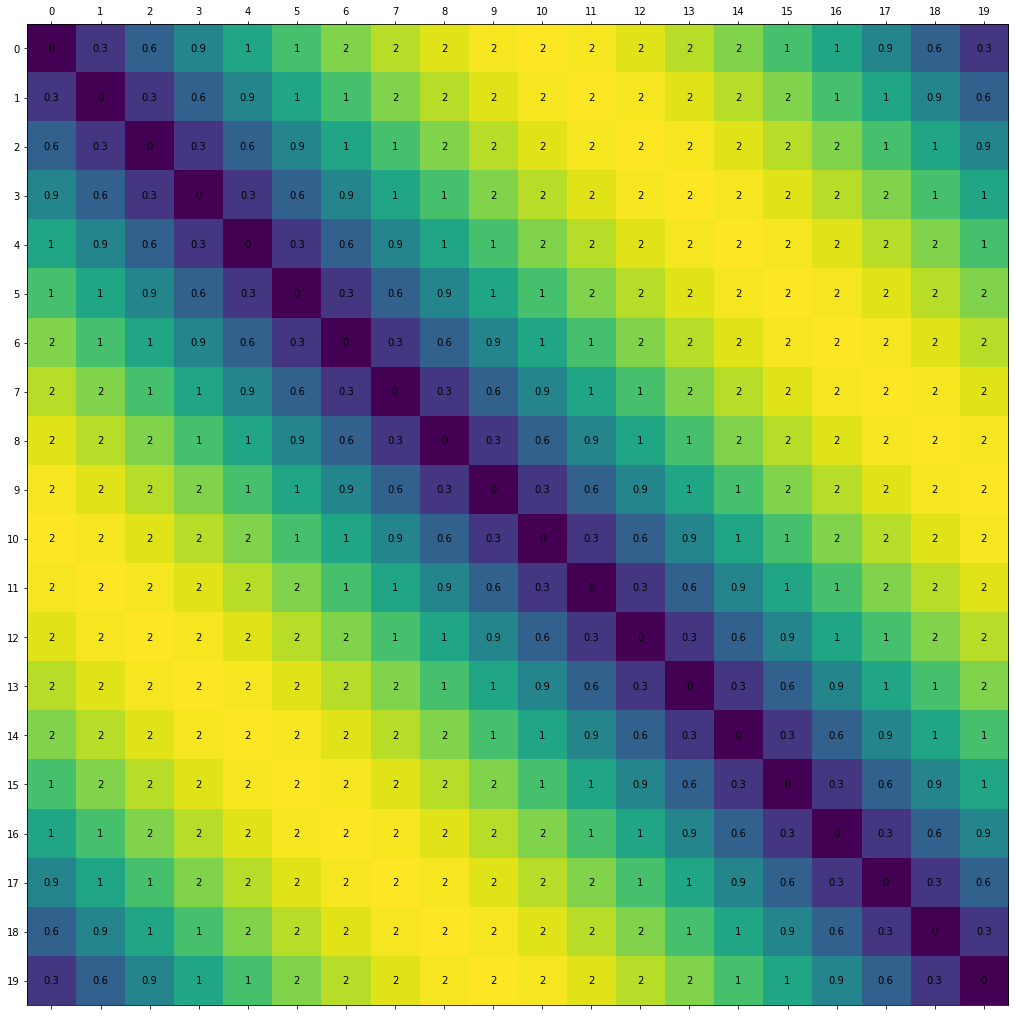

In [386]:
fixed = seq
Mf = M[fixed][:, fixed]
util.plot_mat(Mf, val_fmt=1);

In [112]:

def gen_random_seed(gen=None):
	return torch.randint(-2**63, 2**63-1, size=(), generator=gen).item()


def gen_deterministic_seed(seed):
	return gen_random_seed(torch.Generator().manual_seed(seed))

In [113]:
torch.manual_seed(1)
seq = [1]
for _ in range(10):
    seq.append(gen_deterministic_seed(seq[-1]))
print(seq)
    
torch.manual_seed(2)
seq = [1]
for _ in range(10):
    seq.append(gen_deterministic_seed(seq[-1]))
print(seq)

[1, -1530673954295414549, -3421920709960850030, 8660208677044198885, 230277186618747193, 6654338639361039245, -857573820866540151, -6257764680003099069, -3825576044955614492, -199984079434300916, 8378494605686011071]
[1, -1530673954295414549, -3421920709960850030, 8660208677044198885, 230277186618747193, 6654338639361039245, -857573820866540151, -6257764680003099069, -3825576044955614492, -199984079434300916, 8378494605686011071]


In [ ]:
[1, 2723503014074817357, 3127427989222673401, 7191973783925042553, 12986405843134889776, 11027787074705882475, 12814017820992866965, 729996583277023140, 10306222021073943467, 16781685821622606457, 6428804807957045317]
[1, 24137522822235497, 7024266024689648582, 5073737922358736849, 15684917419131378609, 13817250243389047323, 17488938793348505745, 5744964462655784650, 271539733803977503, 7363263750959559276, 14862259762467692185]

In [57]:
torch.randn(3, generator=gen, device='cuda')

RuntimeError: Expected a 'cuda' device type for generator but found 'cpu'

In [59]:
x = torch.randn(100)
bs = 12

In [61]:
torch.split(x,bs)

(tensor([ 1.8910,  0.5049, -0.1015,  0.1576,  1.0792,  0.6544, -1.3846,  0.5277,
         -1.3540,  1.6124,  0.6462, -0.7092]),
 tensor([ 0.3738, -0.3660, -0.6492, -0.4361, -0.3975,  0.4717, -1.8505, -2.2229,
         -0.0814, -0.7109,  1.4754,  1.2414]),
 tensor([ 0.0610, -0.8476, -1.0429, -0.8766,  0.9798, -1.3593,  0.1009, -0.3140,
          0.1459, -0.4293, -0.6063, -1.5964]),
 tensor([ 0.0780, -0.9260,  0.8056,  0.4824,  1.4102,  0.6614,  0.1451, -0.3045,
         -0.6146, -0.6247, -0.6715,  0.7284]),
 tensor([-0.1886, -1.3659,  0.4527,  0.3070,  0.0190,  0.4875, -0.3925, -2.0049,
         -1.3455,  0.3169,  1.3924, -0.9968]),
 tensor([-0.1638,  0.7502, -0.2430, -1.1092,  0.5042,  0.8246,  0.6393, -0.8370,
         -0.6508, -0.8251, -0.7062,  0.4054]),
 tensor([-1.0045, -0.4440, -1.1674, -1.6820,  1.3410, -1.0546,  0.6374,  0.3758,
         -0.3035,  0.5326,  0.2245,  0.1745]),
 tensor([ 0.2024, -0.6717,  0.4534,  1.6682,  0.7185, -1.1236,  1.8557, -0.3924,
          0.1946,  1.08

In [11]:
torch.Generator?

In [12]:
import psutil
    
psutil.virtual_memory().total

ModuleNotFoundError: No module named 'psutil'

In [14]:
import os
mem_bytes = os.sysconf('SC_PAGE_SIZE') * os.sysconf('SC_PHYS_PAGES')  # e.g. 4015976448
mem_gib = mem_bytes/(1024.**3)  # e.g. 3.74
mem_gib

62.829566955566406

In [15]:
import subprocess as sp
import os

def get_gpu_memory():
    command = "nvidia-smi --query-gpu=memory.free --format=csv"
    memory_free_info = sp.check_output(command.split()).decode('ascii').split('\n')[:-1][1:]
    memory_free_values = [int(x.split()[0]) for i, x in enumerate(memory_free_info)]
    return memory_free_values

get_gpu_memory()

[5910]

In [25]:
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |
|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |
|---------------------------------------------------------------------------|
| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |

In [35]:
dev = torch.device('cuda:1')
dev

device(type='cuda', index=1)

In [44]:
torch.device('cpu') == torch.device('cpu')

True

In [55]:
torch.randint(10, size=(10,))

tensor([2, 2, 6, 6, 0, 1, 5, 1, 5, 0])

In [51]:
torch.randperm(10000000, generator=gen)

tensor([2385973, 4083072, 7549813,  ..., 1044743, 6448797, 8469506])

In [38]:
torch.device(dev)

device(type='cuda', index=1)

In [37]:
torch.cuda.get_device_properties(dev.index)

AssertionError: Invalid device id

In [29]:
prop = torch.cuda.get_device_properties(0)

In [33]:
prop.total_memory / (1024**3)

7.7939453125

In [27]:
torch.cuda.

0

In [23]:
torch.cuda.memory_stats_as_nested_dict()

{'num_alloc_retries': 0,
 'num_ooms': 0,
 'allocation': {'all': {'current': 0, 'peak': 0, 'allocated': 0, 'freed': 0},
  'small_pool': {'current': 0, 'peak': 0, 'allocated': 0, 'freed': 0},
  'large_pool': {'current': 0, 'peak': 0, 'allocated': 0, 'freed': 0}},
 'segment': {'all': {'current': 0, 'peak': 0, 'allocated': 0, 'freed': 0},
  'small_pool': {'current': 0, 'peak': 0, 'allocated': 0, 'freed': 0},
  'large_pool': {'current': 0, 'peak': 0, 'allocated': 0, 'freed': 0}},
 'active': {'all': {'current': 0, 'peak': 0, 'allocated': 0, 'freed': 0},
  'small_pool': {'current': 0, 'peak': 0, 'allocated': 0, 'freed': 0},
  'large_pool': {'current': 0, 'peak': 0, 'allocated': 0, 'freed': 0}},
 'inactive_split': {'all': {'current': 0,
   'peak': 0,
   'allocated': 0,
   'freed': 0},
  'small_pool': {'current': 0, 'peak': 0, 'allocated': 0, 'freed': 0},
  'large_pool': {'current': 0, 'peak': 0, 'allocated': 0, 'freed': 0}},
 'allocated_bytes': {'all': {'current': 0,
   'peak': 0,
   'allocate

In [29]:
x = torch.randn(4,5,3)
x

tensor([[[-1.3345,  1.2675,  0.9065],
         [ 0.1395,  0.4733, -0.7066],
         [ 0.8822,  0.8555,  1.1304],
         [-1.0084, -0.5964,  0.8119],
         [ 0.5169, -0.3748, -1.4017]],

        [[-0.1650,  1.0673,  0.2567],
         [ 0.2639,  0.4833, -1.5303],
         [ 0.4898,  1.6644,  0.0907],
         [-0.9278,  0.7583, -0.4860],
         [ 1.0937,  1.0298,  0.2926]],

        [[ 0.9011,  0.6392,  1.0575],
         [-0.2978, -0.6852,  1.4117],
         [ 0.6138,  0.2619, -0.7309],
         [-0.0676, -0.5901, -0.5825],
         [ 1.3767,  0.1887,  1.9982]],

        [[ 0.2209,  1.1257,  0.2723],
         [-0.1724, -0.6954,  0.5046],
         [ 0.1694, -0.8517, -0.6190],
         [-0.4745, -1.3955,  0.8303],
         [ 0.1953,  0.9966,  0.0790]]])

In [3]:
util.pairwise(lambda a,b: a@b, x)

RuntimeError: stack expects each tensor to be equal size, but got [1] at entry 0 and [2] at entry 2

In [36]:
criterion = lambda a,b: a.bmm(b.permute(0,2,1)).sum(-1)
ps = x
qs=None
dim=1
include_self=False
narrow=True

if narrow is None:
    narrow = dim == 0

if qs is not None or include_self:
    raise NotImplementedError

sel = (lambda idx: ps.narrow(dim, idx, 1)) if narrow else (lambda idx: ps.narrow(dim, idx, 1).squeeze(dim))

N = ps.size(dim)
_u = None

rows = []
for i in range(N):
    p = sel(i)
    vals = [criterion(p, sel(j)) for j in range(i+1-int(include_self),N)]
    if _u is None:
        _u = vals[0]

    row = torch.stack([torch.zeros_like(_u)]*(N-len(vals)) + vals, dim=dim)
    rows.append(row)

out = torch.stack(rows, dim=dim)

In [37]:
out.shape

torch.Size([4, 5, 5, 1])

In [35]:
criterion(sel(0), sel(0))

RuntimeError: Expected 3-dimensional tensor, but got 2-dimensional tensor for argument #1 'batch1' (while checking arguments for bmm)

In [39]:
out.squeeze()[0]

tensor([[ 0.0000, -0.2267,  0.9318,  1.3256, -2.4356],
        [ 0.0000,  0.0000, -0.2707, -0.9966,  0.8851],
        [ 0.0000,  0.0000,  0.0000, -0.4821, -1.4492],
        [ 0.0000,  0.0000,  0.0000,  0.0000, -1.4357],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]])

In [48]:
x = torch.arange(2*4*4*3).view(2,4,4,3)
x.diagonal(1,1,2).shape

torch.Size([2, 3, 3])

In [47]:
x[0]

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]])

In [49]:
torch.add(torch.randn(3), torch.randn(3))

tensor([-0.2093, -0.9030, -0.3929])

In [64]:
side = 7
x = torch.randn(side*side).numpy().reshape(side,side)*100
print(x)

[[ 1.14778008e+02  2.22600693e+02 -5.05361786e+01 -1.05088428e-02 -1.20034157e+02 -2.86837158e+01 -2.49179153e+01]
 [-1.44878433e+02 -2.47434211e+00 -1.71974091e+02 -1.56621445e+02 -4.69208384e+00 -2.33995514e+02 -2.37962006e+02]
 [ 6.74833679e+01 -3.53124275e+01  2.18546143e+01 -1.04592278e+02 -1.64406631e+02 -1.15986656e+02 -3.80655785e+01]
 [-2.32496319e+01  1.08980112e+01 -1.22530193e+01 -8.00553894e+01  5.23071289e+01 -1.49977188e+02 -2.89286079e+01]
 [-5.40872154e+01  6.82705841e+01 -1.03750565e+02 -7.46238327e+00  1.29138672e+00  6.37239571e+01  1.04921846e+01]
 [ 3.42548294e+01  8.28285065e+01 -1.24850929e+02  4.54692650e+01 -2.50765953e+01  1.21611488e+02  9.48787594e+00]
 [-9.86946564e+01 -2.44175282e+01 -7.80551376e+01 -5.63782349e+01  5.80447197e+01  2.07184250e+02 -7.93981934e+01]]


In [65]:
xs = util.round_sigfigs(x, 2)
print(xs)

[[ 1.10000002e+02  2.20000005e+02 -5.09999990e+01 -1.10000002e-02 -1.20000005e+02 -2.90000010e+01 -2.50000000e+01]
 [-1.39999998e+02 -2.50000000e+00 -1.70000005e+02 -1.60000002e+02 -4.69999981e+00 -2.29999995e+02 -2.40000010e+02]
 [ 6.69999981e+01 -3.50000000e+01  2.20000005e+01 -1.00000000e+02 -1.60000002e+02 -1.20000005e+02 -3.79999995e+01]
 [-2.29999995e+01  1.10000002e+01 -1.20000005e+01 -8.00000000e+01  5.19999981e+01 -1.50000000e+02 -2.90000010e+01]
 [-5.40000010e+01  6.80000019e+01 -1.00000000e+02 -7.50000000e+00  1.29999995e+00  6.40000010e+01  1.00000000e+01]
 [ 3.40000010e+01  8.30000019e+01 -1.20000005e+02  4.50000000e+01 -2.50000000e+01  1.20000005e+02  9.50000000e+00]
 [-9.89999962e+01 -2.40000010e+01 -7.80000019e+01 -5.59999990e+01  5.80000019e+01  2.09999990e+02 -7.90000010e+01]]


In [66]:
xn = sigfig_noise(xs, torch.rand_like(torch.from_numpy(xs)).sub(0.5).numpy(), 2)
print(xn)

[[ 1.07157092e+02  2.19275657e+02 -5.14042902e+01 -1.08483282e-02 -1.24552574e+02 -2.92949099e+01 -2.51695729e+01]
 [-1.36056500e+02 -2.49150473e+00 -1.73934255e+02 -1.61773688e+02 -4.70801869e+00 -2.25384012e+02 -2.38913786e+02]
 [ 6.70646827e+01 -3.52441734e+01  2.20476834e+01 -1.00321231e+02 -1.62510298e+02 -1.22932394e+02 -3.83816624e+01]
 [-2.26900036e+01  1.12232131e+01 -1.23262685e+01 -7.98340593e+01  5.18342560e+01 -1.54974311e+02 -2.85347923e+01]
 [-5.35581623e+01  6.78441253e+01 -9.99561593e+01 -7.46838872e+00  1.29937869e+00  6.43687391e+01  1.02982418e+01]
 [ 3.37839328e+01  8.25246160e+01 -1.16173333e+02  4.50022265e+01 -2.49624208e+01  1.20153023e+02  9.50246746e+00]
 [-9.88828118e+01 -2.44198043e+01 -7.80960356e+01 -5.61039136e+01  5.79468327e+01  2.05320369e+02 -7.91760683e+01]]


In [67]:
xns = util.round_sigfigs(xn, 2)
print(xns)

[[ 1.1e+02  2.2e+02 -5.1e+01 -1.1e-02 -1.2e+02 -2.9e+01 -2.5e+01]
 [-1.4e+02 -2.5e+00 -1.7e+02 -1.6e+02 -4.7e+00 -2.3e+02 -2.4e+02]
 [ 6.7e+01 -3.5e+01  2.2e+01 -1.0e+02 -1.6e+02 -1.2e+02 -3.8e+01]
 [-2.3e+01  1.1e+01 -1.2e+01 -8.0e+01  5.2e+01 -1.5e+02 -2.9e+01]
 [-5.4e+01  6.8e+01 -1.0e+02 -7.5e+00  1.3e+00  6.4e+01  1.0e+01]
 [ 3.4e+01  8.3e+01 -1.2e+02  4.5e+01 -2.5e+01  1.2e+02  9.5e+00]
 [-9.9e+01 -2.4e+01 -7.8e+01 -5.6e+01  5.8e+01  2.1e+02 -7.9e+01]]


In [44]:
np.allclose(xns, xs)

True

In [84]:
x = np.linspace(-2, 11, side*side)
x[-1] = 0

In [91]:
x

array([-2.        , -1.72916667, -1.45833333, -1.1875    , -0.91666667, -0.64583333, -0.375     , -0.10416667,
        0.16666667,  0.4375    ,  0.70833333,  0.97916667,  1.25      ,  1.52083333,  1.79166667,  2.0625    ,
        2.33333333,  2.60416667,  2.875     ,  3.14583333,  3.41666667,  3.6875    ,  3.95833333,  4.22916667,
        4.5       ,  4.77083333,  5.04166667,  5.3125    ,  5.58333333,  5.85416667,  6.125     ,  6.39583333,
        6.66666667,  6.9375    ,  7.20833333,  7.47916667,  7.75      ,  8.02083333,  8.29166667,  8.5625    ,
        8.83333333,  9.10416667,  9.375     ,  9.64583333,  9.91666667, 10.1875    , 10.45833333, 10.72916667,
        0.        ])

In [97]:
mag = np.floor(np.log10(np.abs(x)))
mag[np.isinf(mag)] = 0.
mag

array([ 0.,  0.,  0.,  0., -1., -1., -1., -1., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  0.])

In [101]:

np.round(x * 10**(sigfigs-mag), decimals=2) / 10**mag

array([-2.   , -1.73 , -1.46 , -1.19 , -0.917, -0.646, -0.375, -0.104,  0.167,  0.438,  0.708,  0.979,  1.25 ,  1.52 ,
        1.79 ,  2.06 ,  2.33 ,  2.6  ,  2.88 ,  3.15 ,  3.42 ,  3.69 ,  3.96 ,  4.23 ,  4.5  ,  4.77 ,  5.04 ,  5.31 ,
        5.58 ,  5.85 ,  6.12 ,  6.4  ,  6.67 ,  6.94 ,  7.21 ,  7.48 ,  7.75 ,  8.02 ,  8.29 ,  8.56 ,  8.83 ,  9.1  ,
        9.38 ,  9.65 ,  9.92 , 10.2  , 10.5  , 10.7  ,  0.   ])

In [102]:
torch.round?

In [118]:
sigfigs = 2

In [119]:
x = torch.linspace(-2, 11, side*side)
x[-1] = 0

In [120]:
mag = x.abs().log10().floor()
mag[mag.isinf()] = 0
reg = 10**(sigfigs-mag-1)

In [122]:
x.mul(reg).round().div(reg)#.numpy()

array([-2.  , -1.7 , -1.5 , -1.2 , -0.92, -0.65, -0.38, -0.1 ,  0.17,  0.44,  0.71,  0.98,  1.3 ,  1.5 ,  1.8 ,  2.1 ,
        2.3 ,  2.6 ,  2.9 ,  3.1 ,  3.4 ,  3.7 ,  4.  ,  4.2 ,  4.5 ,  4.8 ,  5.  ,  5.3 ,  5.6 ,  5.9 ,  6.1 ,  6.4 ,
        6.7 ,  6.9 ,  7.2 ,  7.5 ,  7.8 ,  8.  ,  8.3 ,  8.6 ,  8.8 ,  9.1 ,  9.4 ,  9.6 ,  9.9 , 10.  , 10.  , 11.  ,
        0.  ], dtype=float32)

In [123]:
def round_sigfigs(x, sigfigs=3):
	mag = x.abs().log10().floor()
	mag[mag.isinf()] = 0
	reg = 10 ** (sigfigs - mag - 1)
	return x.mul(reg).round().div(reg)


def sigfig_noise(x, n, sigfigs=3):
	mag = x.abs().log10().floor()
	mag[mag.isinf()] = 0
	reg = 10 ** (sigfigs - mag - 1)
	return x.mul(reg).add(n).div(reg)


In [133]:
from sklearn.ensemble import IsolationForest as SK_IsolationForest

In [134]:
SK_IsolationForest.mro()

[sklearn.ensemble._iforest.IsolationForest,
 sklearn.base.OutlierMixin,
 sklearn.ensemble._bagging.BaseBagging,
 sklearn.ensemble._base.BaseEnsemble,
 sklearn.base.MetaEstimatorMixin,
 sklearn.base.BaseEstimator,
 object]

In [129]:
x = torch.linspace(-2, 11, 100)
x[-1] = 0
x

tensor([-2.0000, -1.8687, -1.7374, -1.6061, -1.4747, -1.3434, -1.2121, -1.0808,
        -0.9495, -0.8182, -0.6869, -0.5556, -0.4242, -0.2929, -0.1616, -0.0303,
         0.1010,  0.2323,  0.3636,  0.4949,  0.6263,  0.7576,  0.8889,  1.0202,
         1.1515,  1.2828,  1.4141,  1.5455,  1.6768,  1.8081,  1.9394,  2.0707,
         2.2020,  2.3333,  2.4646,  2.5960,  2.7273,  2.8586,  2.9899,  3.1212,
         3.2525,  3.3838,  3.5152,  3.6465,  3.7778,  3.9091,  4.0404,  4.1717,
         4.3030,  4.4343,  4.5657,  4.6970,  4.8283,  4.9596,  5.0909,  5.2222,
         5.3535,  5.4848,  5.6162,  5.7475,  5.8788,  6.0101,  6.1414,  6.2727,
         6.4040,  6.5354,  6.6667,  6.7980,  6.9293,  7.0606,  7.1919,  7.3232,
         7.4545,  7.5859,  7.7172,  7.8485,  7.9798,  8.1111,  8.2424,  8.3737,
         8.5051,  8.6364,  8.7677,  8.8990,  9.0303,  9.1616,  9.2929,  9.4242,
         9.5556,  9.6869,  9.8182,  9.9495, 10.0808, 10.2121, 10.3434, 10.4747,
        10.6061, 10.7374, 10.8687,  0.00

In [128]:
xr = round_sigfigs(x, 2)
xr

tensor([-2.0000, -1.9000, -1.7000, -1.6000, -1.5000, -1.3000, -1.2000, -1.1000,
        -0.9500, -0.8200, -0.6900, -0.5600, -0.4200, -0.2900, -0.1600, -0.0300,
         0.1000,  0.2300,  0.3600,  0.4900,  0.6300,  0.7600,  0.8900,  1.0000,
         1.2000,  1.3000,  1.4000,  1.5000,  1.7000,  1.8000,  1.9000,  2.1000,
         2.2000,  2.3000,  2.5000,  2.6000,  2.7000,  2.9000,  3.0000,  3.1000,
         3.3000,  3.4000,  3.5000,  3.6000,  3.8000,  3.9000,  4.0000,  4.2000,
         4.3000,  4.4000,  4.6000,  4.7000,  4.8000,  5.0000,  5.1000,  5.2000,
         5.4000,  5.5000,  5.6000,  5.7000,  5.9000,  6.0000,  6.1000,  6.3000,
         6.4000,  6.5000,  6.7000,  6.8000,  6.9000,  7.1000,  7.2000,  7.3000,
         7.5000,  7.6000,  7.7000,  7.8000,  8.0000,  8.1000,  8.2000,  8.4000,
         8.5000,  8.6000,  8.8000,  8.9000,  9.0000,  9.2000,  9.3000,  9.4000,
         9.6000,  9.7000,  9.8000,  9.9000, 10.0000, 10.0000, 10.0000, 10.0000,
        11.0000, 11.0000, 11.0000,  0.00

In [130]:
xn = sigfig_noise(xr, torch.rand_like(xr).sub(0.5), 2)
xn

tensor([-1.9664, -1.8627, -1.7498, -1.5767, -1.5355, -1.2766, -1.2324, -1.0885,
        -0.9489, -0.8182, -0.6936, -0.5561, -0.4188, -0.2853, -0.1597, -0.0304,
         0.1017,  0.2340,  0.3570,  0.4932,  0.6320,  0.7640,  0.8869,  0.9933,
         1.2192,  1.2982,  1.4396,  1.5499,  1.6529,  1.7727,  1.9159,  2.0576,
         2.1637,  2.3103,  2.4850,  2.5625,  2.7493,  2.9079,  3.0061,  3.0988,
         3.2607,  3.4173,  3.4884,  3.6081,  3.8454,  3.9471,  4.0282,  4.2393,
         4.2664,  4.4021,  4.5687,  4.7076,  4.8066,  4.9825,  5.1093,  5.2122,
         5.4469,  5.4600,  5.6025,  5.6571,  5.9337,  5.9845,  6.1229,  6.3486,
         6.3654,  6.4633,  6.6621,  6.7763,  6.8861,  7.1409,  7.2302,  7.3330,
         7.4602,  7.5994,  7.7306,  7.7590,  7.9922,  8.0909,  8.2397,  8.3894,
         8.4767,  8.5976,  8.7973,  8.8724,  9.0159,  9.1971,  9.2831,  9.3924,
         9.6366,  9.7216,  9.7836,  9.8846, 10.4070,  9.7703,  9.7698, 10.2646,
        10.6336, 11.1322, 10.9266,  0.02

In [131]:
xnr = round_sigfigs(xn, 2)
xnr

tensor([-2.0000, -1.9000, -1.7000, -1.6000, -1.5000, -1.3000, -1.2000, -1.1000,
        -0.9500, -0.8200, -0.6900, -0.5600, -0.4200, -0.2900, -0.1600, -0.0300,
         0.1000,  0.2300,  0.3600,  0.4900,  0.6300,  0.7600,  0.8900,  0.9900,
         1.2000,  1.3000,  1.4000,  1.5000,  1.7000,  1.8000,  1.9000,  2.1000,
         2.2000,  2.3000,  2.5000,  2.6000,  2.7000,  2.9000,  3.0000,  3.1000,
         3.3000,  3.4000,  3.5000,  3.6000,  3.8000,  3.9000,  4.0000,  4.2000,
         4.3000,  4.4000,  4.6000,  4.7000,  4.8000,  5.0000,  5.1000,  5.2000,
         5.4000,  5.5000,  5.6000,  5.7000,  5.9000,  6.0000,  6.1000,  6.3000,
         6.4000,  6.5000,  6.7000,  6.8000,  6.9000,  7.1000,  7.2000,  7.3000,
         7.5000,  7.6000,  7.7000,  7.8000,  8.0000,  8.1000,  8.2000,  8.4000,
         8.5000,  8.6000,  8.8000,  8.9000,  9.0000,  9.2000,  9.3000,  9.4000,
         9.6000,  9.7000,  9.8000,  9.9000, 10.0000,  9.8000,  9.8000, 10.0000,
        11.0000, 11.0000, 11.0000,  0.02

In [132]:
torch.allclose(xr, xnr)

False

In [240]:
from src.tasks.lossy_compression import arithmeticcoding

from src.tasks.lossy_compression.ppm_compress import compress
from src.tasks.lossy_compression.ppm_decompress import decompress

from src.tasks.lossy_compression.adaptive_arithmetic_compress import compress
from src.tasks.lossy_compression.adaptive_arithmetic_decompress import decompress

from src.tasks.lossy_compression.arithmetic_compress import compress
from src.tasks.lossy_compression.arithmetic_decompress import decompress
from collections import Counter
import io, contextlib

In [320]:
np.random.seed(5)
X = np.random.randn(6000)*10 > 0
X = X.astype(np.float32).astype(np.float16)#.astype(np.int8)

In [321]:
import lzma

In [322]:
x = X.tobytes()

In [323]:
z = lzma.compress(x)
len(x)/len(z), len(z), len(x)

(10.526315789473685, 1140, 12000)

In [324]:
xhat = lzma.decompress(z)
xhat == x

True

In [325]:
float_tensor = torch.randn(2, 2, 3)

scale, zero_point = 1e-4, 2
dtype = torch.qint32
q_per_tensor = torch.quantize_per_tensor(float_tensor, scale, zero_point, dtype)

In [326]:
q_per_tensor.int_repr()

tensor([[[ -2305,  -1095, -14960],
         [-12868,  12480,   2937]],

        [[-32463, -12207,   9851],
         [ -5867,   2729,  13173]]], dtype=torch.int32)

In [327]:
float_tensor

tensor([[[-0.2307, -0.1097, -1.4962],
         [-1.2870,  1.2478,  0.2935]],

        [[-3.2465, -1.2209,  0.9849],
         [-0.5869,  0.2727,  1.3171]]])

In [328]:
x = torch.randn(3)
x

tensor([-0.2916, -0.0494, -1.1954])

In [329]:
x.half().float() - x

tensor([ 6.3300e-05, -1.1284e-05,  5.2452e-05])

In [245]:

cinp = io.BytesIO(x)
cout = io.BytesIO()
bitout = arithmeticcoding.BitOutputStream(cout)

In [256]:
cnts = Counter(x)
cnts[256] = 1
ls = [0]*(max(cnts)+1)
for i,v in cnts.items():
    ls[i] = v
freqs = arithmeticcoding.SimpleFrequencyTable(ls)

In [258]:
# compress(cinp, bitout)
compress(freqs, cinp, bitout)

In [259]:
z = cout.getvalue()
len(x), len(z), len(x) / len(z)

(6000, 751, 7.989347536617843)

In [260]:
z[-5:]

b'\xf8\x0b\x8f\x89\xd2'

In [261]:
dinp = io.BytesIO(z)
bitin = arithmeticcoding.BitInputStream(dinp)
dout = io.BytesIO()

In [262]:
# decompress(bitin, dout)
decompress(freqs, bitin, dout)

In [263]:
xhat = dout.getvalue()
x == xhat[:len(x)], len(x), len(xhat)

(True, 6000, 10580)

In [239]:
x[-25:]

b'\x0f\xfa\xff\xff\x17\xff\x03\xfc\x03\x00\xfa\xff\x05\xfc\xf4\x17\xeb\xff\xf4\xf5\x05\xf5\x03\r\xfe'

In [138]:
xhat[-30:]

b'\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x01\x00@\x00\x00\x00\x00\x00\x01\x00\x01\x01\x01\x00\x00\x01;\x00\x01\x01'

In [1]:
import numpy as np

In [2]:
ls = np.random.randint(low=1 << 16, high=1 << 31, size=10, dtype=np.uint32)
ls

array([ 378375272, 1577420962,  884439244, 1922485891, 2048099657,
       1413565113,  243340942,  478321812, 1893714527,  646379807],
      dtype=uint32)

In [9]:
data = bytes(bytearray(ls))
len(data)

40

In [10]:
data

b'h\x8c\x8d\x16\xa2\x88\x05^\xccx\xb74\x83\xce\x96rI\x85\x13z\xb9JAT\x8e\x16\x81\x0e\x94\x9c\x82\x1c_\xca\xdfp\x1f\xf9\x86&'

In [8]:
len(data)

39

In [15]:
int_list = [np.int32(int.from_bytes(x, byteorder='little', signed = True)) for x in ls]
len(int_list)

10

In [18]:
type(int_list[0])

numpy.int32

In [361]:
__logBase10of2 = 3.010299956639811952137388947244930267681898814621085413104274611e-1

def RoundToSigFigs_fp( x, sigfigs ):
    """
    Rounds the value(s) in x to the number of significant figures in sigfigs.
    Return value has the same type as x.

    Restrictions:
    sigfigs must be an integer type and store a positive value.
    x must be a real value or an array like object containing only real values.
    """
    if not ( type(sigfigs) is int or #type(sigfigs) is long or
             isinstance(sigfigs, np.integer) ):
        raise TypeError( "RoundToSigFigs_fp: sigfigs must be an integer." )

    if sigfigs <= 0:
        raise ValueError( "RoundToSigFigs_fp: sigfigs must be positive." )

    if not np.all(np.isreal( x )):
        raise TypeError( "RoundToSigFigs_fp: all x must be real." )

    #temporarily suppres floating point errors
    errhanddict = np.geterr()
    np.seterr(all="ignore")

    matrixflag = False
    if isinstance(x, np.matrix): #Convert matrices to arrays
        matrixflag = True
        x = np.asarray(x)

    xsgn = np.sign(x)
    absx = xsgn * x
    mantissas, binaryExponents = np.frexp( absx )

    decimalExponents = __logBase10of2 * binaryExponents
    omags = np.floor(decimalExponents)

    mantissas *= 10.0**(decimalExponents - omags)

    if type(mantissas) is float or isinstance(mantissas, np.floating):
        if mantissas < 1.0:
            mantissas *= 10.0
            omags -= 1.0

    else: #elif np.all(np.isreal( mantissas )):
        fixmsk = mantissas < 1.0, 
        mantissas[fixmsk] *= 10.0
        omags[fixmsk] -= 1.0

    result = xsgn * np.around( mantissas, decimals=sigfigs - 1 ) * 10.0**omags
    if matrixflag:
        result = np.matrix(result, copy=False)

    np.seterr(**errhanddict)
    return result

In [373]:
np.random.seed(5)
X = np.random.randn(6000)*1000 #> 0
X = X.astype(np.float32)#.astype(np.float16)#.astype(np.int8)

In [374]:
rats = []
sfs = np.arange(1,8)
for sf in sfs:

    Xr = RoundToSigFigs_fp(X, sf)
    x = Xr.tobytes()
    z = lzma.compress(x)
    rats.append(len(x)/len(z))
rats = np.array(rats)

<IPython.core.display.Javascript object>


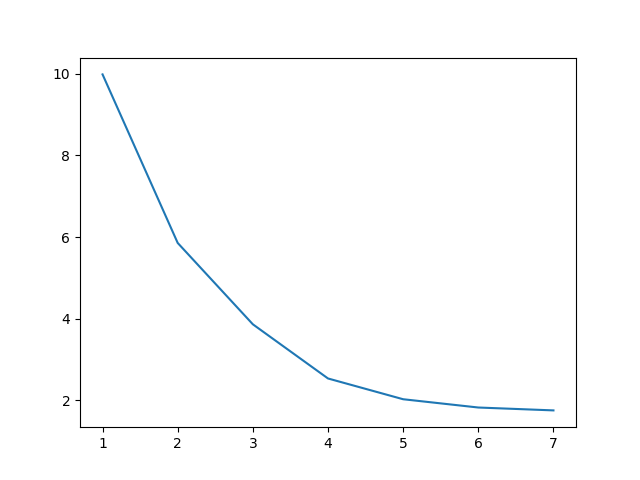

In [375]:
plt.figure()
plt.plot(sfs, rats)

In [376]:
Xr = RoundToSigFigs_fp(X, 1)
Xr[:10]

array([ 400., -300., 2000., -300.,  100., 2000., -900., -600.,  200., -300.])

In [377]:
X[:10]

array([ 441.22748, -330.87015, 2430.7712 , -252.09213,  109.60984, 1582.4811 , -909.2324 , -591.63666,  187.60323,
       -329.86996], dtype=float32)

In [378]:
x = torch.randn(5)

In [380]:
x.numpy().tobytes()

b'i\xe5\xcd?\xa2\xda\x0f?\xccd\x9d<\xce\xcd3>&\xb5\xdc\xbe'

In [350]:
x = Xr.tobytes()

In [351]:
z = lzma.compress(x)
len(x)/len(z), len(z), len(x)

(2.7991602519244227, 17148, 48000)

In [345]:
xhat = lzma.decompress(z)
xhat == x

True

In [166]:
def cov(X):
    V = X.sub(X.mean(0,keepdim=True))
    return V.t() @ V / (X.size(0))

In [176]:
N, D = 16, 4
N2 = N//2
N1 = N-N2

X1 = torch.randn(N1,D)
X2 = torch.randn(N2,D)

In [177]:
X = torch.cat([X1, X2], 0)
# X = torch.randn(N,D)
mn, sn = torch.from_numpy(np.mean(X.numpy(),0)), torch.from_numpy(np.cov(X.numpy(), rowvar=False))
mn.shape, sn.shape

(torch.Size([4]), torch.Size([4, 4]))

In [178]:
mu = X.mean(0)
mu.sub(mn).sum().item()

0.0

In [179]:
# util.plot_mat(sn, val_fmt=2, figside=0.4);

In [180]:
# C = V.t() @ V / (X.size(0)-1)
C = cov(X)

<IPython.core.display.Javascript object>


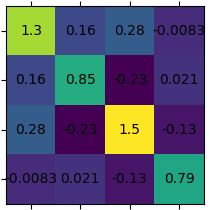

In [181]:
util.plot_mat(C, val_fmt=2, figside=0.4);

In [182]:
m1, s1 = X1.mean(0), cov(X1)
m2, s2 = X2.mean(0), cov(X2)
m1.shape, s1.shape

(torch.Size([4]), torch.Size([4, 4]))

In [183]:
mm = m1 + (m2-m1)*N2/(N1+N2)
mm.sub(mu).pow(2).sum().item()

1.9984014443252818e-15

<IPython.core.display.Javascript object>


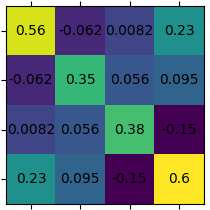

In [184]:
ss = ((N1)*s1 + s2*(N2)/(N1+N2)) / (N1+N2)

util.plot_mat(ss, val_fmt=2, figside=0.4);

In [1]:
import sys, os
from pathlib import Path
from wrapt import ObjectProxy

In [139]:
# class I:
#     def __init__(self, *args, **kwargs):
#         super().__init__(*args, **kwargs)

# class W(I, ObjectProxy):
#     def __init__(self, obj):
        
#         new = type(f'{type(self).__name__}_{obj.__class__.__name__}', 
#                              (type(self), obj.__class__), {})
        
# #         super().__init__(obj)
#         super().__init__()
#         print(obj)
# #         obj.__mro__ = (self.__class__, *obj.__class__.__mro__)
# #         obj.f = self.f
# #         obj.__class__.__getattribute__ = self.__getattribute__
# #         obj.__getattr__ = self.make_safe_get(obj)
    
#         self.__class__ = new
    
# #     def make_safe_get(self, obj):
# #         def _safe_get(item):
# #             try:
# #                 return self.__getattr__(item) 
# #             except AttributeError:
# #                 print(f'failed to get {item}')
# #                 return obj.__getattr__(item)
# #         return _safe_get
    
#     def f(self):
#         print('W f')
        
# #     def __getattr__(self, item):
# #         print(f'W.__getattr__ {item}')
# #         return super().__getattr__(item)
        
# #     def __getattribute__(self, item):
# #         print(f'W.__getattribute__ {item}')
# #         return super().__getattribute__(item)
    
# class W2(W):
    
#     def f(self):
#         print('W2 f')
    
# #     def __getattr__(self, item):
# #         print(f'W2.__getattr__ {item}')
# #         return super().__getattr__(item)
        
# #     def __getattribute__(self, item):
# #         print(f'W2.__getattribute__ {item}')
# #         return super().__getattribute__(item)
    
# class B:
#     def f(self):
#         print('B f')
#         super().f()
    
class A:
    
    def f(self):
        print(f'A f')
        
    def g(self):
        print(f'A g')
        
    def h(self):
        self.f()
        print(f'A h')
        
    def j(self, n=None):
        print(f'A j {n}')
        
        
#     def __getattr__(self, item):
#         print(f'A.__getattr__ {item}')
#         return super().__getattr__(item)
    
#     def __getattribute__(self, item):
#         print(f'A.__getattribute__ {item}')
#         return super().__getattribute__(item)

In [192]:
class Infiltrator:
#     __slots__ = ('__personal__')
    def __init_subclass__(cls, **kwargs):
        super().__init_subclass__(**kwargs)
        cls.__sub_count = 0
    
    @classmethod
    def _gen_infiltrator_sub(cls):
        cls.__sub_count += 1
        return f'{cls.__name__}{cls.__sub_count}'
    
    def __init__(self):
        self.__activate__()
    
    def __activate__(self, *args, **kwargs):
        print(f'activating {self}: {args} {kwargs}')
        self.__personal__ = {**kwargs}
    
    
#     def __getattr__(self, name):
#         # If we are being to lookup '__wrapped__' then the
#         # '__init__()' method cannot have been called.

# #         if name == '__personal__':
# #             return 
#         if name in self.__personal__:
#             return self.__personal__[name]
#         return super().__getattribute__(name)
    
class O:
    pass
    
class I(O, Infiltrator):
    def f(self):
        print('I f')
        
    def j(self, n=10):
        print(f'I j {n}')
        super().j(n-1)

In [193]:
def prepend_mod(obj, cls, **kwargs):
    sub = type(cls._gen_infiltrator_sub(), cls.__bases__, dict(cls.__dict__))
    obj.__class__ = type(f'{sub.__name__}_{obj.__class__.__name__}', (sub, obj.__class__), {})
    obj.__activate__(**kwargs)
    return obj

In [194]:
a = A()
b = A()
prepend_mod(a, I, test1=1)
print(a.__personal__)
prepend_mod(a, I, test2=2)
print(a.__personal__)
# w = W2(a)

activating <__main__.I1_A object at 0x7f5aa6a2a8e0>: () {'test1': 1}
{'test1': 1}
activating <__main__.I2_I1_A object at 0x7f5aa6a2a8e0>: () {'test2': 2}
{'test2': 2}


In [205]:
a.__class__.__bases__

(__main__.I2, __main__.I1_A)

In [207]:
f = I.__dict__['f']
type(f), f

(function, <function __main__.I.f(self)>)

In [209]:
t = type(f)

In [210]:
t?

In [223]:
class A:
    def f(self):
        return 0
class B(A):
    def f(self):
        return super()#.f()

In [224]:
a = A()
b = B()
print(a.f(), b.f())

0 <super: <class 'B'>, <B object>>


In [225]:
s = b.f()
s

<super: __main__.B, <__main__.B at 0x7f5aa6a2adc0>>

In [226]:
dir(s)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__self_class__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__thisclass__']

In [227]:
s.__thisclass__

__main__.B

In [249]:
import inspect

In [259]:
class T:
    pass

In [349]:
import types


def duplicate_func(f, cls=None, name=None):
    '''
    Adapted from Aaron Hall's post here:
    https://stackoverflow.com/questions/6527633
    '''

    closure = []
    if f.__closure__ is not None:
        closure = list(f.__closure__)

        if cls is not None:
            cls_cell_idx = f.__code__.co_freevars.index("__class__")
            closure[cls_cell_idx] = types.CellType(cls)

    if name is None:
        name = f.__name__

    new = types.FunctionType(
        f.__code__,
        f.__globals__,
        name,
        f.__defaults__,
        tuple(closure)
    )

    new.__qualname__ = f"{cls.__name__}.{new.__name__}"

    return new



def duplicate_class(cls):
    new = type(f'{cls.__name__}Copy', cls.__bases__, dict(cls.__dict__))

    for attr in new.__dict__:
        if isinstance(getattr(new, attr), types.FunctionType):
            setattr(new, attr, duplicate_func(getattr(new, attr), cls=new))

    return new


In [378]:
# class I():
#     @classmethod
#     def __init_subclass__(cls, key, val):
#         print('test')
#         if isinstance(val, types.FunctionType):
#             print(val.__code__.co_freevars)
#         return super().__setattr__(key,val)

class A():
    __personal__ = 'A'
    def f(self):
        print(f'{self.__class__.__name__} in A f')
    def g(self):
        print(__class__.__personal__)
#         global __personal__
#         print(__personal__)
    

class B(A):
    __personal__ = 'B'
    def f(self):
        print(f'{self.__class__.__name__} in A f')
    def g(self):
        super().g()
        print(__class__.__personal__)

In [372]:
B().g()

A
B


In [380]:
A.f.__code__.co_freevars

()

In [451]:
def f(x=1):
#     global _test
    print(x)
    print(_test)

In [472]:
def make_multiplier_of(n):
    def multiplier(x):
        print(n)
        return x * n
    return multiplier
f = make_multiplier_of(2)

In [473]:
c = f.__code__
c

<code object multiplier at 0x7f5aa42845b0, file "/tmp/ipykernel_17923/733253488.py", line 2>

In [474]:
c2 = c.replace(co_freevars=('_test', *f.__code__.co_freevars))
closure = [ types.CellType('!')]
if f.__closure__ is not None:
    closure.extend(f.__closure__)
c2

<code object multiplier at 0x7f5aa4284be0, file "/tmp/ipykernel_17923/733253488.py", line 2>

In [475]:
f2 = types.FunctionType(
    c2,
    f.__globals__,
    'f2',
    f.__defaults__,
    tuple(closure)
)

In [476]:
f(1)

2


2

In [477]:
f2(2)

!


'!!'

In [478]:
c.co_freevars

('n',)

In [479]:
c2.co_freevars

('_test', 'n')

'!'

In [374]:
class Celsius:

    def __get__(self, instance, owner):
        print('get', instance, owner)
        return 5 * (instance.fahrenheit - 32) / 9

    def __set__(self, instance, value):
        print('set', instance, value)
        instance.fahrenheit = 32 + 9 * value / 5


class Temperature:

    celsius = Celsius()

    def __init__(self, initial_f):
        self.fahrenheit = initial_f


t = Temperature(212)
print(t.celsius)
t.celsius = 0
print(t.fahrenheit)

get <__main__.Temperature object at 0x7f5aa42b5b80> <class '__main__.Temperature'>
100.0
set <__main__.Temperature object at 0x7f5aa42b5b80> 0
32.0


In [375]:
class AbstractAnimal:
    @classmethod
    def __init_subclass__(cls, **kwargs):
        super().__init_subclass__(**kwargs)
        print(cls.__name__, cls.__dict__)

class Dog(AbstractAnimal):
    def f(self):
        pass
    pass

Dog {'__module__': '__main__', 'f': <function Dog.f at 0x7f5aa4970820>, '__doc__': None}


In [345]:
# def duplicate_class(cls):
#     cls_content = dict(cls.__dict__)
#     return type(f'{cls.__name__}Copy', cls.__bases__, cls_content)

In [346]:

    # TODO: Modify `cls_content` (specifically, the methods and inner classes)?

In [347]:
A2 = duplicate_class(A)
a = A()
a2 = A2()
print(a.__class__.mro())
print(a2.__class__.mro())
a.f(), a2.f()

[<class '__main__.A'>, <class 'object'>]
[<class '__main__.A'>, <class 'object'>]
A in A f
A in A f


(None, None)

In [348]:
class B(A):
    def f(self):
        print(f'{self.__class__.__name__} in B f')
        super(self.__class__, self).f()
        

#         super(self.__class__, self).f()
B2 = duplicate_class(B)
b = B()
b2 = B2()
print(b.__class__.mro())
print(b2.__class__.mro())
b.f(), b2.f()

[<class '__main__.B'>, <class '__main__.A'>, <class 'object'>]
[<class '__main__.B'>, <class '__main__.A'>, <class 'object'>]
B in B f
B in A f
B in B f
B in A f


(None, None)

In [314]:
B == B2

False

In [253]:
class A:
    def a(self):
        pass
a = A.a
a # get A from a, can you replace it?

<function __main__.A.a(self)>

In [267]:
inspect.getmembers(a)

A.__getattribute__ __class__
A.__getattribute__ __class__
A.__getattribute__ __class__
A.__getattribute__ __class__
A.__getattribute__ __class__
A.__getattribute__ __class__
A.__getattribute__ __class__
A.__getattribute__ __class__
A.__getattribute__ __class__
A.__getattribute__ __class__
A.__getattribute__ __class__
A.__getattribute__ __class__
W.__getattribute__ __class__
W.__getattribute__ __class__
A.__getattribute__ __class__
A.__getattribute__ __class__
A.__getattribute__ __class__
A.__getattribute__ __class__
A.__getattribute__ __class__
A.__getattribute__ __class__


[('__annotations__', {}),
 ('__call__',
  <method-wrapper '__call__' of function object at 0x7f5aa6ce9ca0>),
 ('__class__', function),
 ('__closure__', None),
 ('__code__',
  <code object a at 0x7f5aa6916030, file "/tmp/ipykernel_17923/1567899367.py", line 2>),
 ('__defaults__', None),
 ('__delattr__',
  <method-wrapper '__delattr__' of function object at 0x7f5aa6ce9ca0>),
 ('__dict__', {}),
 ('__dir__', <function function.__dir__()>),
 ('__doc__', None),
 ('__eq__', <method-wrapper '__eq__' of function object at 0x7f5aa6ce9ca0>),
 ('__format__', <function function.__format__(format_spec, /)>),
 ('__ge__', <method-wrapper '__ge__' of function object at 0x7f5aa6ce9ca0>),
 ('__get__', <method-wrapper '__get__' of function object at 0x7f5aa6ce9ca0>),
 ('__getattribute__',
  <method-wrapper '__getattribute__' of function object at 0x7f5aa6ce9ca0>),
 ('__globals__',
  {'__name__': '__main__',
   '__doc__': 'Automatically created module for IPython interactive environment',
   '__package__':

In [274]:
id(A)

94243177146304

In [254]:
class B:
    class C:
        pass
C = B.C
C # get B from C, can you replace it?

__main__.B.C

In [258]:
class D:
    def d(self):
        pass
d = D().d
d # get D from d, can you replace it?

<bound method D.d of <__main__.D object at 0x7f5aa6d2c4c0>>

In [268]:
d1 = D()
d = d1.d

In [271]:
d2 = D()
id(d1) != id(d2)

True

In [272]:
d.__self__

In [273]:
d.__self__ = d2
d.__self__

AttributeError: readonly attribute

In [257]:
d.__self__.__class__

__main__.D

In [245]:
print(B)

<class '__main__.A.B'>


In [242]:
dir(B)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [248]:
B.__module__

'__main__'

In [233]:
dir(B.f)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [204]:
f.__qualname__

'I.f'

In [215]:
dir(f)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [195]:
a.__class__.__mro__

(__main__.I2_I1_A,
 __main__.I2,
 __main__.I1_A,
 __main__.I1,
 __main__.O,
 __main__.Infiltrator,
 __main__.A,
 object)

In [196]:
b.f()
b.g()
b.h()
b.j()
print()
a.f()
a.g()
a.h()
a.j()
print()
# w.f()
# w.g()
# w.h()

A f
A g
A f
A h
A j None

I f
A g
I f
A h
I j 10


TypeError: super(type, obj): obj must be an instance or subtype of type

In [153]:
a.test1

AttributeError: 'I2_I1_A' object has no attribute 'test1'

In [154]:
a.__class__.__mro__

(__main__.I2_I1_A,
 __main__.I2,
 __main__.I1_A,
 __main__.I1,
 __main__.I,
 __main__.Infiltrator,
 __main__.A,
 object)

In [211]:
def fn(x):
    return super()

In [214]:
f.__class__

function

In [88]:
a.__class__

W.__getattribute__ __class__
A.__getattribute__ __class__


__main__.W_A

In [68]:
b.__getattribute__

A.__getattribute__ __getattribute__


<bound method A.__getattribute__ of <__main__.A object at 0x7f5aa6c92700>>

In [ ]:
b.__getattribute__

In [72]:
class B:
    def __init__(self):
        self.b = 10
    def b(self):
        return 1
    def __getattr__(self, item):
        print(f'B.__getattr__ {item}')
        return super().__getattr__(item)
    
    def __getattribute__(self, item):
        print(f'B.__getattribute__ {item}')
        return super().__getattribute__(item)

In [73]:
B().b

B.__getattribute__ b


10

A.__getattribute__ f
A f
A.__getattribute__ g
A g
A.__getattribute__ h
A.__getattribute__ f
A f
A h

A.__getattribute__ f
A f
A.__getattribute__ g
A g
A.__getattribute__ h
A.__getattribute__ f
A f
A h

W.__getattribute__ f
proxy f
W.__getattribute__ g
W.__getattr__ g
A.__getattribute__ g
A g
W.__getattribute__ h
W.__getattr__ h
A.__getattribute__ h
A.__getattribute__ f
A f
A h


In [2]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [3]:
GradientBoostingClassifier.__mro__

(sklearn.ensemble._gb.GradientBoostingClassifier,
 sklearn.base.ClassifierMixin,
 sklearn.ensemble._gb.BaseGradientBoosting,
 sklearn.ensemble._base.BaseEnsemble,
 sklearn.base.MetaEstimatorMixin,
 sklearn.base.BaseEstimator,
 object)

In [4]:
util.CategoricalDim(4,shape=2).sample()

tensor([1, 2])

In [5]:
d = util.JointSpace(util.CategoricalDim(4,shape=2), util.PeriodicDim(min=1, period=2), util.BoundDim(), util.UnboundDim())
d.sample()

tensor([[ 2.0000,  2.0000,  1.2940,  0.6893, -0.9185]])

In [6]:
x, y = d.sample(2)
print(x)
print(y)
print(d.difference(y,x))

tensor([3.0000, 0.0000, 2.9851, 0.3511, 1.0288])
tensor([0.0000, 0.0000, 1.5729, 0.3133, 0.5950])
tensor([[ 1.0000,  0.0000,  0.5878, -0.0378, -0.4338]])


In [7]:
d.expand(x.unsqueeze(0))

tensor([[ 0.0000,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.9989, -0.0469,  0.3511,  1.0288]])

In [14]:
dataset = fig.quick_run('load-data', 'd/3ds', labeled=True)

| dataset: [<class 'omnifig.config.ConfigDict'>]
| CREATING . (type=dataset)
|  > .num_workers: 0
|  > batch_size: 128
|  > shuffle: True
|  > drop_last: True
|  > .step_device --> .device: 'cuda'
|  > infinite: False (by default)
|  > extractor: None (by default)
|  > allow_batched: True (by default)
|  > split [dict with 1 item/s]
|  >  > (val): 0.1
|  > shuffle-split: True (by default)
|  > split-src: 'train' (by default)
|  > default-mode --> mode: 'train' (by default)
|  > _dataset_type --> dataset-name --> name: '3dshapes'
|  > _dataset_mod: [] (by default)
|  > mode-aliases [dict with 1 item/s]
|  >  > (eval): 'val'
|  > .seed: 0
|  > device: 'cpu'
|  > pin_memory: False (by default)
|  > epoch_seed --> .seed: 0
|  > skip_load: False (by default)
|  > CREATING . (type=dataset/3dshapes)
|  >  > mode: 'train'
|  >  > .labeled: True
|  >  > label_type: 'class' (by default)
|  >  > din: (3, 64, 64) (by default)
|  >  > dout: 6 (by default)
|  >  > device: 'cpu'
|  >  > fid_ident: No

In [15]:
len(dataset)

345600

In [10]:
dataset.root

PosixPath('/is/ei/fleeb/workspace/local_data/3dshapes')

In [12]:
# dataset.get_fid_stats('train', 2048)

In [13]:
dataset.get_labels().size()

torch.Size([384000, 6])

In [15]:
isinstance(dataset, learn.data.Memory_Dataset)

False

In [16]:
X, Y = dataset.get_batch()
X.shape

torch.Size([128, 3, 64, 64])

In [17]:
F.binary_cross_entropy(X,X)

tensor(0.2846, device='cuda:0')

In [14]:
cuts = learn.data.split_label_dataset(dataset)
len(cuts)

NotImplementedError: 

In [7]:
dataset.labels.shape

torch.Size([384000, 6])

In [8]:
lbls = dataset.labels

In [10]:
lbls.max(0)

torch.return_types.max(
values=tensor([ 9,  9,  9,  7,  3, 14]),
indices=tensor([345542,  34469,   3498,    339,     38,     12]))

In [13]:

true = util.JointSpace(util.CategoricalDim(10), util.CategoricalDim(10), util.CategoricalDim(10),
                              util.CategoricalDim(8), util.CategoricalDim(4), util.CategoricalDim(15))
theory = util.JointSpace(util.PeriodicDim(), util.PeriodicDim(), util.PeriodicDim(),
                                     util.BoundDim(0.75, 1.25), util.CategoricalDim(4), util.BoundDim(-30., 30.))


In [19]:
x = true.sample()
x

tensor([[3, 4, 2, 2, 2, 7]])

In [25]:
theory.transform(lbls[:10], true)

tensor([[  0.0000,   0.0000,   0.0000,   0.7500,   0.0000, -30.0000],
        [  0.0000,   0.0000,   0.0000,   0.7500,   0.0000, -22.0000],
        [  0.0000,   0.0000,   0.0000,   0.7500,   0.0000, -18.0000],
        [  0.0000,   0.0000,   0.0000,   0.7500,   0.0000, -10.0000],
        [  0.0000,   0.0000,   0.0000,   0.7500,   0.0000,  -6.0000],
        [  0.0000,   0.0000,   0.0000,   0.7500,   0.0000,  -2.0000],
        [  0.0000,   0.0000,   0.0000,   0.7500,   0.0000,   2.0000],
        [  0.0000,   0.0000,   0.0000,   0.7500,   0.0000,   6.0000],
        [  0.0000,   0.0000,   0.0000,   0.7500,   0.0000,  10.0000],
        [  0.0000,   0.0000,   0.0000,   0.7500,   0.0000,  14.0000]])

In [23]:
y = theory.sample()
y

tensor([[ 0.9114,  0.9312,  0.5381,  1.0952,  2.0000, -2.7290]])

In [24]:
true.transform(y, theory)

tensor([[9, 9, 5, 5, 2, 6]])

In [18]:
# dataset.get_fid_stats('train', 2048)

In [13]:
raw = '''AE	Conv	3ds-ae-conv_0002-6337051-00_200508-232722
AE-L2	Conv	3ds-ae-b1-conv_0002-6337051-01_200508-232718
VAE	Conv	3ds-vae-b1-conv_0002-6337051-03_200508-232715
2VAE	Conv	3ds-vae-b2-conv_0002-6337051-04_200508-232711
4VAE	Conv	3ds-vae-b4-conv_0002-6337051-05_200508-232713
8VAE	Conv	3ds-vae-b8-conv_0002-6337051-06_200508-232748
16VAE	Conv	3ds-vae-b16-conv_0002-6337051-07_200508-232723
32VAE	Conv	3ds-vae-b32-conv_0002-6337051-08_200508-232717
WAE	Conv	3ds-wae-conv_0002-6337051-02_200508-232718
12 Branch	Branch	3ds-ae-12b1-conv_0005-6337809-01_200509-120419
6 Branch	Branch	3ds-ae-6b2-conv_0034-6373616-01_200518-163704
4 Branch	Branch	3ds-ae-4b3-conv_0034-6373616-00_200518-163709
12 Head	Attention	3ds-ae-12b1-12h1k32v32_0001-6337050-04_200508-232612
6 Head	Attention	3ds-ae-12b1-6h1k32v32_0001-6337050-08_200508-232652
4 Head	Attention	3ds-ae-12b1-4h1k32v32_0001-6337050-07_200508-232614
12 LVAE	Ladder	3ds-vae-lddrev12_0042-6464006-07_200522-152910
12 Ladder-AE	Ladder	3ds-ae-lddrev12_0042-6464006-04_200522-152948
6 LVAE	Ladder	3ds-vae-lddrev6_0042-6464006-06_200522-152917
6 Ladder-AE	Ladder	3ds-ae-lddrev6_0042-6464006-03_200522-152912
4 LVAE	Ladder	3ds-vae-lddrev4_0042-6464006-05_200522-152911
4 Ladder-AE	Ladder	3ds-ae-lddrev4_0042-6464006-02_200522-152915
AE	Baseline	3ds-ae-dislib_0003-6337807-00_200509-120112
AE-L2	Baseline	3ds-ae-b1-dislib_0003-6337807-01_200509-120113
VAE	Baseline	3ds-vae-b1-dislib_0003-6337807-03_200509-120115
2VAE	Baseline	3ds-vae-b2-dislib_0003-6337807-04_200509-120115
4VAE	Baseline	3ds-vae-b4-dislib_0003-6337807-05_200509-120125
8VAE	Baseline	3ds-vae-b8-dislib_0003-6337807-06_200509-120109
16VAE	Baseline	3ds-vae-b16-dislib_0003-6337807-07_200509-120113
32VAE	Baseline	3ds-vae-b32-dislib_0003-6337807-08_200509-120119
WAE	Baseline	3ds-wae-dislib_0003-6337807-02_200509-120136'''

info = util.Table()

for line in raw.split('\n'):
    n,t,r = line.split('\t')
    info.new(name=n, type=t, rname=r)
len(info)

30

In [15]:
root = os.environ['FOUNDATION_SAVE_DIR']

In [14]:
for run in info:
    break
run.rname

'3ds-ae-conv_0002-6337051-00_200508-232722'

['best.pth.tar',
 'checkpoint_10000.pth.tar',
 'checkpoint_100000.pth.tar',
 'checkpoint_15000.pth.tar',
 'checkpoint_20000.pth.tar',
 'checkpoint_25000.pth.tar',
 'checkpoint_30000.pth.tar',
 'checkpoint_35000.pth.tar',
 'checkpoint_40000.pth.tar',
 'checkpoint_45000.pth.tar',
 'checkpoint_5000.pth.tar',
 'checkpoint_50000.pth.tar',
 'checkpoint_55000.pth.tar',
 'checkpoint_60000.pth.tar',
 'checkpoint_65000.pth.tar',
 'checkpoint_70000.pth.tar',
 'checkpoint_75000.pth.tar',
 'checkpoint_80000.pth.tar',
 'checkpoint_85000.pth.tar',
 'checkpoint_90000.pth.tar',
 'checkpoint_95000.pth.tar',
 'config.yml',
 'events.out.tfevents.1588973242.g034.21474.0',
 'events.out.tfevents.1588981967.g047.2477.0',
 'results.pth.tar']

In [ ]:
dest_root = '/is/ei/fleeb/workspace/chome/results'

In [19]:
rpath = os.path.join(root, run.rname)
vital_names = ['config.yml', 'results.pth.tar', 'final.pth.tar']

content_names = set(os.listdir(rpath))

ckpts = [(fname, int(fname.split('.')[0].split('_')[-1])) 
         for fname in content_names if 'checkpoint' in fname]
ckpts = sorted(ckpts, key=lambda x: x[1])
last_ckpt = ckpts[-1][0]

vital_names.append(last_ckpt)

vital_names

['config.yml', 'results.pth.tar', 'final.pth.tar', 'checkpoint_100000.pth.tar']

In [ ]:
dpath = os.path.join(dest_root, run.rname)
if os.path.isdir(dpath):
    os.mkdir(dpath)
dest_content = set(os.listdir(dpath))
for name in vital_names:
    src = os.path.join(rpath, name)
    if name in content_names and name not in dest_content:
        shutil.copy(src, os.path.join(dpath, name))
    else:
        print(f'Skipping {src}')

In [20]:
shutil.copy?

In [57]:
lines = '''celeba-ae-12b1-conv-s2_0031-6362398-07_200517-170615
***MISSING: 3ds-ae-12b1_0007-6241675-00_200414-020856
3ds-ae-12b1-12h1k32v32_0001-6337050-04_200508-232612
t3ds-shapes-vae-b16-dislib_0008-6337836-02_200509-130744
mpi3d-ae-b1-conv_0011-6341579-01_200511-035004
***MISSING: 3ds-vae-b16-12b1-12h4k64v64-lr2_0000-6335561-09_200508-113736
tmpi-shapes-wae-toy-dislib_0049-6464925-08_200523-124449
tmpi-shapes-ae-real-dislib_0028-6357651-02_200517-013348
***MISSING: tmpi-shapes-ae-real-lddrev6_0066-6471709-15_200526-132132
tmpi-shapes-ae-real-12b1-4h-conv_0064-6470724-06_200526-012742
t3ds-shapes-wae-dislib_0040-6457811-10_200521-192058
***MISSING: t3ds-shapes-ae-12b1-12h-conv_0067-6471726-02_200526-133155
t3ds-shapes-vae-b16-dislib_0049-6464925-02_200523-124440
t3ds-shapes-wae-conv_0049-6464925-04_200523-124438
3ds-vae-b8-conv_0002-6337051-06_200508-232748
***MISSING: t3ds-shapes-ae-dislib-t25k_0062-6332851-03_200507-034059
***MISSING: 3ds-ae-12b1-12h4k64v64-seed5-lr5_0000-6335561-10_200508-113744
***MISSING: tmpi-shapes-ae-real-12b1-12h-conv_0044-6464095-05_200522-161045
tmpi-shapes-ae-real-12b1-conv_0028-6357651-00_200517-013342
tmpi-shapes-vae-real-b1-dislib_0028-6357651-03_200517-013344
***MISSING: test-cmd_200522-145249
***MISSING: tmpi-shapes-vae-real-lddrev6_0066-6471709-14_200526-132131
mpi3d-ae-12b1-conv_0011-6341579-09_200511-035023
mpi3d-ae-lddrev4_0042-6464006-08_200522-152926
***MISSING: mpi3d-vae-l-toy-b1-conv_0032-6362400-03_200517-170831
***MISSING: t3ds-shapes-ae-12b1-conv-t75k_0000-6332852-11_200507-034856
mpi3d-ae-real-6b2_0056-6468034-03_200525-033420
3ds-vae-b2-dislib_0003-6337807-04_200509-120115
***MISSING: t3ds-shapes-ae-dislib-t50k_0062-6332851-06_200507-034149
t3ds-shapes-ae-12b1-12h-conv_0039-6425005-00_200521-150816
t3ds-shapes-ae-lddrev4_0051-6465006-00_200523-155726
t3ds-shapes-ae-6b2-conv_0045-6464097-04_200522-161130
3ds-vae-lddrev6_0042-6464006-06_200522-152917
***MISSING: tmpi-shapes-ae-real-lddrev12_0066-6471709-13_200526-132124
tmpi-shapes-ae-toy-lddrev4_0063-6470278-12_200525-212133
***MISSING: 3ds-ae-12b1-12h4k64v64-seed5_0000-6334436-00_200508-001050
***MISSING: mpi3d-vae-toy-lddrev6-s2_0071-6472326-06_200526-191933
tmpi-shapes-wae-toy-conv_0049-6464925-09_200523-124449
***MISSING: t3ds-shapes-vae-lddrev12_0066-6471709-00_200526-132109
mpi3d-ae-12b1-4h1k32v32_0013-6343740-07_200512-014605
***MISSING: 3ds-ae-r4b3-conv_0038-6424978-02_200521-142322
***MISSING: t3ds-shapes-ae-12b1-conv-t25k_0000-6332852-05_200507-034758
mpi3d-vae-real-lddrev6_0048-6464516-01_200522-212003
tmpi-shapes-vae-toy-b1-dislib_0029-6357652-04_200517-020750
t3ds-shapes-ae-12b1-12h-conv_0044-6464095-00_200522-161032
***MISSING: 3ds-ae-12b1-12h1k16v16_0001-6337050-05_200508-232619
***MISSING: t3ds-shapes-ae-12b1-conv-t100k_0003-6334186-04_200507-160916
t3ds-shapes-vae-b1-dislib_0010-6339705-05_200509-233352
t3ds-shapes-ae-conv_0045-6464097-01_200522-161131
***MISSING: tmpi-shapes-vae-toy-b2-dislib-s2_0025-6352334-09_200516-083245
***MISSING: 3ds-ae-12b1_0052-6286534-00_200429-030431
tmpi-shapes-ae-toy-conv_0029-6357652-05_200517-020945
***MISSING: 3ds-pvae-b1-dislib_0000-6240594-02_200413-141941
celeba-ae-conv_0031-6362398-02_200517-170621
***MISSING: t3ds-shapes-ae-12b1-conv-t10k_0062-6332851-02_200507-033911
tmpi-shapes-vae-toy-b2-conv_0029-6357652-01_200517-015851
***MISSING: tmpi-shapes-vae-toy-b2-dislib_0020-6352189-02_200516-024455
t3ds-shapes-ae-lddrev12_0063-6470278-10_200525-212135
***MISSING: tmpi-shapes-vae-toy-b2-dislib-s2_0020-6352189-09_200516-024559
***MISSING: mpi3d-ae-lddr4_0041-6463558-06_200522-054242
t3ds-shapes-wae-conv_0036-6424644-11_200521-045803
***MISSING: test-cmd_200524-142133
***MISSING: t3ds-shapes-ae-12b1-conv_0053-6286540-10_200429-041524
***MISSING: t3ds-shapes-ae-12b1-conv-t75k_0003-6334186-03_200507-160916
tmpi-shapes-ae-real-12b1-12h-conv_0039-6425005-06_200521-165855
***MISSING: t3ds-shapes-ae-12b1-conv-t10k-2lr_0005-6334217-00_200507-184109
***MISSING: mpi3d-ae-12b1-12h2k64v64_0013-6343740-01_200512-014606
mpi3d-vae-real-lddrev12_0048-6464516-02_200522-212011
***MISSING: tmpi-shapes-vae-toy-lddrev12_0066-6471709-06_200526-132121
***MISSING: tmpi-shapes-vae-toy-b2-conv-s2_0025-6352334-08_200516-081917
tmpi-shapes-wae-toy-conv_0040-6457811-04_200521-182820
***MISSING: mpi3d-ae-12b1_0017-6243328-01_200414-211057
***MISSING: 3ds-ae-12b1-12h2k64v64_0001-6337050-01_200508-232623
tmpi-shapes-ae-toy-dislib_0025-6352334-03_200516-073329
***MISSING: mpi3d-ae-real-lddrev12_0071-6472326-02_200526-191930
3ds-ae-12b1-6h1k32v32_0001-6337050-08_200508-232652
t3ds-shapes-ae-12b1-conv_0045-6464097-00_200522-161132
3ds-ae-6b2-conv_0034-6373616-01_200518-163704
***MISSING: tmpi-shapes-vae-real-b2-conv-s2_0028-6357651-08_200517-015529
***MISSING: test-cmd_200522-152243
***MISSING: 3ds-ae-12b1_0015-6243020-01_200414-174746
tmpi-shapes-wae-real-dislib_0049-6464925-13_200523-124448
t3ds-shapes-ae-4b3-conv_0045-6464097-05_200522-161133
***MISSING: t3ds-shapes-ae-conv-t10k_0060-6332847-01_200507-033232
***MISSING: t3ds-shapes-vae-lddrev6_0066-6471709-02_200526-132114
***MISSING: test-cmd_200522-152013
***MISSING: 3ds-vae-lddr12_0041-6463558-05_200522-052714
3ds-vae-lddrev4_0042-6464006-05_200522-152911
***MISSING: tmpi-shapes-ae-toy-12b1-conv-s2_0025-6352334-07_200516-081525
3ds-vae-b16-dislib_0003-6337807-07_200509-120113
tmpi-shapes-vae-real-b2-conv_0047-6464126-02_200522-164157
tmpi-shapes-ae-toy-lddrev12_0063-6470278-16_200525-212133
tmpi-shapes-vae-real-b1-conv_0047-6464126-01_200522-164204
***MISSING: t3ds-shapes-ae-12b1-12h-conv_0064-6470724-00_200526-012624
***MISSING: t3ds-shapes-vae-b4_0049-6286117-01_200428-171252
***MISSING: tmpi-shapes-ae-real-12b1-conv-s2_0024-6352333-07_200516-052916
***MISSING: test-cmd_200522-145859
3ds-vae-b4-conv_0002-6337051-05_200508-232713
tmpi-shapes-ae-toy-4b3-conv_0036-6424644-04_200521-041527
***MISSING: 3ds-vae-b16_0001-6240595-01_200413-142045
***MISSING: t3ds-shapes-ae-conv-t100k_0000-6332852-13_200507-035637
tmpi-shapes-vae-real-b2-conv_0024-6352333-01_200516-045110
***MISSING: mpi3d-ae-l-toy-conv_0032-6362400-02_200517-170921
t3ds-shapes-vae-lddrev4_0050-6465005-00_200523-155658
tmpi-shapes-vae-toy-lddrev4_0050-6465005-03_200523-155710
***MISSING: mpi3d-vae-l-toy-b2-conv_0030-6362392-01_200517-165722
***MISSING: mpi3d-ae-12b1_0017-6243328-02_200414-211129
***MISSING: t3ds-shapes-ae-12b1-conv-t10k_0003-6334186-00_200507-160824
tmpi-shapes-wae-real-conv_0049-6464925-14_200523-124450
mpi3d-ae-real-4b3_0056-6468034-02_200525-033422
tmpi-shapes-wae-real-dislib_0040-6457811-03_200521-182624
3ds-vae-b1-conv_0002-6337051-03_200508-232715
***MISSING: mpi3d-vae-lddrev6_0042-6464006-12_200522-152917
***MISSING: celeba-ae-r12b1-conv_0037-6424977-00_200521-141555
***MISSING: 3ds-ae-r12b1-conv_0038-6424978-00_200521-142321
***MISSING: t3ds-shapes-ae_0049-6286117-05_200428-171316
***MISSING: 3ds-ae-4b3-conv_0009-6337837-01_200509-131136
tmpi-shapes-ae-toy-lddrev4_0051-6465006-03_200523-155735
***MISSING: 3ds-ae-b1-dislib_0000-6240594-06_200413-141945
***MISSING: 3ds-ae-12b1-12h4k64v64-seed6_0000-6334436-01_200508-001109
tmpi-shapes-vae-real-b2-conv_0028-6357651-01_200517-013344
3ds-ae-4b3-conv_0034-6373616-00_200518-163709
***MISSING: 3ds-vae-b16-dislib_0000-6240594-01_200413-141958
***MISSING: mpi3d-vae-l-toy-b1-conv_0030-6362392-03_200517-165727
mpi3d-ae-12b1-4h1k32v32_0015-6346974-07_200513-020753
mpi3d-vae-lddrev12_0042-6464006-13_200522-152922
mpi3d-ae-lddrev12_0042-6464006-10_200522-152920
tmpi-shapes-ae-real-conv_0024-6352333-05_200516-045535
***MISSING: mpi3d-ae-real-r4b3-conv_0038-6424978-08_200521-142329
***MISSING: mpi3d-ae-real-r6b2-conv_0038-6424978-07_200521-142333
tmpi-shapes-ae-toy-6b2-conv_0036-6424644-05_200521-041517
mpi3d-ae-12b1-12h1k32v32_0013-6343740-04_200512-014614
***MISSING: 3ds-ae-12b1-12h4k64v64_0001-6337050-02_200508-232619
tmpi-shapes-ae-toy-12b1-12h-conv_0064-6470724-03_200526-012703
3ds-ae-b1-conv_0002-6337051-01_200508-232718
***MISSING: celeba-vae-lddrev12-s3_0069-6471801-01_200526-134534
***MISSING: t3ds-shapes-ae-dislib-t10k_0000-6332852-00_200507-034529
tmpi-shapes-ae-toy-12b1-4h-conv_0044-6464095-04_200522-161034
***MISSING: mpi3d-vae-l-toy-b2-conv-s2_0030-6362392-06_200517-165727
***MISSING: mpi3d-ae-l-toy-12b1-conv_0032-6362400-00_200517-170828
***MISSING: tmpi-shapes-vae-real-b2-conv-s2_0024-6352333-08_200516-060720
***MISSING: mpi3d-vae-toy-lddrev6_0071-6472326-01_200526-191942
tmpi-shapes-ae-real-lddrev4_0063-6470278-14_200525-212145
tmpi-shapes-ae-toy-lddrev6_0051-6465006-04_200523-155742
mpi3d-vae-b4-conv_0011-6341579-05_200511-035016
tmpi-shapes-ae-toy-dislib_0029-6357652-03_200517-020655
***MISSING: mpi3d-ae-l-toy-conv_0030-6362392-02_200517-165728
t3ds-shapes-wae-conv_0040-6457811-11_200521-192112
***MISSING: t3ds-shapes-ae-conv-t10k_0062-6332851-01_200507-033913
***MISSING: t3ds-shapes-ae-conv_0058-6292853-01_200429-164455
***MISSING: celeba-vae-lddrev12-s2_0069-6471801-00_200526-134526
***MISSING: t3ds-shapes-ae-lddrev12_0066-6471709-01_200526-132104
t3ds-shapes-ae-6b2-conv_0036-6424644-09_200521-042750
t3ds-shapes-ae-conv_0008-6337836-03_200509-130726
tmpi-shapes-vae-real-b2-dislib_0028-6357651-04_200517-013349
***MISSING: mpi3d-ae-toy-4b3_0058-6469642-00_200525-134718
tmpi-shapes-vae-toy-b1-conv_0029-6357652-06_200517-021252
***MISSING: 3ds-ae-12b1_0006-6241674-05_200414-020822
t3ds-shapes-vae-b1-dislib_0049-6464925-01_200523-124437
***MISSING: t3ds-shapes-vae-b1_0049-6286117-00_200428-171253
***MISSING: mpi3d-ae-12b1-dislib_0011-6341579-08_200511-035002
celeba-vae-b2-conv-s2_0031-6362398-08_200517-170614
tmpi-shapes-ae-toy-4b3-conv_0046-6464099-05_200522-161240
tmpi-shapes-ae-real-conv_0028-6357651-05_200517-013845
tmpi-shapes-ae-toy-lddrev12_0051-6465006-05_200523-155740
***MISSING: 3ds-vae-lddr6_0041-6463558-04_200522-052706
***MISSING: mpi3d-vae-lddr12_0041-6463558-11_200522-065119
tmpi-shapes-vae-real-lddrev4_0063-6470278-06_200525-212137
***MISSING: 3ds-ae-12b1_0015-6243020-00_200414-174614
***MISSING: t3ds-shapes-ae-dislib-t10k_0060-6332847-00_200507-033227
mpi3d-vae-b8-conv_0011-6341579-06_200511-035007
***MISSING: 3ds-pvae-b16_0001-6240595-03_200413-142045
***MISSING: t3ds-shapes-ae-12b1-dislib_0010-6339705-09_200509-233329
***MISSING: tmpi-shapes-vae-toy-b2-conv-s2_0020-6352189-08_200516-024457
***MISSING: mpi3d-ae-real-lddrev6-s2_0071-6472326-08_200526-191933
tmpi-shapes-ae-real-lddrev6_0063-6470278-15_200525-212149
tmpi-shapes-ae-toy-6b2-conv_0040-6457811-06_200521-185626
tmpi-shapes-wae-real-dislib_0036-6424644-02_200521-041518
***MISSING: 3ds-pvae-b16-dislib_0000-6240594-03_200413-141958
celeba-vae-b16-conv_0031-6362398-06_200517-170622
tmpi-shapes-ae-real-12b1-6h-conv_0044-6464095-06_200522-161033
mpi3d-ae-lddrev6_0042-6464006-09_200522-152920
***MISSING: t3ds-shapes-ae-12b1-conv-t25k_0062-6332851-05_200507-034059
tmpi-shapes-ae-toy-conv_0046-6464099-00_200522-161235
tmpi-shapes-ae-real-lddrev12_0051-6465006-08_200523-155735
***MISSING: 3ds-ae-4b3-dislib_0009-6337837-00_200509-131124
***MISSING: tmpi-shapes-vae-real-b2-dislib-s2_0024-6352333-09_200516-065914
t3ds-shapes-vae-b16-conv_0010-6339705-04_200509-233331
***MISSING: mpi3d-ae-lddr6_0041-6463558-07_200522-055217
mpi3d-ae-12b1-6h1k32v32_0015-6346974-08_200513-020756
***MISSING: tmpi-shapes-ae-toy-12b1-conv-s2_0020-6352189-07_200516-024458
***MISSING: 3ds-ae-lddr12_0041-6463558-02_200522-051309
t3ds-shapes-vae-lddrev6_0050-6465005-01_200523-155659
***MISSING: tmpi-shapes-vae-toy-b2-conv-s2_0029-6357652-08_200517-021551
tmpi-shapes-vae-real-lddrev12_0050-6465005-08_200523-155703
tmpi-shapes-ae-real-6b2-conv_0047-6464126-04_200522-164201
tmpi-shapes-vae-toy-lddrev6_0050-6465005-04_200523-155705
***MISSING: 3ds-ae-12b1-12h1k64v64_0001-6337050-03_200508-232619
t3ds-shapes-vae-lddrev12_0050-6465005-02_200523-155700
celeba-ae-12b1-conv_0031-6362398-00_200517-170612
tmpi-shapes-ae-real-12b1-conv_0047-6464126-03_200522-164159
***MISSING: 3ds-ae-12b1-12h4k64v64-seed5-lr2_0006-6334871-02_200508-012511
tmpi-shapes-ae-toy-12b1-conv_0046-6464099-03_200522-161244
***MISSING: tmpi-shapes-ae-toy-dislib_0020-6352189-03_200516-024456
t3ds-shapes-ae-lddrev6_0051-6465006-01_200523-155730
t3ds-shapes-vae-b1-conv_0045-6464097-02_200522-161132
***MISSING: tmpi-shapes-ae-toy-lddrev6-s2_0068-6471732-03_200526-133853
tmpi-shapes-wae-toy-dislib_0036-6424644-06_200521-041517
***MISSING: t3ds-shapes-ae-12b1-conv-t100k-2lr_0005-6334217-04_200507-184139
***MISSING: mpi3d-ae-12b1-12h1k64v64_0013-6343740-03_200512-014607
tmpi-shapes-vae-real-lddrev12_0063-6470278-03_200525-212143
tmpi-shapes-ae-real-6b2-conv_0036-6424644-01_200521-041505
3ds-vae-b32-dislib_0003-6337807-08_200509-120119
***MISSING: tmpi-shapes-ae-real-12b1-12h-conv_0067-6471726-00_200526-133152
***MISSING: mpi3d-ae-12b1-12h1k64v64_0015-6346974-03_200513-020757
***MISSING: 3ds-ae-12b1-conv_0033-6369115-01_200518-033857
mpi3d-ae-conv_0011-6341579-00_200511-035009
***MISSING: t3ds-shapes-ae-12b1-conv-t75k-2lr_0005-6334217-03_200507-184030
tmpi-shapes-vae-toy-b1-dislib_0049-6464925-06_200523-124445
***MISSING: 3ds-ae-12b1-dislib_0007-6337835-00_200509-125920
3ds-ae-dislib_0003-6337807-00_200509-120112
***MISSING: t3ds-shapes-ae-dislib-t50k_0000-6332852-06_200507-034645
***MISSING: tmpi-shapes-vae-real-b2-dislib-s2_0028-6357651-09_200517-014751
mpi3d-ae-conv_0012-6341580-00_200511-035101
tmpi-shapes-ae-toy-12b1-conv_0029-6357652-00_200517-021120
***MISSING: mpi3d-ae-lddr12_0041-6463558-08_200522-061017
***MISSING: test-cmd_200522-145750
***MISSING: tmpi-shapes-vae-toy-lddrev6-s2_0068-6471732-01_200526-133847
***MISSING: tmpi-shapes-ae-toy-12b1-conv-s2_0029-6357652-07_200517-021252
tmpi-shapes-vae-toy-b2-dislib_0029-6357652-02_200517-020148
tmpi-shapes-ae-real-lddrev6_0051-6465006-07_200523-155739
***MISSING: t3ds-shapes-wae_0050-6286118-04_200428-171925
t3ds-shapes-wae-dislib_0049-6464925-03_200523-124440
3ds-vae-b2-conv_0002-6337051-04_200508-232711
3ds-wae-conv_0002-6337051-02_200508-232718
mpi3d-vae-real-lddrev4_0048-6464516-00_200522-212001
***MISSING: mpi3d-ae-12b1-12h1k8v8_0013-6343740-06_200512-014641
***MISSING: mpi3d-ae-toy-4b3-conv_0071-6472326-00_200526-191939
***MISSING: 3ds-ae-lddr6_0041-6463558-01_200522-050712
tmpi-shapes-ae-real-4b3-conv_0036-6424644-00_200521-041456
***MISSING: tmpi-shapes-ae-toy-lddrev4-s2_0068-6471732-04_200526-133852
tmpi-shapes-ae-toy-12b1-4h-conv_0064-6470724-04_200526-012701
***MISSING: mpi3d-ae-12b1-12h4k64v64_0015-6346974-02_200513-020812
***MISSING: celeba-wae_0055-6465665-00_200524-143155
t3ds-shapes-ae-12b1-4h-conv_0044-6464095-02_200522-161025
***MISSING: tmpi-shapes-ae-toy-conv_0020-6352189-05_200516-024456
mpi3d-vae-b1-conv_0012-6341580-03_200511-035054
***MISSING: tmpi-shapes-ae-toy-lddrev4_0066-6471709-11_200526-132119
***MISSING: tmpi-shapes-ae-real-12b1-conv-s2_0028-6357651-07_200517-014205
3ds-ae-12b1-4h1k32v32_0001-6337050-07_200508-232614
***MISSING: mpi3d-vae-l-toy-b2-conv-s2_0032-6362400-06_200517-170835
tmpi-shapes-ae-real-4b3-conv_0040-6457811-00_200521-181732
***MISSING: 3ds-wae_0001-6240595-04_200413-142047
***MISSING: tmpi-shapes-ae-toy-lddrev6_0066-6471709-09_200526-132127
***MISSING: mpi3d-ae-toy-r6b2-conv_0038-6424978-04_200521-142331
***MISSING: t3ds-shapes-ae_0050-6286118-05_200428-171934
3ds-ae-lddrev12_0042-6464006-04_200522-152948
tmpi-shapes-vae-toy-b1-conv_0046-6464099-01_200522-161238
***MISSING: t3ds-shapes-ae-12b1-conv-t10k_0060-6332847-02_200507-033231
***MISSING: t3ds-shapes-ae-12b1-conv-t25k-2lr_0005-6334217-01_200507-184044
mpi3d-vae-b8-conv_0012-6341580-06_200511-035042
***MISSING: mpi3d-ae-12b1-12h1k64v64_0013-6343740-00_200512-014607
mpi3d-vae-lddrev4_0042-6464006-11_200522-152927
tmpi-shapes-ae-real-12b1-4h-conv_0044-6464095-07_200522-161035
***MISSING: test-cmd_200522-150532
***MISSING: 3ds-vae-b16-12b1-12h4k64v64-lr1_0006-6334871-01_200508-012511
***MISSING: test-cmd_200522-144853
***MISSING: t3ds-shapes-ae-dislib_0053-6286540-00_200429-032431
***MISSING: mpi3d-ae-12b1-12h1k64v64_0015-6346974-00_200513-020805
tmpi-shapes-vae-real-b2-dislib_0049-6464925-12_200523-124446
***MISSING: t3ds-shapes-pvae-b4_0049-6286117-03_200428-171255
***MISSING: 3ds-ae-12b1-12h4k64v64-seed5-lr1_0000-6335561-06_200508-104904
t3ds-shapes-vae-b16-conv_0008-6337836-05_200509-130729
***MISSING: t3ds-shapes-ae-dislib-t75k_0000-6332852-09_200507-034549
3ds-vae-b16-conv_0002-6337051-07_200508-232723
tmpi-shapes-ae-toy-12b1-12h-conv_0039-6425005-03_200521-150814
***MISSING: t3ds-shapes-ae-conv-t75k_0000-6332852-10_200507-034758
***MISSING: 3ds-vae-b16-12b1-12h4k64v64-lr2_0006-6334871-03_200508-012521
***MISSING: 3ds-ae-12b1-12attn_0000-6334436-03_200508-001046
***MISSING: 3ds-ae-6b2-dislib_0009-6337837-03_200509-131123
tmpi-shapes-ae-toy-12b1-12h-conv_0044-6464095-03_200522-161036
***MISSING: 3ds-vae-dislib_0000-6240594-00_200413-141941
***MISSING: mpi3d-ae-l-toy-12b1-conv-s2_0032-6362400-05_200517-170826
***MISSING: 3ds-ae-b1_0001-6240595-06_200413-142045
***MISSING: mpi3d-ae-12b1-12h2k64v64_0015-6346974-01_200513-020803
***MISSING: tmpi-shapes-vae-real-lddrev4_0066-6471709-16_200526-132122
***MISSING: t3ds-shapes-vae-b1-conv_0053-6286540-04_200429-040022
***MISSING: t3ds-shapes-ae-lddrev6_0066-6471709-03_200526-132111
***MISSING: t3ds-shapes-ae-12b1-conv-t100k_0000-6332852-14_200507-035639
***MISSING: tmpi-shapes-vae-toy-lddrev4_0066-6471709-10_200526-132126
tmpi-shapes-ae-real-dislib_0024-6352333-03_200516-045408
***MISSING: mpi3d-vae-l-toy-b4-conv_0030-6362392-04_200517-165720
tmpi-shapes-vae-real-lddrev6_0063-6470278-07_200525-212158
***MISSING: tmpi-shapes-vae-toy-lddrev6_0066-6471709-08_200526-132134
***MISSING: t3ds-shapes-vae-b1_0050-6286118-00_200428-171925
mpi3d-ae-b1-conv_0012-6341580-01_200511-035039
t3ds-shapes-ae-dislib_0049-6464925-00_200523-124442
***MISSING: t3ds-shapes-vae-b4_0050-6286118-01_200428-171925
tmpi-shapes-ae-toy-lddrev6_0063-6470278-17_200525-212134
***MISSING: t3ds-shapes-ae-dislib-t25k_0000-6332852-03_200507-034657
mpi3d-vae-b16-conv_0011-6341579-07_200511-035003
3ds-vae-b4-dislib_0003-6337807-05_200509-120125
***MISSING: tmpi-shapes-ae-toy-4b3-conv-s2_0068-6471732-00_200526-133855
tmpi-shapes-ae-real-lddrev4_0051-6465006-06_200523-155738
3ds-ae-12b1-conv_0005-6337809-01_200509-120419
tmpi-shapes-ae-real-conv_0047-6464126-00_200522-164208
***MISSING: 3ds-ae-12b1-12h1k64v64_0001-6337050-00_200508-232624
mpi3d-vae-b4-conv_0012-6341580-05_200511-035040
***MISSING: t3ds-shapes-vae-b1-dislib_0054-6292745-00_200429-163125
***MISSING: mpi3d-ae-l-toy-12b1-conv-s2_0030-6362392-05_200517-165722
tmpi-shapes-vae-real-b2-dislib_0024-6352333-02_200516-045414
tmpi-shapes-ae-toy-12b1-4h-conv_0039-6425005-05_200521-165857
tmpi-shapes-vae-toy-b2-dislib_0049-6464925-07_200523-124449
3ds-ae-lddrev6_0042-6464006-03_200522-152912
t3ds-shapes-ae-12b1-6h-conv_0039-6425005-01_200521-150812
***MISSING: 3ds-ae-12b1-12h4k64v64-seed5-lr1_0006-6334871-00_200508-012516
t3ds-shapes-ae-4b3-conv_0036-6424644-08_200521-042709
***MISSING: mpi3d-ae-l-toy-12b1-conv_0030-6362392-00_200517-165724
***MISSING: t3ds-shapes-ae-conv-t50k_0000-6332852-07_200507-034655
t3ds-shapes-vae-b16-conv_0045-6464097-03_200522-161128
3ds-ae-lddrev4_0042-6464006-02_200522-152915
tmpi-shapes-vae-real-b1-conv_0028-6357651-06_200517-014147
tmpi-shapes-vae-toy-b2-dislib_0025-6352334-02_200516-071120
***MISSING: 3ds-vae-b16-12b1-12h4k64v64-lr5_0006-6334871-05_200508-013326
tmpi-shapes-vae-toy-lddrev6_0063-6470278-04_200525-212131
***MISSING: t3ds-shapes-vae-b16-conv_0053-6286540-05_200429-040022
***MISSING: t3ds-shapes-ae-dislib-t10k_0062-6332851-00_200507-033923
***MISSING: t3ds-shapes-vae-b16-dislib_0054-6292745-01_200429-163041
t3ds-shapes-vae-lddrev4_0063-6470278-00_200525-212135
mpi3d-vae-b1-conv_0011-6341579-03_200511-035007
mpi3d-vae-b16-conv_0012-6341580-07_200511-035036
tmpi-shapes-ae-real-12b1-6h-conv_0064-6470724-05_200526-012737
***MISSING: t3ds-shapes-pvae-b1_0049-6286117-02_200428-171249
***MISSING: t3ds-shapes-pvae-b1_0050-6286118-02_200428-171924
mpi3d-ae-12b1-12h1k32v32_0015-6346974-04_200513-020758
3ds-ae-b1-dislib_0003-6337807-01_200509-120113
tmpi-shapes-ae-real-12b1-conv_0024-6352333-00_200516-045012
3ds-vae-b1-dislib_0003-6337807-03_200509-120115
t3ds-shapes-ae-12b1-4h-conv_0064-6470724-02_200526-012657
***MISSING: 3ds-wae-12b1_0006-6241674-04_200414-020822
***MISSING: 3ds-ae-12b1-conv-s2_0034-6373616-04_200518-163901
***MISSING: tmpi-shapes-ae-toy-lddrev12-s2_0068-6471732-02_200526-133853
***MISSING: t3ds-shapes-ae-conv-t25k_0000-6332852-04_200507-034656
***MISSING: mpi3d-ae-real-lddrev6_0071-6472326-03_200526-191932
***MISSING: mpi3d-ae-12b1-dislib_0012-6341580-08_200511-035036
***MISSING: mpi3d-ae-toy-4b3-conv-s2_0071-6472326-05_200526-191934
t3ds-shapes-vae-lddrev6_0063-6470278-01_200525-212141
celeba-vae-b2-conv_0031-6362398-01_200517-170616
***MISSING: 3ds-vae-lddr4_0041-6463558-03_200522-052702
***MISSING: t3ds-shapes-ae-b1_0050-6286118-06_200428-171928
***MISSING: mpi3d-ae-12b1_0017-6243328-00_200414-210857
***MISSING: 3ds-wae-dislib_0000-6240594-04_200413-141941
tmpi-shapes-vae-toy-lddrev12_0050-6465005-05_200523-155707
***MISSING: celeba-wae-conv_0031-6362398-03_200517-170613
tmpi-shapes-vae-toy-b1-conv_0025-6352334-06_200516-080145
***MISSING: 3ds-ae-r-lddrev12_0042-6464006-00_200522-152910
t3ds-shapes-ae-6b2-conv_0040-6457811-09_200521-192043
3ds-vae-lddrev12_0042-6464006-07_200522-152910
***MISSING: t3ds-shapes-ae-conv-t25k_0062-6332851-04_200507-034059
celeba-vae-b1-conv_0031-6362398-04_200517-170613
tmpi-shapes-ae-real-lddrev12_0063-6470278-13_200525-212137
***MISSING: mpi3d-vae-l-toy-b2-conv_0032-6362400-01_200517-170834
***MISSING: t3ds-shapes-ae-dislib_0058-6292853-00_200429-164437
***MISSING: t3ds-shapes-vae-lddrev4_0066-6471709-04_200526-132110
***MISSING: mpi3d-vae-lddr6_0041-6463558-10_200522-063221
mpi3d-vae-b2-conv_0011-6341579-04_200511-035008
***MISSING: 3ds-ae-12b1-12h4k64v64-seed7_0000-6334436-02_200508-001053
tmpi-shapes-vae-toy-lddrev4_0063-6470278-08_200525-212143
***MISSING: 3ds-pvae-b1_0001-6240595-02_200413-142025
***MISSING: mpi3d-ae-12b1-12h1k8v8_0015-6346974-06_200513-020756
3ds-ae-conv_0002-6337051-00_200508-232722
tmpi-shapes-ae-real-6b2-conv_0040-6457811-01_200521-181822
***MISSING: 3ds-vae-b16-12b1-12h4k64v64-lr5_0000-6335561-11_200508-113742
t3ds-shapes-ae-lddrev6_0063-6470278-11_200525-212130
***MISSING: t3ds-shapes-ae-b1_0049-6286117-06_200428-171325
3ds-vae-b32-conv_0002-6337051-08_200508-232717
tmpi-shapes-vae-real-lddrev4_0050-6465005-06_200523-155708
***MISSING: tmpi-shapes-vae-toy-b2-dislib-s2_0029-6357652-09_200517-021551
tmpi-shapes-vae-toy-b2-conv_0046-6464099-02_200522-161238
tmpi-shapes-vae-toy-b1-dislib_0025-6352334-04_200516-073618
***MISSING: 3ds-ae_0001-6240595-05_200413-142045
***MISSING: t3ds-shapes-ae-12b1-conv-t50k_0003-6334186-02_200507-160809
tmpi-shapes-ae-real-12b1-4h-conv_0039-6425005-08_200521-181701
***MISSING: mpi3d-ae-real-r12b1-conv_0038-6424978-06_200521-142321
***MISSING: t3ds-shapes-ae-lddrev4_0066-6471709-05_200526-132114
t3ds-shapes-vae-lddrev12_0063-6470278-02_200525-212130
***MISSING: t3ds-shapes-ae-12b1-conv_0058-6292853-02_200429-164449
tmpi-shapes-wae-toy-dislib_0040-6457811-05_200521-183531
***MISSING: mpi3d-ae-real-lddrev4-s2_0071-6472326-09_200526-191937
***MISSING: 3ds-ae-12b1-12h1k8v8_0001-6337050-06_200508-232628
***MISSING: 3ds-ae-12b1-12h4k64v64-seed5-lr2_0000-6335561-08_200508-113733
mpi3d-ae-toy-6b2_0056-6468034-01_200525-033418
tmpi-shapes-ae-toy-4b3-conv_0040-6457811-07_200521-190415
***MISSING: 3ds-ae-12b1_0007-6241675-01_200414-020851
tmpi-shapes-vae-real-b1-dislib_0049-6464925-11_200523-124446
***MISSING: mpi3d-ae-toy-r12b1-conv_0038-6424978-03_200521-142328
t3ds-shapes-wae-dislib_0036-6424644-10_200521-043552
t3ds-shapes-vae-b16-dislib_0010-6339705-08_200509-233335
mpi3d-wae-conv_0011-6341579-02_200511-035010
***MISSING: tmpi-shapes-ae-toy-12b1-conv_0020-6352189-00_200516-023044
***MISSING: mpi3d-ae-real-lddrev12-s2_0071-6472326-07_200526-191933
tmpi-shapes-ae-toy-dislib_0049-6464925-05_200523-124445
3ds-vae-b8-dislib_0003-6337807-06_200509-120109
***MISSING: t3ds-shapes-ae-conv-t10k_0000-6332852-01_200507-034618
t3ds-shapes-ae-4b3-conv_0040-6457811-08_200521-190411
***MISSING: 3ds-ae-dislib_0000-6240594-05_200413-141945
tmpi-shapes-wae-real-conv_0040-6457811-02_200521-181826
tmpi-shapes-vae-real-b1-conv_0024-6352333-06_200516-052106
***MISSING: mpi3d-ae-real-lddrev4_0071-6472326-04_200526-191934
***MISSING: mpi3d-vae-l-toy-b4-conv_0032-6362400-04_200517-170833
***MISSING: 3ds-ae-4b3-conv-s2_0034-6373616-02_200518-163750
t3ds-shapes-ae-12b1-conv_0008-6337836-10_200509-130720
***MISSING: test-cmd_200522-145130
t3ds-shapes-vae-b1-dislib_0008-6337836-01_200509-130731
mpi3d-vae-b2-conv_0012-6341580-04_200511-035041
***MISSING: test-cmd_200522-150340
tmpi-shapes-ae-real-4b3-conv_0047-6464126-05_200522-164156
***MISSING: celeba-vae-lddrev12_0043-6464045-00_200522-154400
3ds-wae-dislib_0003-6337807-02_200509-120136
t3ds-shapes-vae-b1-conv_0010-6339705-06_200509-233330
t3ds-shapes-ae-dislib_0010-6339705-07_200509-233331
t3ds-shapes-ae-conv_0010-6339705-03_200509-233342
***MISSING: tmpi-shapes-vae-real-lddrev12_0066-6471709-12_200526-132123
tmpi-shapes-vae-toy-b2-conv_0025-6352334-01_200516-070414
***MISSING: 3ds-ae-12b1-12h4k64v64-seed5-lr5_0006-6334871-04_200508-012823
tmpi-shapes-ae-toy-6b2-conv_0046-6464099-04_200522-161237
***MISSING: mpi3d-ae-toy-r4b3-conv_0038-6424978-05_200521-142329
tmpi-shapes-vae-real-lddrev6_0050-6465005-07_200523-155709
***MISSING: 3ds-ae-lddr4_0041-6463558-00_200522-050708
***MISSING: tmpi-shapes-vae-toy-b2-conv_0020-6352189-01_200516-024455
t3ds-shapes-ae-lddrev4_0063-6470278-09_200525-212134
***MISSING: t3ds-shapes-ae-12b1-dislib_0008-6337836-09_200509-130759
t3ds-shapes-vae-b1-conv_0008-6337836-04_200509-130733
***MISSING: 3ds-ae-12b1-conv_0033-6369115-00_200518-033646
***MISSING: 3ds-vae-b16-12b1-12h4k64v64-lr1_0000-6335561-07_200508-105646
***MISSING: mpi3d-vae-lddr4_0041-6463558-09_200522-062859
***MISSING: t3ds-shapes-ae-conv_0053-6286540-03_200429-040022
***MISSING: tmpi-shapes-ae-toy-12b1-6h-conv_0067-6471726-01_200526-133200
tmpi-shapes-wae-real-conv_0036-6424644-03_200521-041510
***MISSING: 3ds-ae-r6b2-conv_0038-6424978-01_200521-142325
t3ds-shapes-ae-12b1-6h-conv_0044-6464095-01_200522-161027
***MISSING: t3ds-shapes-ae-12b1-conv-t25k_0003-6334186-01_200507-160823
***MISSING: t3ds-shapes-ae-12b1-conv-t10k_0000-6332852-02_200507-034554
***MISSING: mpi3d-ae-12b1-12h1k16v16_0015-6346974-05_200513-020756
t3ds-shapes-ae-12b1-4h-conv_0039-6425005-02_200521-150810
tmpi-shapes-ae-real-dislib_0049-6464925-10_200523-124452
***MISSING: tmpi-shapes-vae-toy-b1-conv_0020-6352189-06_200516-024457
***MISSING: t3ds-shapes-ae-12b1-conv-t50k-2lr_0005-6334217-02_200507-184035
***MISSING: 3ds-vae-b1_0001-6240595-00_200413-142024
mpi3d-wae-conv_0012-6341580-02_200511-035101
tmpi-shapes-wae-toy-conv_0036-6424644-07_200521-041512
celeba-vae-b4-conv_0031-6362398-05_200517-170611
***MISSING: mpi3d-ae-12b1-12h1k16v16_0013-6343740-05_200512-014606
***MISSING: t3ds-shapes-vae-b16-dislib_0053-6286540-02_200429-035454
tmpi-shapes-vae-toy-lddrev12_0063-6470278-05_200525-212135
t3ds-shapes-ae-12b1-6h-conv_0064-6470724-01_200526-012651
***MISSING: mpi3d-ae-12b1-12h4k64v64_0013-6343740-02_200512-014607
tmpi-shapes-vae-real-b1-dislib_0024-6352333-04_200516-045409
mpi3d-ae-12b1-6h1k32v32_0013-6343740-08_200512-014603
***MISSING: tmpi-shapes-ae-toy-12b1-6h-conv_0039-6425005-04_200521-151120
t3ds-shapes-ae-lddrev12_0051-6465006-02_200523-155728
***MISSING: tmpi-shapes-ae-toy-lddrev12_0066-6471709-07_200526-132119
tmpi-shapes-ae-real-12b1-6h-conv_0039-6425005-07_200521-181623
tmpi-shapes-ae-toy-conv_0025-6352334-05_200516-080143
***MISSING: t3ds-shapes-pvae-b4_0050-6286118-03_200428-171953
mpi3d-ae-12b1-conv_0012-6341580-09_200511-035033
***MISSING: t3ds-shapes-vae-b1-dislib_0053-6286540-01_200429-034902
***MISSING: 3ds-ae-6b2-conv_0009-6337837-04_200509-131128
***MISSING: tmpi-shapes-vae-toy-b1-dislib_0020-6352189-04_200516-024456
***MISSING: test-cmd_200522-150318
t3ds-shapes-ae-dislib_0008-6337836-00_200509-130737
***MISSING: 3ds-ae-6b2-conv-s2_0034-6373616-03_200518-163803
tmpi-shapes-ae-toy-12b1-conv_0025-6352334-00_200516-065917
***MISSING: tmpi-shapes-ae-real-lddrev4_0066-6471709-17_200526-132123
t3ds-shapes-ae-12b1-conv_0010-6339705-00_200509-233443'''.split('\n')
done = []
missing = []

for l in lines:
    if 'MISSING' in l:
        missing.append(l.split(' ')[-1])
    else:
        done.append(l)
done = set(done)
missing = set(missing)
len(done), len(missing)

(229, 246)

In [59]:
# print('\n'.join(sorted(missing)))

In [6]:
good = '''3ds-ae-conv_0002-6337051-00_200508-232722
3ds-ae-b1-conv_0002-6337051-01_200508-232718
3ds-vae-b1-conv_0002-6337051-03_200508-232715
3ds-vae-b2-conv_0002-6337051-04_200508-232711
3ds-vae-b4-conv_0002-6337051-05_200508-232713
3ds-vae-b8-conv_0002-6337051-06_200508-232748
3ds-vae-b16-conv_0002-6337051-07_200508-232723
3ds-vae-b32-conv_0002-6337051-08_200508-232717
3ds-wae-conv_0002-6337051-02_200508-232718
3ds-ae-12b1-conv_0005-6337809-01_200509-120419
3ds-ae-6b2-conv_0034-6373616-01_200518-163704
3ds-ae-4b3-conv_0034-6373616-00_200518-163709
3ds-ae-12b1-12h1k32v32_0001-6337050-04_200508-232612
3ds-ae-12b1-6h1k32v32_0001-6337050-08_200508-232652
3ds-ae-12b1-4h1k32v32_0001-6337050-07_200508-232614
3ds-vae-lddrev12_0042-6464006-07_200522-152910
3ds-ae-lddrev12_0042-6464006-04_200522-152948
3ds-vae-lddrev6_0042-6464006-06_200522-152917
3ds-ae-lddrev6_0042-6464006-03_200522-152912
3ds-vae-lddrev4_0042-6464006-05_200522-152911
3ds-ae-lddrev4_0042-6464006-02_200522-152915
3ds-ae-dislib_0003-6337807-00_200509-120112
3ds-ae-b1-dislib_0003-6337807-01_200509-120113
3ds-vae-b1-dislib_0003-6337807-03_200509-120115
3ds-vae-b2-dislib_0003-6337807-04_200509-120115
3ds-vae-b4-dislib_0003-6337807-05_200509-120125
3ds-vae-b8-dislib_0003-6337807-06_200509-120109
3ds-vae-b16-dislib_0003-6337807-07_200509-120113
3ds-vae-b32-dislib_0003-6337807-08_200509-120119
3ds-wae-dislib_0003-6337807-02_200509-120136
mpi3d-ae-conv_0011-6341579-00_200511-035009
mpi3d-ae-b1-conv_0011-6341579-01_200511-035004
mpi3d-vae-b1-conv_0011-6341579-03_200511-035007
mpi3d-vae-b2-conv_0011-6341579-04_200511-035008
mpi3d-vae-b4-conv_0011-6341579-05_200511-035016
mpi3d-vae-b8-conv_0011-6341579-06_200511-035007
mpi3d-vae-b16-conv_0011-6341579-07_200511-035003
mpi3d-wae-conv_0011-6341579-02_200511-035010
mpi3d-ae-12b1-conv_0011-6341579-09_200511-035023
mpi3d-ae-toy-6b2_0056-6468034-01_200525-033418
mpi3d-ae-toy-4b3-conv_0071-6472326-00_200526-191939
mpi3d-ae-12b1-12h1k32v32_0013-6343740-04_200512-014614
mpi3d-ae-12b1-6h1k32v32_0013-6343740-08_200512-014603
mpi3d-ae-12b1-4h1k32v32_0013-6343740-07_200512-014605
mpi3d-vae-lddrev12_0042-6464006-13_200522-152922
mpi3d-ae-lddrev12_0042-6464006-10_200522-152920
mpi3d-vae-toy-lddrev6_0071-6472326-01_200526-191942
mpi3d-ae-lddrev6_0042-6464006-09_200522-152920
mpi3d-vae-lddrev4_0042-6464006-11_200522-152927
mpi3d-ae-lddrev4_0042-6464006-08_200522-152926
mpi3d-ae-conv_0012-6341580-00_200511-035101
mpi3d-ae-b1-conv_0012-6341580-01_200511-035039
mpi3d-vae-b1-conv_0012-6341580-03_200511-035054
mpi3d-vae-b2-conv_0012-6341580-04_200511-035041
mpi3d-vae-b4-conv_0012-6341580-05_200511-035040
mpi3d-vae-b8-conv_0012-6341580-06_200511-035042
mpi3d-vae-b16-conv_0012-6341580-07_200511-035036
mpi3d-wae-conv_0012-6341580-02_200511-035101
mpi3d-ae-12b1-conv_0012-6341580-09_200511-035033
mpi3d-ae-real-6b2_0056-6468034-03_200525-033420
mpi3d-ae-real-4b3_0056-6468034-02_200525-033422
mpi3d-ae-12b1-12h1k32v32_0015-6346974-04_200513-020758
mpi3d-ae-12b1-6h1k32v32_0015-6346974-08_200513-020756
mpi3d-ae-12b1-4h1k32v32_0015-6346974-07_200513-020753
mpi3d-vae-real-lddrev12_0048-6464516-02_200522-212011
mpi3d-ae-real-lddrev12-s2_0071-6472326-07_200526-191933
mpi3d-vae-real-lddrev6_0048-6464516-01_200522-212003
mpi3d-ae-real-lddrev6_0071-6472326-03_200526-191932
mpi3d-vae-real-lddrev4_0048-6464516-00_200522-212001
mpi3d-ae-real-lddrev4_0071-6472326-04_200526-191934
t3ds-shapes-ae-conv_0045-6464097-01_200522-161131
t3ds-shapes-vae-b1-conv_0045-6464097-02_200522-161132
t3ds-shapes-vae-b16-conv_0045-6464097-03_200522-161128
t3ds-shapes-wae-conv_0049-6464925-04_200523-124438
t3ds-shapes-ae-12b1-conv_0045-6464097-00_200522-161132
t3ds-shapes-ae-6b2-conv_0045-6464097-04_200522-161130
t3ds-shapes-ae-4b3-conv_0045-6464097-05_200522-161133
t3ds-shapes-ae-12b1-6h-conv_0064-6470724-01_200526-012651
t3ds-shapes-ae-12b1-4h-conv_0064-6470724-02_200526-012657
t3ds-shapes-vae-lddrev12_0066-6471709-00_200526-132109
t3ds-shapes-ae-lddrev12_0066-6471709-01_200526-132104
t3ds-shapes-vae-lddrev6_0066-6471709-02_200526-132114
t3ds-shapes-ae-lddrev6_0066-6471709-03_200526-132111
t3ds-shapes-vae-lddrev4_0066-6471709-04_200526-132110
t3ds-shapes-ae-lddrev4_0066-6471709-05_200526-132114
t3ds-shapes-ae-dislib_0049-6464925-00_200523-124442
t3ds-shapes-vae-b1-dislib_0049-6464925-01_200523-124437
t3ds-shapes-vae-b16-dislib_0049-6464925-02_200523-124440
t3ds-shapes-wae-dislib_0049-6464925-03_200523-124440
tmpi-shapes-ae-toy-conv_0046-6464099-00_200522-161235
tmpi-shapes-vae-toy-b1-conv_0046-6464099-01_200522-161238
tmpi-shapes-vae-toy-b2-conv_0046-6464099-02_200522-161238
tmpi-shapes-wae-toy-conv_0049-6464925-09_200523-124449
tmpi-shapes-ae-toy-12b1-conv_0046-6464099-03_200522-161244
tmpi-shapes-ae-toy-6b2-conv_0046-6464099-04_200522-161237
tmpi-shapes-ae-toy-4b3-conv_0046-6464099-05_200522-161240
tmpi-shapes-ae-toy-12b1-12h-conv_0064-6470724-03_200526-012703
tmpi-shapes-ae-toy-12b1-4h-conv_0064-6470724-04_200526-012701
tmpi-shapes-vae-toy-lddrev12_0066-6471709-06_200526-132121
tmpi-shapes-ae-toy-lddrev12_0066-6471709-07_200526-132119
tmpi-shapes-vae-toy-lddrev6_0066-6471709-08_200526-132134
tmpi-shapes-ae-toy-lddrev6_0066-6471709-09_200526-132127
tmpi-shapes-vae-toy-lddrev4_0066-6471709-10_200526-132126
tmpi-shapes-ae-toy-lddrev4_0066-6471709-11_200526-132119
tmpi-shapes-ae-toy-dislib_0049-6464925-05_200523-124445
tmpi-shapes-vae-toy-b1-dislib_0049-6464925-06_200523-124445
tmpi-shapes-vae-toy-b2-dislib_0049-6464925-07_200523-124449
tmpi-shapes-wae-toy-dislib_0049-6464925-08_200523-124449
tmpi-shapes-ae-real-conv_0047-6464126-00_200522-164208
tmpi-shapes-vae-real-b1-conv_0047-6464126-01_200522-164204
tmpi-shapes-vae-real-b2-conv_0047-6464126-02_200522-164157
tmpi-shapes-wae-real-conv_0049-6464925-14_200523-124450
tmpi-shapes-ae-real-12b1-conv_0047-6464126-03_200522-164159
tmpi-shapes-ae-real-6b2-conv_0047-6464126-04_200522-164201
tmpi-shapes-ae-real-4b3-conv_0047-6464126-05_200522-164156
tmpi-shapes-ae-real-12b1-6h-conv_0064-6470724-05_200526-012737
tmpi-shapes-ae-real-12b1-4h-conv_0064-6470724-06_200526-012742
tmpi-shapes-vae-real-lddrev12_0066-6471709-12_200526-132123
tmpi-shapes-ae-real-lddrev12_0066-6471709-13_200526-132124
tmpi-shapes-vae-real-lddrev6_0066-6471709-14_200526-132131
tmpi-shapes-ae-real-lddrev6_0066-6471709-15_200526-132132
tmpi-shapes-vae-real-lddrev4_0066-6471709-16_200526-132122
tmpi-shapes-ae-real-lddrev4_0066-6471709-17_200526-132123
tmpi-shapes-ae-real-dislib_0049-6464925-10_200523-124452
tmpi-shapes-vae-real-b1-dislib_0049-6464925-11_200523-124446
tmpi-shapes-vae-real-b2-dislib_0049-6464925-12_200523-124446
tmpi-shapes-wae-real-dislib_0049-6464925-13_200523-124448
t3ds-shapes-ae-conv_0010-6339705-03_200509-233342
t3ds-shapes-vae-b1-conv_0010-6339705-06_200509-233330
t3ds-shapes-vae-b16-conv_0010-6339705-04_200509-233331
t3ds-shapes-wae-conv_0040-6457811-11_200521-192112
t3ds-shapes-ae-12b1-conv_0010-6339705-00_200509-233443
t3ds-shapes-ae-6b2-conv_0040-6457811-09_200521-192043
t3ds-shapes-ae-4b3-conv_0040-6457811-08_200521-190411
t3ds-shapes-ae-12b1-12h-conv_0044-6464095-00_200522-161032
t3ds-shapes-ae-12b1-6h-conv_0044-6464095-01_200522-161027
t3ds-shapes-ae-12b1-4h-conv_0044-6464095-02_200522-161025
t3ds-shapes-vae-lddrev12_0063-6470278-02_200525-212130
t3ds-shapes-ae-lddrev12_0063-6470278-10_200525-212135
t3ds-shapes-vae-lddrev6_0063-6470278-01_200525-212141
t3ds-shapes-ae-lddrev6_0063-6470278-11_200525-212130
t3ds-shapes-vae-lddrev4_0063-6470278-00_200525-212135
t3ds-shapes-ae-lddrev4_0063-6470278-09_200525-212134
t3ds-shapes-ae-dislib_0010-6339705-07_200509-233331
t3ds-shapes-vae-b1-dislib_0010-6339705-05_200509-233352
t3ds-shapes-vae-b16-dislib_0010-6339705-08_200509-233335
t3ds-shapes-wae-dislib_0040-6457811-10_200521-192058
tmpi-shapes-ae-toy-conv_0029-6357652-05_200517-020945
tmpi-shapes-vae-toy-b1-conv_0029-6357652-06_200517-021252
tmpi-shapes-vae-toy-b2-conv_0029-6357652-01_200517-015851
tmpi-shapes-wae-toy-conv_0040-6457811-04_200521-182820
tmpi-shapes-ae-toy-12b1-conv_0029-6357652-00_200517-021120
tmpi-shapes-ae-toy-6b2-conv_0040-6457811-06_200521-185626
tmpi-shapes-ae-toy-4b3-conv_0040-6457811-07_200521-190415
tmpi-shapes-ae-toy-12b1-12h-conv_0044-6464095-03_200522-161036
tmpi-shapes-ae-toy-12b1-4h-conv_0044-6464095-04_200522-161034
tmpi-shapes-vae-toy-lddrev12_0063-6470278-05_200525-212135
tmpi-shapes-ae-toy-lddrev12_0063-6470278-16_200525-212133
tmpi-shapes-vae-toy-lddrev6_0063-6470278-04_200525-212131
tmpi-shapes-ae-toy-lddrev6_0063-6470278-17_200525-212134
tmpi-shapes-vae-toy-lddrev4_0063-6470278-08_200525-212143
tmpi-shapes-ae-toy-lddrev4_0063-6470278-12_200525-212133
tmpi-shapes-ae-toy-dislib_0029-6357652-03_200517-020655
tmpi-shapes-vae-toy-b1-dislib_0029-6357652-04_200517-020750
tmpi-shapes-vae-toy-b2-dislib_0029-6357652-02_200517-020148
tmpi-shapes-wae-toy-dislib_0040-6457811-05_200521-183531
tmpi-shapes-ae-real-conv_0028-6357651-05_200517-013845
tmpi-shapes-vae-real-b1-conv_0028-6357651-06_200517-014147
tmpi-shapes-vae-real-b2-conv_0028-6357651-01_200517-013344
tmpi-shapes-wae-real-conv_0040-6457811-02_200521-181826
tmpi-shapes-ae-real-12b1-conv_0028-6357651-00_200517-013342
tmpi-shapes-ae-real-6b2-conv_0040-6457811-01_200521-181822
tmpi-shapes-ae-real-4b3-conv_0040-6457811-00_200521-181732
tmpi-shapes-ae-real-12b1-6h-conv_0044-6464095-06_200522-161033
tmpi-shapes-ae-real-12b1-4h-conv_0044-6464095-07_200522-161035
tmpi-shapes-vae-real-lddrev12_0063-6470278-03_200525-212143
tmpi-shapes-ae-real-lddrev12_0063-6470278-13_200525-212137
tmpi-shapes-vae-real-lddrev6_0063-6470278-07_200525-212158
tmpi-shapes-ae-real-lddrev6_0063-6470278-15_200525-212149
tmpi-shapes-vae-real-lddrev4_0063-6470278-06_200525-212137
tmpi-shapes-ae-real-lddrev4_0063-6470278-14_200525-212145
tmpi-shapes-ae-real-dislib_0028-6357651-02_200517-013348
tmpi-shapes-vae-real-b1-dislib_0028-6357651-03_200517-013344
tmpi-shapes-vae-real-b2-dislib_0028-6357651-04_200517-013349
tmpi-shapes-wae-real-dislib_0040-6457811-03_200521-182624
t3ds-shapes-ae-conv_0008-6337836-03_200509-130726
t3ds-shapes-vae-b1-conv_0008-6337836-04_200509-130733
t3ds-shapes-vae-b16-conv_0008-6337836-05_200509-130729
t3ds-shapes-wae-conv_0036-6424644-11_200521-045803
t3ds-shapes-ae-12b1-conv_0008-6337836-10_200509-130720
t3ds-shapes-ae-6b2-conv_0036-6424644-09_200521-042750
t3ds-shapes-ae-4b3-conv_0036-6424644-08_200521-042709
t3ds-shapes-ae-12b1-12h-conv_0039-6425005-00_200521-150816
t3ds-shapes-ae-12b1-6h-conv_0039-6425005-01_200521-150812
t3ds-shapes-ae-12b1-4h-conv_0039-6425005-02_200521-150810
t3ds-shapes-vae-lddrev12_0050-6465005-02_200523-155700
t3ds-shapes-ae-lddrev12_0051-6465006-02_200523-155728
t3ds-shapes-vae-lddrev6_0050-6465005-01_200523-155659
t3ds-shapes-ae-lddrev6_0051-6465006-01_200523-155730
t3ds-shapes-vae-lddrev4_0050-6465005-00_200523-155658
t3ds-shapes-ae-lddrev4_0051-6465006-00_200523-155726
t3ds-shapes-ae-dislib_0008-6337836-00_200509-130737
t3ds-shapes-vae-b1-dislib_0008-6337836-01_200509-130731
t3ds-shapes-vae-b16-dislib_0008-6337836-02_200509-130744
t3ds-shapes-wae-dislib_0036-6424644-10_200521-043552
tmpi-shapes-ae-toy-conv_0025-6352334-05_200516-080143
tmpi-shapes-vae-toy-b1-conv_0025-6352334-06_200516-080145
tmpi-shapes-vae-toy-b2-conv_0025-6352334-01_200516-070414
tmpi-shapes-wae-toy-conv_0036-6424644-07_200521-041512
tmpi-shapes-ae-toy-12b1-conv_0025-6352334-00_200516-065917
tmpi-shapes-ae-toy-6b2-conv_0036-6424644-05_200521-041517
tmpi-shapes-ae-toy-4b3-conv_0036-6424644-04_200521-041527
tmpi-shapes-ae-toy-12b1-12h-conv_0039-6425005-03_200521-150814
tmpi-shapes-ae-toy-12b1-4h-conv_0039-6425005-05_200521-165857
tmpi-shapes-vae-toy-lddrev12_0050-6465005-05_200523-155707
tmpi-shapes-ae-toy-lddrev12_0051-6465006-05_200523-155740
tmpi-shapes-vae-toy-lddrev6_0050-6465005-04_200523-155705
tmpi-shapes-ae-toy-lddrev6_0051-6465006-04_200523-155742
tmpi-shapes-vae-toy-lddrev4_0050-6465005-03_200523-155710
tmpi-shapes-ae-toy-lddrev4_0051-6465006-03_200523-155735
tmpi-shapes-ae-toy-dislib_0025-6352334-03_200516-073329
tmpi-shapes-vae-toy-b1-dislib_0025-6352334-04_200516-073618
tmpi-shapes-vae-toy-b2-dislib_0025-6352334-02_200516-071120
tmpi-shapes-wae-toy-dislib_0036-6424644-06_200521-041517
tmpi-shapes-ae-real-conv_0024-6352333-05_200516-045535
tmpi-shapes-vae-real-b1-conv_0024-6352333-06_200516-052106
tmpi-shapes-vae-real-b2-conv_0024-6352333-01_200516-045110
tmpi-shapes-wae-real-conv_0036-6424644-03_200521-041510
tmpi-shapes-ae-real-12b1-conv_0024-6352333-00_200516-045012
tmpi-shapes-ae-real-6b2-conv_0036-6424644-01_200521-041505
tmpi-shapes-ae-real-4b3-conv_0036-6424644-00_200521-041456
tmpi-shapes-ae-real-12b1-12h-conv_0039-6425005-06_200521-165855
tmpi-shapes-ae-real-12b1-6h-conv_0039-6425005-07_200521-181623
tmpi-shapes-ae-real-12b1-4h-conv_0039-6425005-08_200521-181701
tmpi-shapes-vae-real-lddrev12_0050-6465005-08_200523-155703
tmpi-shapes-ae-real-lddrev12_0051-6465006-08_200523-155735
tmpi-shapes-vae-real-lddrev6_0050-6465005-07_200523-155709
tmpi-shapes-ae-real-lddrev6_0051-6465006-07_200523-155739
tmpi-shapes-vae-real-lddrev4_0050-6465005-06_200523-155708
tmpi-shapes-ae-real-lddrev4_0051-6465006-06_200523-155738
tmpi-shapes-ae-real-dislib_0024-6352333-03_200516-045408
tmpi-shapes-vae-real-b1-dislib_0024-6352333-04_200516-045409
tmpi-shapes-vae-real-b2-dislib_0024-6352333-02_200516-045414
tmpi-shapes-wae-real-dislib_0036-6424644-02_200521-041518'''.split('\n')

# good = set(good)
len(good)

244

In [60]:
transfer = '''t3ds-shapes-ae-conv_0008-6337836-03_200509-130726	t3ds-shapes-ae-conv_0010-6339705-03_200509-233342	t3ds-shapes-ae-conv_0045-6464097-01_200522-161131
t3ds-shapes-vae-b1-conv_0008-6337836-04_200509-130733	t3ds-shapes-vae-b1-conv_0010-6339705-06_200509-233330	t3ds-shapes-vae-b1-conv_0045-6464097-02_200522-161132
t3ds-shapes-vae-b16-conv_0008-6337836-05_200509-130729	t3ds-shapes-vae-b16-conv_0010-6339705-04_200509-233331	t3ds-shapes-vae-b16-conv_0045-6464097-03_200522-161128
t3ds-shapes-wae-conv_0036-6424644-11_200521-045803	t3ds-shapes-wae-conv_0040-6457811-11_200521-192112	t3ds-shapes-wae-conv_0049-6464925-04_200523-124438
t3ds-shapes-ae-12b1-conv_0008-6337836-10_200509-130720	t3ds-shapes-ae-12b1-conv_0010-6339705-00_200509-233443	t3ds-shapes-ae-12b1-conv_0045-6464097-00_200522-161132
t3ds-shapes-ae-6b2-conv_0036-6424644-09_200521-042750	t3ds-shapes-ae-6b2-conv_0040-6457811-09_200521-192043	t3ds-shapes-ae-6b2-conv_0045-6464097-04_200522-161130
t3ds-shapes-ae-4b3-conv_0036-6424644-08_200521-042709	t3ds-shapes-ae-4b3-conv_0040-6457811-08_200521-190411	t3ds-shapes-ae-4b3-conv_0045-6464097-05_200522-161133
t3ds-shapes-ae-12b1-12h-conv_0039-6425005-00_200521-150816	t3ds-shapes-ae-12b1-12h-conv_0044-6464095-00_200522-161032	67
t3ds-shapes-ae-12b1-6h-conv_0039-6425005-01_200521-150812	t3ds-shapes-ae-12b1-6h-conv_0044-6464095-01_200522-161027	t3ds-shapes-ae-12b1-6h-conv_0064-6470724-01_200526-012651
t3ds-shapes-ae-12b1-4h-conv_0039-6425005-02_200521-150810	t3ds-shapes-ae-12b1-4h-conv_0044-6464095-02_200522-161025	t3ds-shapes-ae-12b1-4h-conv_0064-6470724-02_200526-012657
t3ds-shapes-vae-lddrev12_0050-6465005-02_200523-155700	t3ds-shapes-vae-lddrev12_0063-6470278-02_200525-212130	t3ds-shapes-vae-lddrev12_0066-6471709-00_200526-132109
t3ds-shapes-ae-lddrev12_0051-6465006-02_200523-155728	t3ds-shapes-ae-lddrev12_0063-6470278-10_200525-212135	t3ds-shapes-ae-lddrev12_0066-6471709-01_200526-132104
t3ds-shapes-vae-lddrev6_0050-6465005-01_200523-155659	t3ds-shapes-vae-lddrev6_0063-6470278-01_200525-212141	t3ds-shapes-vae-lddrev6_0066-6471709-02_200526-132114
t3ds-shapes-ae-lddrev6_0051-6465006-01_200523-155730	t3ds-shapes-ae-lddrev6_0063-6470278-11_200525-212130	t3ds-shapes-ae-lddrev6_0066-6471709-03_200526-132111
t3ds-shapes-vae-lddrev4_0050-6465005-00_200523-155658	t3ds-shapes-vae-lddrev4_0063-6470278-00_200525-212135	t3ds-shapes-vae-lddrev4_0066-6471709-04_200526-132110
t3ds-shapes-ae-lddrev4_0051-6465006-00_200523-155726	t3ds-shapes-ae-lddrev4_0063-6470278-09_200525-212134	t3ds-shapes-ae-lddrev4_0066-6471709-05_200526-132114
t3ds-shapes-ae-dislib_0008-6337836-00_200509-130737	t3ds-shapes-ae-dislib_0010-6339705-07_200509-233331	t3ds-shapes-ae-dislib_0049-6464925-00_200523-124442
t3ds-shapes-vae-b1-dislib_0008-6337836-01_200509-130731	t3ds-shapes-vae-b1-dislib_0010-6339705-05_200509-233352	t3ds-shapes-vae-b1-dislib_0049-6464925-01_200523-124437
t3ds-shapes-vae-b16-dislib_0008-6337836-02_200509-130744	t3ds-shapes-vae-b16-dislib_0010-6339705-08_200509-233335	t3ds-shapes-vae-b16-dislib_0049-6464925-02_200523-124440
t3ds-shapes-wae-dislib_0036-6424644-10_200521-043552	t3ds-shapes-wae-dislib_0040-6457811-10_200521-192058	t3ds-shapes-wae-dislib_0049-6464925-03_200523-124440
tmpi-shapes-ae-toy-conv_0025-6352334-05_200516-080143	tmpi-shapes-ae-toy-conv_0029-6357652-05_200517-020945	tmpi-shapes-ae-toy-conv_0046-6464099-00_200522-161235
tmpi-shapes-vae-toy-b1-conv_0025-6352334-06_200516-080145	tmpi-shapes-vae-toy-b1-conv_0029-6357652-06_200517-021252	tmpi-shapes-vae-toy-b1-conv_0046-6464099-01_200522-161238
tmpi-shapes-vae-toy-b2-conv_0025-6352334-01_200516-070414	tmpi-shapes-vae-toy-b2-conv_0029-6357652-01_200517-015851	tmpi-shapes-vae-toy-b2-conv_0046-6464099-02_200522-161238
tmpi-shapes-wae-toy-conv_0036-6424644-07_200521-041512	tmpi-shapes-wae-toy-conv_0040-6457811-04_200521-182820	tmpi-shapes-wae-toy-conv_0049-6464925-09_200523-124449
tmpi-shapes-ae-toy-12b1-conv_0025-6352334-00_200516-065917	tmpi-shapes-ae-toy-12b1-conv_0029-6357652-00_200517-021120	tmpi-shapes-ae-toy-12b1-conv_0046-6464099-03_200522-161244
tmpi-shapes-ae-toy-6b2-conv_0036-6424644-05_200521-041517	tmpi-shapes-ae-toy-6b2-conv_0040-6457811-06_200521-185626	tmpi-shapes-ae-toy-6b2-conv_0046-6464099-04_200522-161237
tmpi-shapes-ae-toy-4b3-conv_0036-6424644-04_200521-041527	tmpi-shapes-ae-toy-4b3-conv_0040-6457811-07_200521-190415	tmpi-shapes-ae-toy-4b3-conv_0046-6464099-05_200522-161240
tmpi-shapes-ae-toy-12b1-12h-conv_0039-6425005-03_200521-150814	tmpi-shapes-ae-toy-12b1-12h-conv_0044-6464095-03_200522-161036	tmpi-shapes-ae-toy-12b1-12h-conv_0064-6470724-03_200526-012703
67		
tmpi-shapes-ae-toy-12b1-4h-conv_0039-6425005-05_200521-165857	tmpi-shapes-ae-toy-12b1-4h-conv_0044-6464095-04_200522-161034	tmpi-shapes-ae-toy-12b1-4h-conv_0064-6470724-04_200526-012701
tmpi-shapes-vae-toy-lddrev12_0050-6465005-05_200523-155707	tmpi-shapes-vae-toy-lddrev12_0063-6470278-05_200525-212135	66
tmpi-shapes-ae-toy-lddrev12_0051-6465006-05_200523-155740	tmpi-shapes-ae-toy-lddrev12_0063-6470278-16_200525-212133	tmpi-shapes-ae-toy-lddrev12_0066-6471709-07_200526-132119
tmpi-shapes-vae-toy-lddrev6_0050-6465005-04_200523-155705	tmpi-shapes-vae-toy-lddrev6_0063-6470278-04_200525-212131	tmpi-shapes-vae-toy-lddrev6_0066-6471709-08_200526-132134
tmpi-shapes-ae-toy-lddrev6_0051-6465006-04_200523-155742	tmpi-shapes-ae-toy-lddrev6_0063-6470278-17_200525-212134	tmpi-shapes-ae-toy-lddrev6_0066-6471709-09_200526-132127
tmpi-shapes-vae-toy-lddrev4_0050-6465005-03_200523-155710	tmpi-shapes-vae-toy-lddrev4_0063-6470278-08_200525-212143	tmpi-shapes-vae-toy-lddrev4_0066-6471709-10_200526-132126
tmpi-shapes-ae-toy-lddrev4_0051-6465006-03_200523-155735	tmpi-shapes-ae-toy-lddrev4_0063-6470278-12_200525-212133	tmpi-shapes-ae-toy-lddrev4_0066-6471709-11_200526-132119
tmpi-shapes-ae-toy-dislib_0025-6352334-03_200516-073329	tmpi-shapes-ae-toy-dislib_0029-6357652-03_200517-020655	tmpi-shapes-ae-toy-dislib_0049-6464925-05_200523-124445
tmpi-shapes-vae-toy-b1-dislib_0025-6352334-04_200516-073618	tmpi-shapes-vae-toy-b1-dislib_0029-6357652-04_200517-020750	tmpi-shapes-vae-toy-b1-dislib_0049-6464925-06_200523-124445
tmpi-shapes-vae-toy-b2-dislib_0025-6352334-02_200516-071120	tmpi-shapes-vae-toy-b2-dislib_0029-6357652-02_200517-020148	tmpi-shapes-vae-toy-b2-dislib_0049-6464925-07_200523-124449
tmpi-shapes-wae-toy-dislib_0036-6424644-06_200521-041517	tmpi-shapes-wae-toy-dislib_0040-6457811-05_200521-183531	tmpi-shapes-wae-toy-dislib_0049-6464925-08_200523-124449
tmpi-shapes-ae-real-conv_0024-6352333-05_200516-045535	tmpi-shapes-ae-real-conv_0028-6357651-05_200517-013845	tmpi-shapes-ae-real-conv_0047-6464126-00_200522-164208
tmpi-shapes-vae-real-b1-conv_0024-6352333-06_200516-052106	tmpi-shapes-vae-real-b1-conv_0028-6357651-06_200517-014147	tmpi-shapes-vae-real-b1-conv_0047-6464126-01_200522-164204
tmpi-shapes-vae-real-b2-conv_0024-6352333-01_200516-045110	tmpi-shapes-vae-real-b2-conv_0028-6357651-01_200517-013344	tmpi-shapes-vae-real-b2-conv_0047-6464126-02_200522-164157
tmpi-shapes-wae-real-conv_0036-6424644-03_200521-041510	tmpi-shapes-wae-real-conv_0040-6457811-02_200521-181826	tmpi-shapes-wae-real-conv_0049-6464925-14_200523-124450
tmpi-shapes-ae-real-12b1-conv_0024-6352333-00_200516-045012	tmpi-shapes-ae-real-12b1-conv_0028-6357651-00_200517-013342	tmpi-shapes-ae-real-12b1-conv_0047-6464126-03_200522-164159
tmpi-shapes-ae-real-6b2-conv_0036-6424644-01_200521-041505	tmpi-shapes-ae-real-6b2-conv_0040-6457811-01_200521-181822	tmpi-shapes-ae-real-6b2-conv_0047-6464126-04_200522-164201
tmpi-shapes-ae-real-4b3-conv_0036-6424644-00_200521-041456	tmpi-shapes-ae-real-4b3-conv_0040-6457811-00_200521-181732	tmpi-shapes-ae-real-4b3-conv_0047-6464126-05_200522-164156
tmpi-shapes-ae-real-12b1-12h-conv_0039-6425005-06_200521-165855	67	
tmpi-shapes-ae-real-12b1-6h-conv_0039-6425005-07_200521-181623	tmpi-shapes-ae-real-12b1-6h-conv_0044-6464095-06_200522-161033	tmpi-shapes-ae-real-12b1-6h-conv_0064-6470724-05_200526-012737
tmpi-shapes-ae-real-12b1-4h-conv_0039-6425005-08_200521-181701	tmpi-shapes-ae-real-12b1-4h-conv_0044-6464095-07_200522-161035	tmpi-shapes-ae-real-12b1-4h-conv_0064-6470724-06_200526-012742
tmpi-shapes-vae-real-lddrev12_0050-6465005-08_200523-155703	tmpi-shapes-vae-real-lddrev12_0063-6470278-03_200525-212143	66
tmpi-shapes-ae-real-lddrev12_0051-6465006-08_200523-155735	tmpi-shapes-ae-real-lddrev12_0063-6470278-13_200525-212137	tmpi-shapes-ae-real-lddrev12_0066-6471709-13_200526-132124
tmpi-shapes-vae-real-lddrev6_0050-6465005-07_200523-155709	tmpi-shapes-vae-real-lddrev6_0063-6470278-07_200525-212158	tmpi-shapes-vae-real-lddrev6_0066-6471709-14_200526-132131
tmpi-shapes-ae-real-lddrev6_0051-6465006-07_200523-155739	tmpi-shapes-ae-real-lddrev6_0063-6470278-15_200525-212149	tmpi-shapes-ae-real-lddrev6_0066-6471709-15_200526-132132
tmpi-shapes-vae-real-lddrev4_0050-6465005-06_200523-155708	tmpi-shapes-vae-real-lddrev4_0063-6470278-06_200525-212137	tmpi-shapes-vae-real-lddrev4_0066-6471709-16_200526-132122
tmpi-shapes-ae-real-lddrev4_0051-6465006-06_200523-155738	tmpi-shapes-ae-real-lddrev4_0063-6470278-14_200525-212145	tmpi-shapes-ae-real-lddrev4_0066-6471709-17_200526-132123
tmpi-shapes-ae-real-dislib_0024-6352333-03_200516-045408	tmpi-shapes-ae-real-dislib_0028-6357651-02_200517-013348	tmpi-shapes-ae-real-dislib_0049-6464925-10_200523-124452
tmpi-shapes-vae-real-b1-dislib_0024-6352333-04_200516-045409	tmpi-shapes-vae-real-b1-dislib_0028-6357651-03_200517-013344	tmpi-shapes-vae-real-b1-dislib_0049-6464925-11_200523-124446
tmpi-shapes-vae-real-b2-dislib_0024-6352333-02_200516-045414	tmpi-shapes-vae-real-b2-dislib_0028-6357651-04_200517-013349	tmpi-shapes-vae-real-b2-dislib_0049-6464925-12_200523-124446
tmpi-shapes-wae-real-dislib_0036-6424644-02_200521-041518	tmpi-shapes-wae-real-dislib_0040-6457811-03_200521-182624	tmpi-shapes-wae-real-dislib_0049-6464925-13_200523-124448'''

In [72]:
rs = []
for l in transfer.split('\n'):
    rs.extend(r for r in l.split('\t') if len(r)>10)
rs = set(rs)
len(rs)

172

In [73]:
rs

{'t3ds-shapes-ae-12b1-12h-conv_0039-6425005-00_200521-150816',
 't3ds-shapes-ae-12b1-12h-conv_0044-6464095-00_200522-161032',
 't3ds-shapes-ae-12b1-4h-conv_0039-6425005-02_200521-150810',
 't3ds-shapes-ae-12b1-4h-conv_0044-6464095-02_200522-161025',
 't3ds-shapes-ae-12b1-4h-conv_0064-6470724-02_200526-012657',
 't3ds-shapes-ae-12b1-6h-conv_0039-6425005-01_200521-150812',
 't3ds-shapes-ae-12b1-6h-conv_0044-6464095-01_200522-161027',
 't3ds-shapes-ae-12b1-6h-conv_0064-6470724-01_200526-012651',
 't3ds-shapes-ae-12b1-conv_0008-6337836-10_200509-130720',
 't3ds-shapes-ae-12b1-conv_0010-6339705-00_200509-233443',
 't3ds-shapes-ae-12b1-conv_0045-6464097-00_200522-161132',
 't3ds-shapes-ae-4b3-conv_0036-6424644-08_200521-042709',
 't3ds-shapes-ae-4b3-conv_0040-6457811-08_200521-190411',
 't3ds-shapes-ae-4b3-conv_0045-6464097-05_200522-161133',
 't3ds-shapes-ae-6b2-conv_0036-6424644-09_200521-042750',
 't3ds-shapes-ae-6b2-conv_0040-6457811-09_200521-192043',
 't3ds-shapes-ae-6b2-conv_0045-6464

In [81]:
import subprocess

In [82]:
def du(path):
    """disk usage in human readable format (e.g. '2,1GB')"""
    return subprocess.check_output(['du','-sh', path]).split()[0].decode('utf-8')

In [84]:
bad = sorted(m for m in missing if m not in rs)
len(bad)

230

In [47]:
remaining = list(good.intersection(missing))
len(remaining)

0

In [7]:
prefix = 'unbuffer python project.py final --resume {}'

In [8]:
print('\n'.join(prefix.format(r) for r in good))

unbuffer python project.py final --resume 3ds-ae-conv_0002-6337051-00_200508-232722
unbuffer python project.py final --resume 3ds-ae-b1-conv_0002-6337051-01_200508-232718
unbuffer python project.py final --resume 3ds-vae-b1-conv_0002-6337051-03_200508-232715
unbuffer python project.py final --resume 3ds-vae-b2-conv_0002-6337051-04_200508-232711
unbuffer python project.py final --resume 3ds-vae-b4-conv_0002-6337051-05_200508-232713
unbuffer python project.py final --resume 3ds-vae-b8-conv_0002-6337051-06_200508-232748
unbuffer python project.py final --resume 3ds-vae-b16-conv_0002-6337051-07_200508-232723
unbuffer python project.py final --resume 3ds-vae-b32-conv_0002-6337051-08_200508-232717
unbuffer python project.py final --resume 3ds-wae-conv_0002-6337051-02_200508-232718
unbuffer python project.py final --resume 3ds-ae-12b1-conv_0005-6337809-01_200509-120419
unbuffer python project.py final --resume 3ds-ae-6b2-conv_0034-6373616-01_200518-163704
unbuffer python project.py final --re

In [50]:
check = ['mpi3d-ae-toy-6b2_0056-6468034-01_200525-033418',
'mpi3d-ae-real-6b2_0056-6468034-03_200525-033420',
'mpi3d-ae-real-4b3_0056-6468034-02_200525-033422']
check = set(check)

In [51]:
check.intersection(done)

{'mpi3d-ae-real-4b3_0056-6468034-02_200525-033422',
 'mpi3d-ae-real-6b2_0056-6468034-03_200525-033420',
 'mpi3d-ae-toy-6b2_0056-6468034-01_200525-033418'}

In [10]:
from collections import defaultdict

In [3]:
class T(object):
    pass

In [6]:
type(T) == type

True

In [11]:
root = 'c:/Users/anwan/Documents/workspace/local_data/3dshapes'

In [12]:
os.listdir(root)

['3dshapes_stats_fid.pkl',
 '3dshapes_stats_fid_test.pkl',
 '3dshapes_stats_fid_train.pkl',
 '3dshapes_test.h5',
 '3dshapes_train.h5']

In [14]:
p = pickle.load(open(os.path.join(root, '3dshapes_stats_fid.pkl'), 'rb'))

In [18]:
p.keys()

dict_keys(['indices', 'm', 'sigma'])

In [3]:
model = fd.eval.fid.load_inception_model(dim=2048, device='cuda:1')
model

Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to C:\Users\anwan/.cache\torch\checkpoints\pt_inception-2015-12-05-6726825d.pth
100%|█████████████████████████████████████████████████| 91.2M/91.2M [00:20<00:00, 4.64MB/s]


InceptionV3(
  (blocks): ModuleList(
    (0): Sequential(
      (0): BasicConv2d(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicConv2d(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (2): BasicConv2d(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): BasicConv2d(
        (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      

In [8]:
B, D, S = 10, 12, 16
C, H, W = 3, 8, 8
G, K, M = 1, 6, 32

In [9]:
w = torch.empty(D,D)
torch.nn.init.kaiming_normal_(w)
pass

<IPython.core.display.Javascript object>


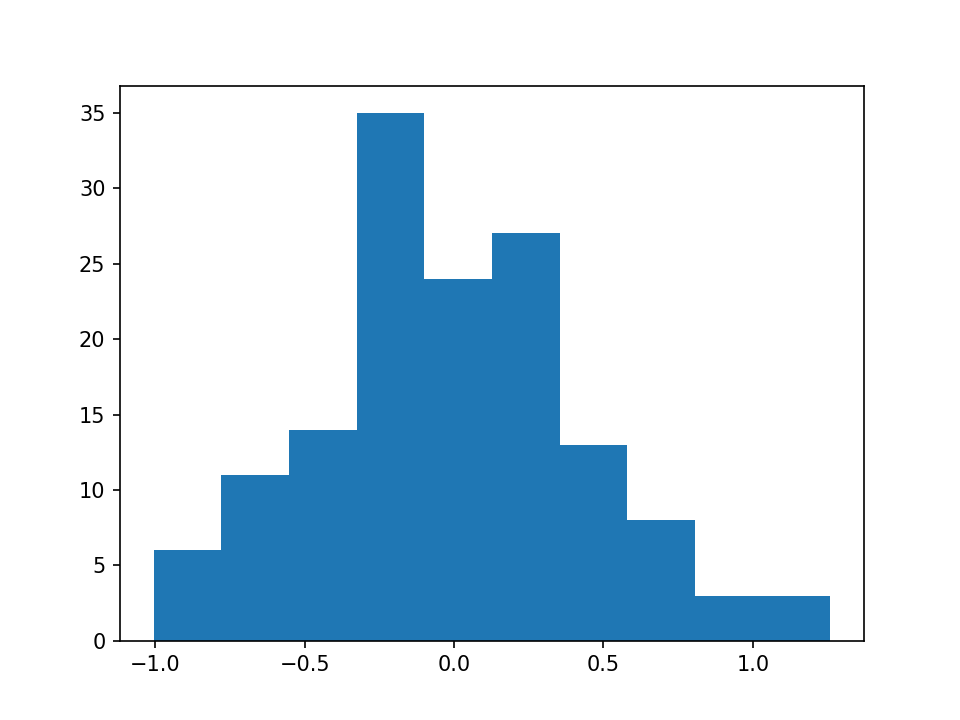

(array([ 6., 11., 14., 35., 24., 27., 13.,  8.,  3.,  3.]),
 array([-1.0047283 , -0.7783692 , -0.55201006, -0.3256509 , -0.09929176,  0.12706739,  0.35342652,  0.57978565,
         0.80614483,  1.032504  ,  1.2588631 ], dtype=float32),
 <a list of 10 Patch objects>)

In [10]:
plt.figure()
plt.hist(w.view(-1).numpy())

In [166]:
class InvDense(fd.Invertible, fd.Model):
    def __init__(self, dim, bias=True, w=None, b=None):
        super().__init__(dim, dim)
        
        if w is None:
            i = 0
            while w is None:
                w = torch.empty(dim, dim)
                nn.init.kaiming_normal_(w)
                if i < 20 and torch.det(w) < 0.1:
                    w = None
                    i += 1
        
        lu, p = torch.lu(w)
        print(p)
        
        self.pivots = p
        self.lu = nn.Parameter(lu, requires_grad=True)
    
        if bias:
            if b is None:
                b = torch.randn(1, dim) / np.sqrt(dim)
            self.b = nn.Parameter(b.view(1, dim), requires_grad=True)
        else:
            self.b = None
    
    def extra_repr(self):
        return 'dim={}, bias={}'.format(self.lu.shape[0], self.b is not None)
    
    def forward(self, x):
        p, l, u = torch.lu_unpack(self.lu, self.pivots)
        y = x @ u.t() @ l.t() @ p.t()
#         y = x @ torch.triu(u).t() @ torch.tril(l).t() @ p.t()
        if self.b is not None:
            y = y + self.b
        return y
    
    def inverse(self, y): # ! can't backprop through inverse !
        if self.b is not None:
            y = y - b
        return torch.lu_solve(y.t(), self.lu.data, self.pivots).t()

In [167]:
x = torch.randn(B,D)
w = torch.empty(D,D)
nn.init.kaiming_normal_(w)
b = torch.randn(1, D)
pass

In [168]:
layer = InvDense(D, w=w, b=b, bias=True)
layer

tensor([8, 5, 6, 5, 6, 8, 7, 8], dtype=torch.int32)


InvDense(dim=8, bias=True)

In [169]:
out = layer(x)
y = x @ w.t() + b
out.shape, y.shape

(torch.Size([128, 8]), torch.Size([128, 8]))

In [170]:
torch.stack([out, y], dim=1)

tensor([[[ 2.4935, -1.9586,  0.7936,  ...,  1.0336,  1.5152, -1.7406],
         [ 2.4935, -1.9586,  0.7936,  ...,  1.0336,  1.5152, -1.7406]],

        [[ 3.1825, -0.7223,  1.2313,  ...,  1.6592,  0.6141, -2.6652],
         [ 3.1825, -0.7223,  1.2313,  ...,  1.6592,  0.6141, -2.6652]],

        [[-1.9942,  0.2054,  1.4162,  ...,  0.6723, -0.7112, -1.6134],
         [-1.9942,  0.2054,  1.4162,  ...,  0.6723, -0.7112, -1.6134]],

        ...,

        [[ 0.9491, -1.0507,  2.2159,  ...,  1.0525, -1.4546,  1.4061],
         [ 0.9491, -1.0507,  2.2159,  ...,  1.0525, -1.4546,  1.4061]],

        [[ 0.1673, -0.9416,  1.9137,  ...,  0.9972, -1.2497, -2.3593],
         [ 0.1673, -0.9416,  1.9137,  ...,  0.9972, -1.2497, -2.3593]],

        [[-0.4341, -0.5419,  0.6284,  ...,  2.4143,  1.5630, -2.3134],
         [-0.4341, -0.5419,  0.6284,  ...,  2.4143,  1.5630, -2.3134]]],
       grad_fn=<StackBackward>)

In [171]:
px = layer.inverse(y)
torch.stack([px, x], dim=1)

tensor([[[ 0.1270, -0.0876, -0.8695,  ...,  1.0812,  1.5532, -1.7208],
         [ 0.1270, -0.0876, -0.8695,  ...,  1.0810,  1.5533, -1.7206]],

        [[ 0.3963,  0.2314, -0.1605,  ...,  0.5637,  0.7447, -2.3959],
         [ 0.3959,  0.2319, -0.1610,  ...,  0.5608,  0.7468, -2.3937]],

        [[ 1.7972, -0.6878, -0.2402,  ...,  0.5269, -1.4953, -0.5031],
         [ 1.7969, -0.6874, -0.2406,  ...,  0.5246, -1.4936, -0.5014]],

        ...,

        [[-0.1380, -0.4550, -0.9690,  ..., -0.9367, -0.6428, -1.1570],
         [-0.1377, -0.4553, -0.9687,  ..., -0.9349, -0.6441, -1.1583]],

        [[ 1.0228,  0.8181,  0.1839,  ...,  0.8974, -0.6702,  0.1612],
         [ 1.0226,  0.8184,  0.1837,  ...,  0.8962, -0.6694,  0.1621]],

        [[ 1.7700, -0.2736,  1.3171,  ...,  1.0983,  1.0434, -1.8569],
         [ 1.7700, -0.2736,  1.3171,  ...,  1.0982,  1.0434, -1.8569]]])

In [247]:
w = torch.empty(D,D)
nn.init.kaiming_uniform_(w, a=np.sqrt(5))
# nn.init.xavier_normal_(w)
nn.init.kaiming_uniform_(w)
# nn.init.kaiming_normal_(w)
torch.det(w)

tensor(1.7514)

In [241]:
l = nn.Linear(D,M)
l.weight.det()

tensor(5.2403e-05, grad_fn=<DetBackward>)

In [22]:
net[0].in_features

8

In [114]:
din = 8
dout = din
depth, breadth = 100, din
nonlin = None

In [115]:
def initializer(layer, nonlin):
#     nn.init.kaiming_normal_(layer.weight)
    din, dout = layer.in_features, layer.out_features
    
    
    spread = 1#/din
#     spread = np.sqrt(2/din) 
#     spread = 
    
    layer.weight.data.normal_(0,spread)
    return layer

net = models.make_MLP(D,M, hidden_dims=depth*[breadth], nonlin=nonlin, initializer=initializer, bias=False)

x = torch.randn(1000,8)
x.mean(0), x.std(0)

with torch.no_grad():
    y = net(x)
    print(y.mean(0))
    print(y.std(0))
#     print(y.mean(-1), y.std(-1))
y

tensor([nan, nan, nan, nan, nan, nan, nan, nan])
tensor([nan, nan, nan, nan, nan, nan, nan, nan])


tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])

In [117]:
graph = {0:[1,2], 1:[3,4], 2:[4,6], 3:[7], 4:[5], 5:[], 6:[], 7:[]}
util.toposort(0,lambda x: graph[x], depth_first=False)

[0, 1, 2, 3, 4, 6, 7, 5]

In [174]:
B = 128
N = B * 1024
D, M = 8, 8
lim = -4, 4

-1.5525214621447958e-05

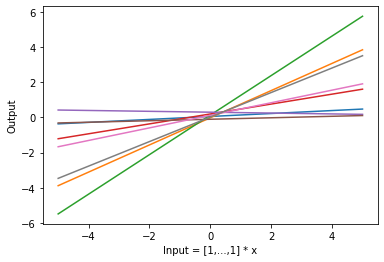

In [199]:
depth, breadth = 3, 64
depth = 0
true = models.make_MLP(D, M, hidden_dims=depth*[breadth], 
                      nonlin='swish', 
                      bias=None, output_bias=True)
util.plot_vec_fn(true)
true[0].weight.det().item()

tensor(-0.0005, grad_fn=<DetBackward>)

In [124]:
mn, mx = lim
with torch.no_grad():
    X = torch.rand(N, D) * (mx-mn) + mn
    Y = true(X)
dataset = TensorDataset(X, Y)
loader = DataLoader(dataset, batch_size=B)
len(dataset), len(loader)

(131072, 1024)

In [125]:
model = InvDense(D)
model

tensor([2, 6, 5, 4, 8, 7, 8, 8], dtype=torch.int32)


InvDense(dim=8, bias=True)

In [126]:
criterion = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=1e-2)
stat = util.AverageMeter(tau=min(100/len(loader), 0.5))

In [127]:
n_epochs = 10

In [128]:
for epoch in range(n_epochs):
    print('starting epoch: {}/{}'.format(epoch+1, n_epochs))
    itr = tqdm(loader)
    for x, y in itr:
        pred = model(x)
        loss = criterion(pred, y)
        stat.update(loss)
        itr.set_description('Loss {:.3f} ({:.3f})'.format(stat.val.item(), stat.smooth.item()))
        optim.zero_grad()
        loss.backward()
        optim.step()

starting epoch: 1/10



starting epoch: 2/10



starting epoch: 3/10



starting epoch: 4/10



starting epoch: 5/10



starting epoch: 6/10



starting epoch: 7/10



starting epoch: 8/10



starting epoch: 9/10



starting epoch: 10/10


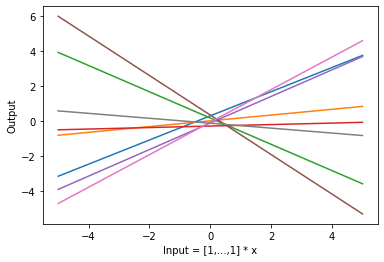

In [131]:
util.plot_vec_fn(model)
pass

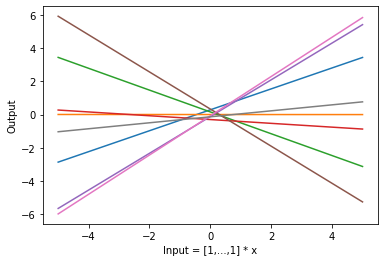

In [132]:
util.plot_vec_fn(true)
pass

In [134]:
model.inverse(y)

tensor([[ -96.5579,  339.7298,  184.7091,  ...,   59.3668,  224.6575,
          -33.9103],
        [ -51.4093,  191.3888,  104.9457,  ...,   31.8842,  120.6896,
          -20.1440],
        [ -62.7195,  214.5622,  124.0801,  ...,   37.1604,  142.9697,
          -23.2467],
        ...,
        [ -15.8171,   56.4393,   35.3900,  ...,   11.7992,   39.0795,
           -3.3670],
        [ -59.2829,  212.4025,  115.0657,  ...,   40.9361,  137.1322,
          -21.6984],
        [-102.0807,  352.7494,  194.1731,  ...,   64.2226,  227.6557,
          -36.0350]])

In [141]:
torch.lu_unpack(model.lu, model.pivots)

(tensor([[0., 0., 0., 0., 0., 0., 0., 1.],
         [1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0.]]),
 tensor([[ 1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [-2.0431,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [-0.4040, -0.9473,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [-1.3365, -0.0041,  1.9065,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [-0.2640,  0.0777, -1.3491, -0.5366,  1.0000,  0.0000,  0.0000,  0.0000],
         [ 1.8013,  0.8476,  0.7589, -0.2574, -1.7653,  1.0000,  0.0000,  0.0000],
         [-1.5527,  1.1153,  0.9246,  1.8914,  0.1215,  1.1557,  1.0000,  0.0000],
         [ 1.5122, -0.4840, -1.2016, -1.0878, -0.5593, -1.1007, -1.4566, 

In [378]:
px = layer.inverse(y)
px.shape

torch.Size([1000, 5])

In [379]:
torch.stack([x,px], dim=1)

tensor([[[ 1.0210,  0.7782, -2.3987, -0.4583, -0.2494],
         [ 1.0210,  0.7782, -2.3987, -0.4583, -0.2494]],

        [[ 1.0029,  0.0392,  1.2159, -0.0564, -0.0807],
         [ 1.0029,  0.0392,  1.2159, -0.0564, -0.0807]],

        [[-0.6100, -0.6243,  1.7635, -0.1961,  1.2692],
         [-0.6100, -0.6243,  1.7635, -0.1961,  1.2692]],

        ...,

        [[-1.0616, -0.1997,  0.8071,  1.1342, -0.3598],
         [-1.0616, -0.1997,  0.8071,  1.1342, -0.3598]],

        [[ 0.8492, -0.1958,  0.7901,  0.9527, -0.9211],
         [ 0.8492, -0.1958,  0.7901,  0.9527, -0.9211]],

        [[-0.0589,  1.5583, -1.2586,  0.3696, -1.1454],
         [-0.0589,  1.5583, -1.2586,  0.3696, -1.1454]]])

In [149]:
x = torch.rand(N, D)
y = torch.randn(N, D)

In [150]:
pred = x @ torch.triu(w)

In [151]:
torch.dist(pred,y).backward()

In [152]:
w.grad

tensor([[1.3436, 3.0150, 5.5977, 7.6880, 6.2756],
        [0.0000, 2.3532, 5.5801, 8.1934, 6.2463],
        [0.0000, 0.0000, 5.3390, 8.3467, 5.7493],
        [0.0000, 0.0000, 0.0000, 8.3360, 5.9573],
        [0.0000, 0.0000, 0.0000, 0.0000, 5.3473]])

In [163]:
torch.triu(w)/torch.diag(w)

tensor([[ 1.0000, 10.7360,  2.2431,  0.2026,  8.3005],
        [ 0.0000,  1.0000,  1.7731,  0.9971,  6.3929],
        [ 0.0000,  0.0000,  1.0000,  0.8919,  2.1275],
        [ 0.0000,  0.0000,  0.0000,  1.0000,  3.0145],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  1.0000]], grad_fn=<DivBackward0>)

In [164]:
iw = torch.triu(w).inverse()
iw

tensor([[  2.1411, -22.9868,  35.9551,  -9.5823,  81.5712],
        [  0.0000,  12.6408, -22.4134,   7.3866, -55.3936],
        [  0.0000,   0.0000,   2.5040,  -2.2334,   1.4053],
        [  0.0000,   0.0000,   0.0000,   1.0366,  -3.1248],
        [  0.0000,   0.0000,   0.0000,   0.0000,   9.4663]],
       grad_fn=<InverseBackward>)

In [4]:
B, D, S = 10, 12, 16
C, H, W = 3, 8, 8
G, K, M = 1, 6, 32

In [32]:
x = torch.randn(B,C,H,W)
q = torch.randn(B,D)
s = torch.randn(D,S)

In [33]:
enc = models.make_MLP((C,H,W), D, hidden_dims=[128, 128], nonlin='mish', output_nonlin='sigmoid')
dec = models.make_MLP(D, (C,H,W), hidden_dims=[128, 128], nonlin='mish', output_nonlin='sigmoid')
dec

Sequential(
  (0): Linear(in_features=12, out_features=128, bias=True)
  (1): Mish()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): Mish()
  (4): Linear(in_features=128, out_features=192, bias=True)
  (5): Sigmoid()
  (6): Reshaper(out=(3, 8, 8))
)

In [47]:
class T(nn.Module):
    def __init__(self):
        super().__init__()
#         self.net = models.make_MLP(M, D, hidden_dims=[128,128], nonlin='elu')
    
        self.patches = ptn.Patch_Points((C,H,W))    
        P, N = self.patches.dout
        self.net = ptn.make_pointnet(P, K*G, hidden=[128, 128], nonlin='elu')
        
        self.c = nn.Parameter(torch.randn(G, D, K))
        
    def forward(self, x):
        
        p = self.patches(x)
        N = p.size(-1)
        
        w = self.net(p) # B, K*G, N 
        w = w.view(B, G, K*N)
#         w = w.view(B, G, K, N)
        w = F.softmax(w, dim=-1).view(B*G, K, N)
        
        c = self.c.expand(B, G, D, K).view(B*G, D, K)
        
        y = c @ w # B*G, D, N
        
        y = y.sum(-1).view(B,G,D).permute(0,2,1)
        
        return y
        
t = T()

In [48]:
for n, p in t.named_parameters():
    print(n, p.shape)

c torch.Size([1, 12, 6])
net.0.weight torch.Size([128, 48, 1])
net.0.bias torch.Size([128])
net.2.weight torch.Size([128, 128, 1])
net.2.bias torch.Size([128])
net.4.weight torch.Size([6, 128, 1])
net.4.bias torch.Size([6])


In [49]:
t

T(
  (patches): Patch_Points(
    (transform): Unfold(kernel_size=(4, 4), dilation=(1, 1), padding=(0, 0), stride=(2, 2))
  )
  (net): Sequential(
    (0): Conv1d(48, 128, kernel_size=(1,), stride=(1,))
    (1): ELU(alpha=1.0, inplace=True)
    (2): Conv1d(128, 128, kernel_size=(1,), stride=(1,))
    (3): ELU(alpha=1.0, inplace=True)
    (4): Conv1d(128, 6, kernel_size=(1,), stride=(1,))
  )
)

In [50]:
y = t(x).squeeze()
y.shape

torch.Size([10, 12])

In [51]:
p

Parameter containing:
tensor([-0.0432, -0.0217,  0.0021, -0.0840, -0.0470,  0.0610],
       requires_grad=True)

In [52]:
p.grad

In [54]:
z = torch.randn(y.shape)

In [55]:
(z-y).pow(2).sum().backward()

In [56]:
t.c.grad

tensor([[[ 1.6491,  1.5984,  1.7352,  1.5232,  1.5468,  1.9260],
         [ 1.7533,  1.6647,  1.9393,  1.6512,  1.6439,  2.0840],
         [-0.0960, -0.0829,  0.1137, -0.1066, -0.0506, -0.1677],
         [ 1.6920,  1.6222,  1.9205,  1.6189,  1.5975,  1.9934],
         [ 0.1421,  0.2543,  0.1639,  0.2110,  0.2878,  0.2749],
         [ 2.6036,  2.4764,  2.6867,  2.4222,  2.4346,  3.0270],
         [ 2.1579,  2.0660,  2.4328,  1.9864,  2.0187,  2.4926],
         [-2.5217, -2.3779, -2.7081, -2.2758, -2.3670, -2.8754],
         [ 0.8755,  0.8613,  0.9990,  0.7999,  0.8313,  1.0613],
         [ 1.4899,  1.3640,  1.3705,  1.2174,  1.3177,  1.6313],
         [ 3.8443,  3.6395,  4.0016,  3.4678,  3.5882,  4.4057],
         [ 0.3531,  0.3732,  0.3236,  0.3478,  0.3394,  0.4369]]])

In [20]:
t.c.shape

torch.Size([12, 24])

In [15]:
p.dout

(48, 9)

In [47]:

def viz_latent(Q, figax=None, figsize=(9, 3), lim_y=None):
	Xs = np.arange(Q.shape[-1]) + 1
	inds = np.stack([Xs] * Q.shape[0])

	vals = Q.cpu().numpy()
	df = pd.DataFrame({'x': inds.reshape(-1), 'y': vals.reshape(-1)})

	if figax is None:
		figax = plt.subplots(figsize=figsize)
	fig, ax = figax

	# plt.figure(fig.num)
	plt.sca(ax)

	hue = None
	split = False
	color = 'C0'
	inner = 'box'
	palette = None

	sns.violinplot(x='x', y='y', hue=hue,
	               data=df, split=split, color=color, palette=palette,
	               scale="count", inner=inner, gridsize=100, )
	if lim_y is not None:
		plt.ylim(-lim_y, lim_y)
	plt.title('Distributions of Latent Dimensions')
	plt.xlabel('Dimension')
	plt.ylabel('Values')
	plt.tight_layout()
	return fig, ax

In [48]:
# fig, ax = viz_latent(q)

In [49]:
def get_traversal_vecs(Q, steps=32, bounds=None, mnmx=None):

	N, D = Q.shape
	S = steps
	#
	# dH, dW = util.calc_tiling(D)
	#
	# # bounds = (-2,2)
	#
	# save_inds = [0, 1, 2, 3]
	#
	# saved_walks = []

	I = torch.eye(D).view(1, 1, D, D)

	deltas = torch.linspace(0, 1, steps=S)
	deltas = torch.stack([deltas] * D)  # DxS

	if mnmx is None:
		if bounds is None:
			mnmx = (Q.min(0)[0].view(D, 1), Q.max(0)[0].view(D, 1))
		else:
			mnmx = torch.ones(D)*bounds[0], torch.ones(D)*bounds[1]

	mn, mx = mnmx
	mn, mx = mn.view(D, 1), mx.view(D, 1)

	deltas *= mx - mn
	deltas += mn
	deltas = deltas.t().unsqueeze(0).expand(N, S, D).unsqueeze(-1)

	Q = Q.unsqueeze(1).unsqueeze(-1).expand(N, S, D, D)

	vecs = Q * (1 - I) + deltas * I
	vecs = vecs.permute(0, 3, 1, 2) # NxDxSxD (batch, which dim, steps, vec)

	return vecs

def get_traversals(vecs, model, pbar=None): # last dim must be latent dim (model input)

	*shape, D = vecs.shape

	dataset = TensorDataset(vecs.view(-1,D))

	loader = trn.get_loaders(dataset, batch_size=64, shuffle=False)

	if pbar is not None:
		loader = pbar(loader)

	imgs = []

	for Q, in loader:
		with torch.no_grad():
			imgs.append(model(Q))

	imgs = torch.cat(imgs)

	_, *img_shape = imgs.shape

	return imgs.view(*shape,*img_shape)

def get_traversal_anim(frames, vals=None, text_fmt='{:2.2f}', text_size=12, scale=1, fps=20):

	frames = frames.permute(0,2,3,1).cpu().numpy()
	if vals is not None:
		vals = vals.cpu().numpy()

	H, W, C = frames[0].shape
	asp = W/H
	fig = plt.figure(figsize=(asp, 1), dpi=int(H*scale),)

	ax = plt.axes([0, 0, 1, 1], frameon=False)
	ax.get_xaxis().set_visible(False)
	ax.get_yaxis().set_visible(False)
	plt.autoscale(tight=True)

	im = plt.imshow(frames[0])
	# plt.axis('off')
	# plt.tight_layout()
	if vals is not None:
		txt = plt.text(5,text_size*H//64, text_fmt.format(vals[0]), size=text_size)
	pass

	plt.close()

	def init():
		im.set_data(frames[0])
		if vals is not None:
			txt.set_text(text_fmt.format(vals[0]))

	def animate(i):
		im.set_data(frames[i])
		if vals is not None:
			txt.set_text(text_fmt.format(vals[i]))
		return im

	anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(frames), interval=1000//fps)
	return anim

def compute_diffs(walks, dsteps=10):
	'''
	computes the Linf distance in pixel space between an image and the image where
	a single latent dimension is perturbed by approximately half of the range
	of that latent dim
	'''

	B, D, S, C, H, W = walks.shape

	diffs = (walks[:, :, dsteps:] - walks[:, :, :-dsteps]).abs().max(-3)[0]
	diffs = diffs.view(B, D, (S - dsteps) * H * W).mean(-1)
	return diffs


def viz_interventions(dists, figax=None, figsize=(9, 3), color='C2'):

	vals = dists.cpu().numpy()
	Xs = np.arange(vals.shape[-1]) + 1
	inds = np.stack([Xs] * vals.shape[0])
	df = pd.DataFrame({'x': inds.reshape(-1), 'y': vals.reshape(-1)})
	# df['moment']='log(sigma)'

	hue = None
	split = False
	# color = 'C2'
	inner = 'box'
	palette = None

	if figax is None:
		figax = plt.subplots(figsize=figsize)
	fig, ax = figax
	plt.sca(ax)
	sns.violinplot(x='x', y='y', hue=hue,
	               data=df, split=split, color=color, palette=palette,
	               scale="count", inner=inner, gridsize=100, cut=0)
	plt.title('Intervention Effect on Image')
	plt.xlabel('Dimension')
	plt.ylabel('Effect')
	plt.tight_layout()


	return fig, ax

In [50]:

# if walks is not None:
#     return walks if lim is None else walks[:lim]
# assert model is not None
# vecs = get_traversal_vecs(Q[:lim], steps=steps,
#                           mnmx=(Q.min(0)[0].unsqueeze(-1), Q.max(0)[0].unsqueeze(-1))).contiguous()
# deltas = torch.diagonal(vecs, dim1=-3, dim2=-1)
# walks = get_traversals(vecs, model)
# return walks

# for dim, (frames, nums) in enumerate(zip(full, deltas[bidx].T)):
#     util.Animation(get_traversal_anim(frames, vals=nums, scale=1, fps=10)).export(
#         os.path.join(walk_dir, 'dim{}-frame.png'.format(dim)), fmt='frames')

In [51]:
steps = 32

In [58]:
vecs = get_traversal_vecs(q, steps=steps,
                          mnmx=(q.min(0)[0].unsqueeze(-1), q.max(0)[0].unsqueeze(-1))).contiguous()
deltas = torch.diagonal(vecs, dim1=-3, dim2=-1)
vecs.shape, deltas.shape

(torch.Size([10, 12, 32, 12]), torch.Size([10, 32, 12]))

In [59]:
walks = get_traversals(vecs, dec)
walks.shape

torch.Size([10, 12, 32, 3, 8, 8])

In [60]:
diffs = compute_diffs(walks)
diffs.shape

torch.Size([10, 12])

In [63]:
# viz_interventions(diffs)
pass

In [76]:
def tile_dims(full):
    tH, tW = util.calc_tiling(len(full))
    N, S, C, H, W = full.shape
    full = full.view(tH, tW, S, C, H, W)
    full = full.permute(2, 3, 0, 4, 1, 5).contiguous().view(S, C, tH * H, tW * W)
    return full

<IPython.core.display.Javascript object>


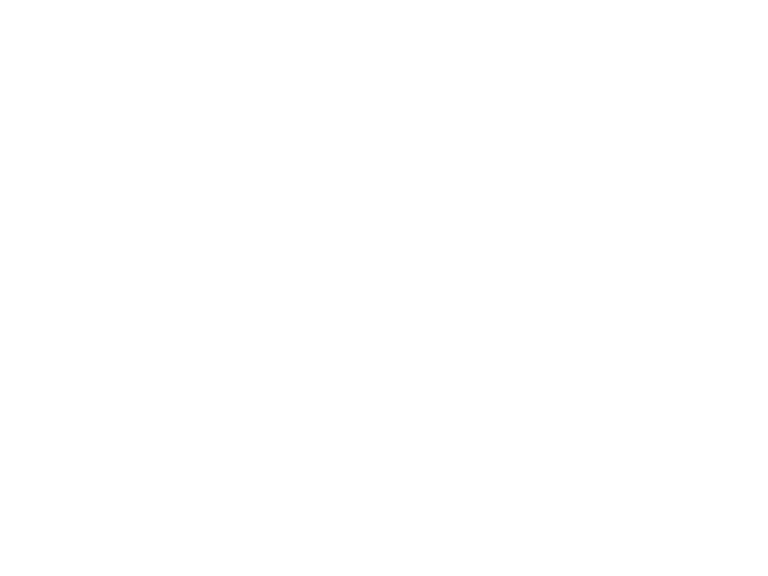

In [78]:
for bidx, full in enumerate(walks):
#     for dim, (frames, nums) in enumerate(zip(full, deltas[bidx].T)):
#         a = util.Animation(get_traversal_anim(frames, vals=nums, scale=16, fps=10))
#         break
#     break
    a = util.Animation(get_traversal_anim(tile_dims(full), vals=None, scale=16, fps=10))
    break

In [79]:
a.play()

In [2]:
A = trn.get_config('branchdec')
A.din = 3,64,64
A.latent_dim = 12
A.dout = 3,64,64

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


In [3]:
A.pull('model.decoder')

Creating decoder (type=branch-dec)
  latent_dim: 12 (in parent)
  out_shape --> dout: (3, 64, 64) (in parent)
  root_dim: 0
  branch_dim: 3
    channels (type=list): 
    [0]: 128
    [1]: 128
    [2]: 64
    [3]: 64
  factors: 2
  branches (type=iter) with 4 elements
  layers (type=iter) with 4 elements
  Creating branches[0] (type=norm-ada-in)
    style_dim --> din: 3
    features --> dout: 128
    pixelwise: False (by default)
    Creating net (type=mlp) (mod=normal) (in parent)
      latent_dim: 12 (in parent)
      min_log_std: None (by default)
      input_dim --> din: 3
      output_dim --> dout: 24
        hidden_dims (type=list): 
        [0]: 64
        [1]: 128
      nonlin: prelu (by default)
      output_nonlin: None (by default)
  Creating layers[0] (type=deconv-layer)
    in_channels: 128
    out_channels: 128
    factor: 2
    kernel_size: 3 (by default)
    stride: 1 (by default)
    padding: None (by default)
    dilation: 1 (by default)
    output_padding: 0 (by defa

AttributeError: 'Deconv_Layer' object has no attribute 'up_type'

In [8]:
A = trn.get_config()
A.model._type = 'dislib-dec'
A.model.dout = (3,128,128)
A.model.din = 10

In [9]:
model = A.pull('model')

Creating model (type=dislib-dec)
  latent_dim --> din: 10
  out_shape --> dout: (3, 128, 128)
  nonlin: relu (by default)
  net_type: conv (by default)


In [10]:
print(model)

Disentanglement_lib_Decoder(
  (net): Sequential(
    (0): Linear(in_features=10, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): Reshaper(out=(64, 4, 4))
  )
  (deconv): Sequential(
    (0): DeconvLayer(
      (deconv): ConvTranspose2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (nonlin): ReLU(inplace=True)
    )
    (1): DeconvLayer(
      (deconv): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (nonlin): ReLU(inplace=True)
    )
    (2): DeconvLayer(
      (deconv): ConvTranspose2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (nonlin): ReLU(inplace=True)
    )
    (3): DeconvLayer(
      (deconv): ConvTranspose2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (nonlin): ReLU(inplace=True)
    )
    (4): DeconvLayer(
      (deconv): ConvTranspose2d(32, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (n

In [19]:
x = torch.randn(3,3)

In [22]:
x

tensor([[ 0.5952,  0.4880,  0.2048],
        [-0.3997, -0.3645, -0.6762],
        [ 0.9419, -1.9665, -1.9220]])

In [24]:
x.norm(p=float('inf'), dim=None)

tensor(1.9665)

In [13]:
util.count_parameters(model)

398755

In [11]:
q = torch.randn(64,10)

In [12]:
with torch.no_grad():
    rec = model(q)
rec.shape

torch.Size([64, 3, 128, 128])

In [5]:
dataset = trn.get_dataset('3dshapes', labeled=False)
len(dataset)

Loading dataset: 3dshapes
dataroot: /is/ei/fleeb/workspace/local_data/
load_memory: True (by default)
train: True (by default)
labeled: False
noise: None (by default)
din: (3, 64, 64) (by default)
dout: (3, 64, 64) (by default)


384000

In [6]:
dataloader = trn.get_loaders(dataset, batch_size=64, drop_last=False)
len(dataloader)

Using batched data loader


6000

In [7]:
for batch in dataloader:
    pass

In [8]:
X = batch[0]
X.shape

torch.Size([64, 3, 64, 64])

In [11]:
q = model(X)
q.loc.shape, q.stddev.shape

(torch.Size([64, 10]), torch.Size([64, 10]))

In [13]:
shapes, settings = models.plan_conv((3,64,64), channels=[32,32,64,64], kernels=[4,4,2,2], strides=[2,2,2,2])

In [16]:
print(shapes)

[(3, 128, 128), (32, 64, 64), (32, 32, 32), (64, 16, 16), (64, 8, 8), (64, 4, 4)]


In [14]:
print(models.build_conv_layers(settings))

[ConvLayer(
  (conv): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (nonlin): ELU(alpha=1.0, inplace=True)
), ConvLayer(
  (conv): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (nonlin): ELU(alpha=1.0, inplace=True)
), ConvLayer(
  (conv): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
  (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (nonlin): ELU(alpha=1.0, inplace=True)
), ConvLayer(
  (conv): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
  (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (nonlin): ELU(alpha=1.0, inplace=True)
), ConvLayer(
  (conv): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
)]


In [2]:
shapes, settings = models.plan_deconv((3,64,64), channels=[64,64,32,32], kernels=[2,2,4,4,], strides=[2,2,2,2])
print(shapes)

[(64, 4, 4), (64, 8, 8), (32, 16, 16), (32, 32, 32), (3, 64, 64)]


In [4]:
dec = models.build_deconv_layers(settings, shapes[:-1])
print(dec)

[DeconvLayer(
  (deconv): ConvTranspose2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
  (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (nonlin): ELU(alpha=1.0, inplace=True)
), DeconvLayer(
  (deconv): ConvTranspose2d(64, 32, kernel_size=(2, 2), stride=(2, 2))
  (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (nonlin): ELU(alpha=1.0, inplace=True)
), DeconvLayer(
  (deconv): ConvTranspose2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (nonlin): ELU(alpha=1.0, inplace=True)
), DeconvLayer(
  (deconv): ConvTranspose2d(32, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
)]


In [2]:
class T(object):
    def __repr__(self):
        return 'a\nb\nc'

In [3]:
data = {'a':2, 'wow':T(), 'b':{'x':[1,2,3], 'y':{'t1': {'a','b','sdg'}, 't2':5}}}

In [4]:
print(util.pretty_format(data))

{
  'a': 2
  'wow': a
      b
      c
  'b': {
    'x': [
      1
      2
      3
    ]
    'y': {
      't1': {
        'a'
        'b'
        'sdg'
      }
      't2': 5
    }
  }
}


In [2]:
%matplotlib notebook

In [3]:
# raw, labels = sklearn.datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
# labels = labels.astype(int)

In [4]:
# data = raw.reshape(-1,28,28)[:10000, ::2, ::2]
# _,H, W = data.shape
# data = data.reshape(len(data),-1)
# # data = data.astype('float32')
# lbls = labels[:10000]
# data.shape, lbls.shape

In [5]:
# start = time.time()
# mapper = umap.UMAP(random_state=1).fit(data)
# print('took {:.2f}'.format(time.time() - start))

In [6]:
# Q = mapper.embedding_
# Q.shape

In [7]:
# vals = set(lbls)
# num = len(vals)
# vals = sorted(list(vals))
# num, vals

In [8]:
# cmap = matplotlib.cm.get_cmap('Spectral')
# cmap

In [9]:
# plt.figure(figsize=(8,8))
# plt.scatter(*Q.T, c=lbls, cmap=cmap, marker='.', s=10)

# hdls = []
# for i in np.arange(num):
#     l = i/(num-1)
#     v = vals[i]
#     hdls.append( mpatches.Patch(color=cmap(l), label=str(v)))
# plt.legend(handles=hdls)
# pass

In [10]:
# Q.shape

In [11]:
# gen = Q[:16]
# # gen = np.random.randn(16,2)*10
# gen.shape

In [12]:
# rec = mapper.inverse_transform(gen)
# rec.shape

In [13]:
# util.show_nums(torch.from_numpy(rec.reshape(-1,1,H,W)))
# pass

In [28]:
N,C,H,W = 5, 3, 10,10

[autoreload of foundation.data.collectors failed: Traceback (most recent call last):
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    updat

In [35]:
X = torch.arange(N*C*H*W).view(N,C,H,W).float()
X.shape

torch.Size([5, 3, 10, 10])

In [38]:
unf = nn.Unfold((2,2), padding=1)

In [39]:
unf(X).shape

torch.Size([5, 27, 100])

In [4]:
dataset = trn.get_dataset('3dshapes', labeled=True)
len(dataset)

Loading dataset: 3dshapes
dataroot: /is/ei/fleeb/workspace/local_data/
load_memory: True (by default)
train: True (by default)
labeled: True
noise: None (by default)
din: (3, 64, 64) (by default)
dout: 6 (by default)


384000

In [5]:
dataset.images.shape

torch.Size([384000, 3, 64, 64])

In [6]:
# X = dataset.images.view(-1, 28*28)
torch.manual_seed(0)
order = torch.randperm(len(dataset))
# order = slice(None)
X = dataset.images[order]#,:,::2,::2]
print(X.shape)
_, C, H, W = X.shape
X = X.contiguous().view(len(dataset),-1)#.div(255)
if X.dtype == torch.uint8:
    X = X.float().div(255)
X = X.float()
Y = dataset.labels[order]
X.shape, Y.shape

torch.Size([384000, 3, 64, 64])


(torch.Size([384000, 12288]), torch.Size([384000, 6]))

In [23]:
N = 30000

trainX, trainY = X[:N], Y[:N]
trainX.shape, trainY.shape
# trainY[:16]

(torch.Size([30000, 12288]), torch.Size([30000, 6]))

In [24]:
R = gpumap.GPUMAP(n_components=64, random_state=1)#, min_dist=0.8, n_neighbors=100)#target_metric='haversine')
R

GPUMAP(a=None, angular_rp_forest=False, b=None, init='default',
       learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
       metric_kwds=None, min_dist=0.1, n_components=64, n_epochs=None,
       n_neighbors=15, negative_sample_rate=5, random_state=1,
       repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
       target_metric='categorical', target_metric_kwds=None,
       target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
       transform_seed=42, use_gpu=True, verbose=False)

In [25]:
# R = umap.UMAP()
# R = umap.UMAP(n_components=12)
# R

In [26]:
start = time.time()
R.fit(trainX.numpy())
print('took {:.2f}'.format(time.time() - start))


Compilation is falling back to object mode WITH looplifting enabled because Function "make_epochs_per_sample" failed type inference due to: Untyped global name 'make_epochs_per_sample_gpu': cannot determine Numba type of <class 'function'>

File "../gpumap/gpumap/gpumap_.py", line 816:
def make_epochs_per_sample(weights, n_epochs, use_gpu):
    <source elided>
	if use_gpu:
		fun = make_epochs_per_sample_gpu
  ^

Function "make_epochs_per_sample" was compiled in object mode without forceobj=True.

File "../gpumap/gpumap/gpumap_.py", line 799:
@numba.jit()
def make_epochs_per_sample(weights, n_epochs, use_gpu):
^


Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "../gpumap/gpumap/gpumap_.py", line 799:
@numba.jit()
def make_epochs_per_sample(wei

took 37.27


In [10]:
# start = time.time()
# Q = torch.from_numpy(R.transform(trainX))
ref = torch.from_numpy(R.embedding_)
# print('took {:.2f}'.format(time.time() - start))
# ref = Q
ref.shape

torch.Size([10000, 64])

In [38]:
# np.save('temp.npy', ref.numpy())

In [39]:
ref = np.load('temp.npy')
ref = torch.from_numpy(ref)

In [12]:
Q = ref
Q.shape

torch.Size([10000, 64])

In [54]:
# V = gpumap.GPUMAP()#min_dist=0.8, n_neighbors=100)
V = umap.UMAP(random_state=1)#min_dist=0.8, n_neighbors=20)
# V = PCA(n_components=2)
V

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.


UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=1, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [55]:
start = time.time()
V.fit(Q.numpy())
print('took {:.2f}'.format(time.time() - start))

Embedding a total of 33 separate connected components using meta-embedding (experimental)


took 14.60


In [56]:
B = 10000

if isinstance(V, PCA):
    points = V.transform(Q[:B].numpy())
else:
    points = V.embedding_[:B]
    
# points = V.transform(Q[:B].numpy())
# points = ref.numpy()
    
# points = R.embedding_[:B]

# lb = trainY[:B].clone()

points = torch.from_numpy(points)
points.shape

torch.Size([10000, 2])

In [57]:
cmap = matplotlib.cm.get_cmap('Spectral')
cmap

<IPython.core.display.Javascript object>


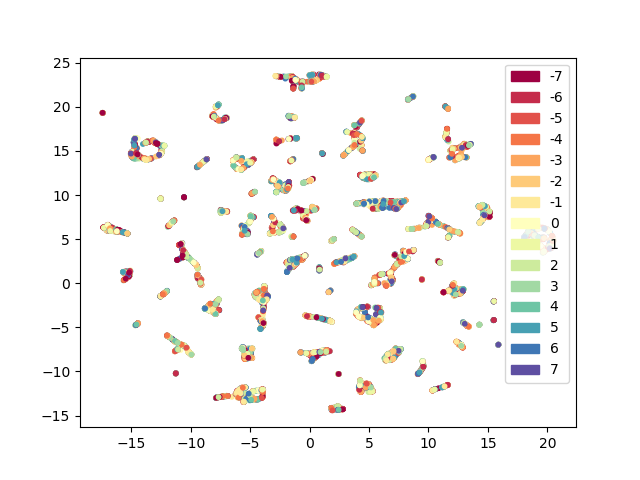

In [64]:

# lb = trainY[:B].clone()
lb = trainY[:B,5].clone()
vals = np.array(sorted(set(lb.numpy())))
num = len(vals)
lb /= vals[1] - vals[0]
vals /= vals[1] - vals[0]
lb = lb.round().int()
vals = vals.round().astype('int')

fig, ax = plt.subplots()
plt.scatter(*points.numpy().T, cmap=cmap, c=lb, marker='o', s=10)

hdls = []
for i in np.arange(num):
    l = i/(num-1)
    hdls.append( mpatches.Patch(color=cmap(l), label=str(int(vals[i]))))
plt.legend(handles=hdls)
pass

In [30]:
# umap.plot.points(R, labels=Y[:10000], theme='fire')

In [15]:
# latent = torch.randn(16, 2)
latent = Q[:1]
# vlat = points[:16]
# latent = F.normalize(latent, dim=-1)
vlat = latent
vlat.shape

torch.Size([1, 64])

In [66]:
# gen = V.inverse_transform(vlat)
# gen = torch.from_numpy(gen)
# gen.shape

In [33]:
# util.show_nums(gen.view(-1, C, H, W))
# pass

<IPython.core.display.Javascript object>


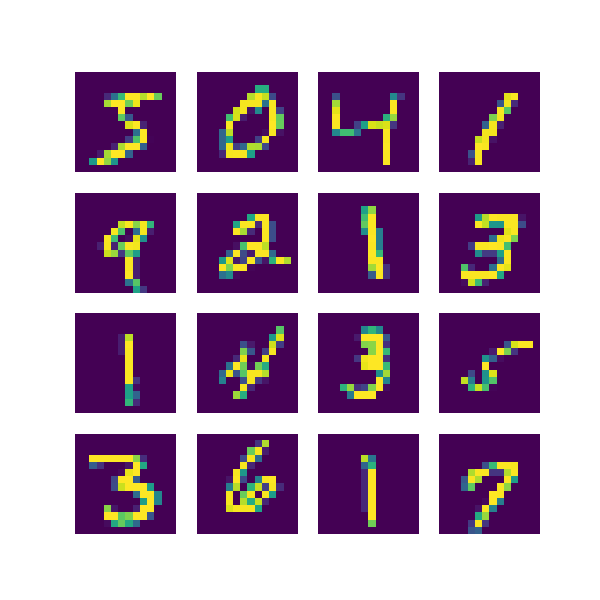

In [35]:
util.show_nums(trainX[:16].view(-1,C,H,W))
pass

In [16]:
R.__class__.inverse_transform = umap.UMAP.inverse_transform
R.output_metric = 'euclidean'
R._output_metric_kwds = {}

In [ ]:
gen = R.inverse_transform(vlat)
gen = torch.from_numpy(gen)
gen.shape

In [45]:
reqs = ['_sparse_data', 'metric', 'transform_seed', 'embedding_', '_raw_data', 'output_metric', '_output_metric_kwds', '_a', '_b', 'n_epochs','_sigmas', '_rhos', 'repulsion_strength', '_initial_alpha', 'negative_sample_rate', 'verbose']
reqs = set(reqs)

In [46]:
for r in reqs:
    a = getattr(V,r)
    b = getattr(R,r)
    if isinstance(a, np.ndarray):
        print(r, a.shape, a.dtype, b.shape, b.dtype)
    else:
        print(r, a, b)

_raw_data (10000, 196) float32 (10000, 196) float32
metric euclidean euclidean
_rhos (10000,) float32 (10000,) float32
verbose False False
repulsion_strength 1.0 1.0
embedding_ (10000, 2) float32 (10000, 2) float32
transform_seed 42 42
_a 1.576943460405378 1.576943460405378
_b 0.8950608781227859 0.8950608781227859
_initial_alpha 1.0 1.0
negative_sample_rate 5 5
_output_metric_kwds {} {}
_sigmas (10000,) float32 (10000,) float32
n_epochs None None
output_metric euclidean euclidean
_sparse_data False False


In [16]:
# langl = util.cart2angl(latent)

# langl = angles[:16]
# langl[8:] = util.cart2angl(util.angl2cart(angles[:8]))
# langl

# latent = points[:16]
# latent.shape

In [33]:
# plt.sca(ax)
# # plt.scatter(*latent.numpy().T, c='k', marker='x', s=100)
# for i,(x,y) in enumerate(vlat.numpy()):
#     plt.text(x.item(),y.item(), s=str(i), fontsize=12, horizontalalignment='center', verticalalignment='center', )

In [68]:
# gen = R.inverse_transform(latent.numpy())
# gen = torch.from_numpy(gen).view(-1, 1, 28, 28)
# gen.shape

In [2]:
C = trn.get_config()
C

{{'_ipython_canary_method_should_not_exist_':{{}}}}

In [3]:
C.criterion._type = 'criterion'
C.criterion.name = 'bce'
C.criterion.kwargs.reduction = 'sum'
C

{{'_ipython_canary_method_should_not_exist_':{{}}, 'criterion':{{'_type':'criterion', 'name':'bce', 'kwargs':{{'reduction':'sum'}}}}}}

In [4]:
criterion = C.pull('criterion')

Creating criterion (type=criterion)
  name: bce
    kwargs (type=dict): 
    (reduction): sum


In [6]:
criterion.reduction

'sum'

In [7]:
import inspect

In [ ]:
util.show_nums(gen.view(-1, C, H, W))
pass

In [44]:
for n, p in sig.parameters.items():
    print(n, p.default, p.kind)
#     break

a <class 'inspect._empty'> POSITIONAL_OR_KEYWORD
b <class 'inspect._empty'> POSITIONAL_OR_KEYWORD
c 1 POSITIONAL_OR_KEYWORD
d [1, 2, 3] POSITIONAL_OR_KEYWORD
e 13 POSITIONAL_OR_KEYWORD
kwargs <class 'inspect._empty'> VAR_KEYWORD


In [35]:
p.POSITIONAL_OR_KEYWORD

<_ParameterKind.POSITIONAL_OR_KEYWORD: 1>

In [22]:
p.kind

<_ParameterKind.VAR_KEYWORD: 4>

In [17]:
p.default == inspect._empty

True

In [29]:
type(p.kind)

<enum '_ParameterKind'>

In [34]:
{inspect._ParameterKind.VAR_POSITIONAL, inspect._ParameterKind.VAR_KEYWORD} == p.kind

True

In [36]:
p.default

inspect._empty